# machinehack-ml-merchandise-popularity-prediction


We need to predict the popularity from all the other data from dataset like Store_Ratio, Basket Ratio, Store Score. 

Big Brands spend a significant amount on popularizing a product.  Nevertheless, their efforts go in vain while establishing the merchandise in the hyperlocal market. Based on different geographical conditions same attributes can communicate a piece of much different information about the customer. Hence, insights this is a must for any brand owner.



# ABOUT DATASET

Train.csv - 18208 x 12  (Includes popularity Column as Target variable)

Test.csv - 12140 x 11 

# COLUMNS IN THE DATASET

storeratio

 basketratio

category1

 storescore

category2

 storepresence

score1 

score2

score3 

score4

time

popularity (Target Column)

# Importing required libraries

In [1]:
# Import all necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Importing the dataset

In [2]:
# Load the dataset using pandas
train_df = pd.read_csv("MPP_Dataset/Train.csv")
test_df = pd.read_csv("MPP_Dataset/Test.csv")

In [3]:
# Make a copy of the dataset 
train_df_copy = train_df.copy(deep=True)

# Identifying the number of features or columns

In [4]:
# Check the shape of train dataset
train_df_copy.shape

(18208, 12)

In [5]:
# Check the shape of test dataset
test_df.shape

(12140, 11)

# Know all the names of the columns

In [6]:
# Check the columns in the train dataset
train_df_copy.columns

Index(['Store_Ratio', 'Basket_Ratio', 'Category_1', 'Store_Score',
       'Category_2', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3',
       'Score_4', 'time', 'popularity'],
      dtype='object')

# Knows more about the data in the columns like data type it contains and total samples of each

In [7]:
# Check which columns are having categorical, numerical or boolean values of train dataset
train_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18208 entries, 0 to 18207
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store_Ratio     18208 non-null  float64
 1   Basket_Ratio    18208 non-null  float64
 2   Category_1      18208 non-null  int64  
 3   Store_Score     18208 non-null  float64
 4   Category_2      18208 non-null  int64  
 5   Store_Presence  18208 non-null  float64
 6   Score_1         18208 non-null  float64
 7   Score_2         18208 non-null  float64
 8   Score_3         18208 non-null  float64
 9   Score_4         18208 non-null  float64
 10  time            18208 non-null  int64  
 11  popularity      18208 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


After checking the Dtypes of all the columns

object - String values

float64 - Numerical values

Observation: There are no String values so there are no categorical data

In [8]:
# Check which columns are having categorical, numerical or boolean values of test dataset
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12140 entries, 0 to 12139
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store_Ratio     12140 non-null  float64
 1   Basket_Ratio    12140 non-null  float64
 2   Category_1      12140 non-null  int64  
 3   Store_Score     12140 non-null  float64
 4   Category_2      12140 non-null  int64  
 5   Store_Presence  12140 non-null  float64
 6   Score_1         12140 non-null  float64
 7   Score_2         12140 non-null  float64
 8   Score_3         12140 non-null  float64
 9   Score_4         12140 non-null  float64
 10  time            12140 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 1.0 MB


After checking the Dtypes of all the columns

object - String values

float64 - Numerical values

Observation: There are no String values so there are no categorical data

# Know more mathematical relations of the dataset like count, min, max values, standarad deviation values, mean and different percentile values

In [9]:
# For more information on the train dataset like the total count in all the columns
# min, max values and more information of the respective columns  
train_df.describe()

Store_Ratio  Basket_Ratio    Category_1   Store_Score    Category_2  \
count  18208.000000  18208.000000  18208.000000  18208.000000  18208.000000   
mean       0.544283      0.483585      5.155536    -12.198086      0.648506   
std        0.202709      0.302010      3.535068      8.370566      0.477450   
min        0.000000      0.000216      0.000000    -47.576000      0.000000   
25%        0.411000      0.200000      2.000000    -16.496250      0.000000   
50%        0.573000      0.517000      5.000000     -9.166500      1.000000   
75%        0.699000      0.742000      8.000000     -5.943750      1.000000   
max        0.998000      1.000000     11.000000     -0.079000      1.000000   

       Store_Presence       Score_1       Score_2       Score_3       Score_4  \
count    18208.000000  18208.000000  18208.000000  18208.000000  18208.000000   
mean         0.477702      0.322109      0.164888      0.421440    115.305776   
std          0.380634      0.413493      0.136531      0.271922     31.478303   
min          0.000000      0.000000      0.011900      0.000000      0.000000   
25%          0.086175      0.000001      0.095300      0.184750     90.974250   
50%          0.430000      0.002245      0.112000      0.393000    114.022500   
75%          0.895000      0.859000      0.176000      0.640000    134.997000   
max          0.996000      1.000000      0.991000      0.999000    219.701000   

               time    popularity  
count  1.820800e+04  18208.000000  
mean   2.180101e+05      3.850231  
std    9.648289e+04      0.544226  
min    3.184400e+04      0.000000  
25%    1.696202e+05      4.000000  
50%    2.046460e+05      4.000000  
75%    2.471562e+05      4.000000  
max    3.908467e+06      5.000000

In [10]:
# For more information on the train dataset like the total count in all the columns
# min, max values and more information of the respective columns  
test_df.describe()

Store_Ratio  Basket_Ratio    Category_1   Store_Score    Category_2  \
count  12140.000000  12140.000000  12140.000000  12140.000000  12140.000000   
mean       0.543776      0.488879      5.121417    -12.062847      0.642916   
std        0.200109      0.301217      3.528765      8.300385      0.479160   
min        0.000000      0.000000      0.000000    -46.847000      0.000000   
25%        0.414750      0.213000      2.000000    -16.066000      0.000000   
50%        0.570000      0.521000      5.000000     -9.046500      1.000000   
75%        0.696000      0.745000      8.000000     -5.891750      1.000000   
max        0.978000      1.000000     11.000000      0.662000      1.000000   

       Store_Presence       Score_1       Score_2       Score_3       Score_4  \
count    12140.000000  12140.000000  12140.000000  12140.000000  12140.000000   
mean         0.474675      0.321641      0.165942      0.420485    115.748041   
std          0.377582      0.414438      0.139109      0.270508     31.519999   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          0.087775      0.000001      0.095900      0.190000     90.908750   
50%          0.430500      0.002050      0.112000      0.392000    114.618500   
75%          0.882000      0.861000      0.173250      0.633000    135.829250   
max          0.996000      1.000000      0.994000      1.000000    219.701000   

               time  
count  1.214000e+04  
mean   2.154031e+05  
std    8.231108e+04  
min    3.406700e+04  
25%    1.700000e+05  
50%    2.043415e+05  
75%    2.445222e+05  
max    1.782178e+06

# Get the total number of samples in the dataset using the len() function

In [11]:
# check the lenght of test and train dataset
print(f"train data length: {len(train_df_copy)}")
print(f"test data length: {len(test_df)}")

train data length: 18208
test data length: 12140


# Counting the total number of missing value

In [12]:
# Check for missing values in all the columnns of the train dataset
train_df_copy.isna().sum()

Store_Ratio       0
Basket_Ratio      0
Category_1        0
Store_Score       0
Category_2        0
Store_Presence    0
Score_1           0
Score_2           0
Score_3           0
Score_4           0
time              0
popularity        0
dtype: int64

There is no missing values in this dataset

In [13]:
# Check for missing values in all the columnns of the test dataset
test_df.isna().sum()

Store_Ratio       0
Basket_Ratio      0
Category_1        0
Store_Score       0
Category_2        0
Store_Presence    0
Score_1           0
Score_2           0
Score_3           0
Score_4           0
time              0
dtype: int64

There is no missing values in this dataset

## Get unique values

In [14]:
# get unique values in train dataset


In [15]:
# get unique values in test dataset



# EDA

# CORRELATION MATRIX

Why ?

A correlation matrix is a table showing correlation coefficients between variables

There are three broad reasons for computing a correlation matrix:

1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable

In [16]:
#correlation 
#perfom correlation matrix Using pandas
train_df.corr()

Store_Ratio  Basket_Ratio  Category_1  Store_Score  \
Store_Ratio        1.000000      0.465598    0.040335     0.599820   
Basket_Ratio       0.465598      1.000000    0.051739     0.826055   
Category_1         0.040335      0.051739    1.000000     0.042988   
Store_Score        0.599820      0.826055    0.042988     1.000000   
Category_2        -0.102391     -0.114843   -0.139914    -0.085984   
Store_Presence    -0.471475     -0.821807   -0.046474    -0.723449   
Score_1           -0.454113     -0.612220   -0.028973    -0.726385   
Score_2           -0.039416      0.275749    0.019738     0.145093   
Score_3            0.620874      0.527086    0.036477     0.516937   
Score_4            0.119472      0.253789    0.003057     0.263739   
time              -0.063763      0.101478   -0.012886     0.080659   
popularity         0.232888      0.200988    0.003716     0.204896   

                Category_2  Store_Presence   Score_1   Score_2   Score_3  \
Store_Ratio      -0.102391       -0.471475 -0.454113 -0.039416  0.620874   
Basket_Ratio     -0.114843       -0.821807 -0.612220  0.275749  0.527086   
Category_1       -0.139914       -0.046474 -0.028973  0.019738  0.036477   
Store_Score      -0.085984       -0.723449 -0.726385  0.145093  0.516937   
Category_2        1.000000        0.104456  0.020086 -0.036357 -0.043944   
Store_Presence    0.104456        1.000000  0.571346 -0.190961 -0.431723   
Score_1           0.020086        0.571346  1.000000 -0.104020 -0.474795   
Score_2          -0.036357       -0.190961 -0.104020  1.000000  0.033445   
Score_3          -0.043944       -0.431723 -0.474795  0.033445  1.000000   
Score_4          -0.046058       -0.222663 -0.201852  0.019435  0.181573   
time             -0.009798       -0.072484 -0.113319 -0.002480  0.009258   
popularity       -0.034565       -0.195113 -0.163667  0.001737  0.176765   

                 Score_4      time  popularity  
Store_Ratio     0.119472 -0.063763    0.232888  
Basket_Ratio    0.253789  0.101478    0.200988  
Category_1      0.003057 -0.012886    0.003716  
Store_Score     0.263739  0.080659    0.204896  
Category_2     -0.046058 -0.009798   -0.034565  
Store_Presence -0.222663 -0.072484   -0.195113  
Score_1        -0.201852 -0.113319   -0.163667  
Score_2         0.019435 -0.002480    0.001737  
Score_3         0.181573  0.009258    0.176765  
Score_4         1.000000  0.026966    0.043677  
time            0.026966  1.000000    0.020172  
popularity      0.043677  0.020172    1.000000

** Observations from above correlation matrix**

1. store ratio is strongly correlated with basket ratio , store score, score3 ,store presence score1 , score3
2. basket ratio is correlatd to store score, store presence, score1 score3.
3. category1 is correlated with category2
4. score presence is correlated with score1, score2, score3, popularity
5. score1 is correlated with score3 , score4, time, popularity


<AxesSubplot:>

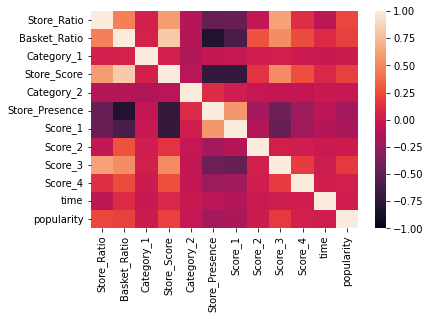

In [17]:
#perfom correlation matrix Using seaborn
df_corr = train_df_copy.corr()
sns.heatmap(df_corr, vmin=-1, vmax=1)

# SCATTER PLOT
1. A scatter plot is a type of plot using Cartesian coordinates to display values for typically two variables for a set of data.

2. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

3. Scatter plot's are used to observe and show relationships between two numeric variables.

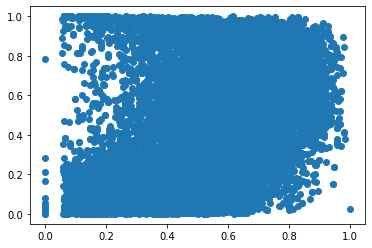

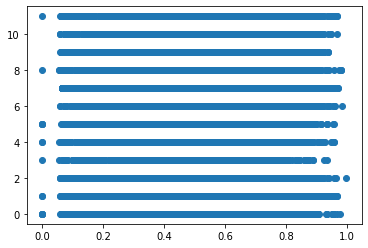

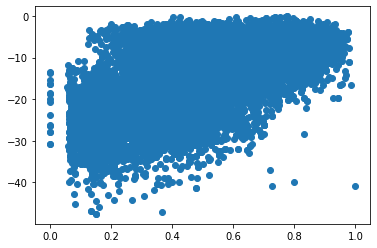

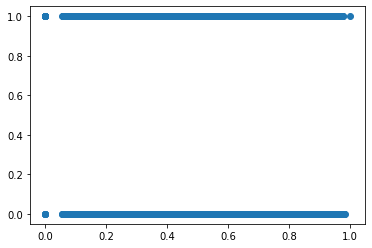

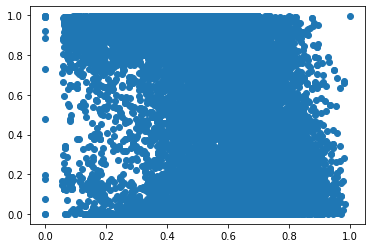

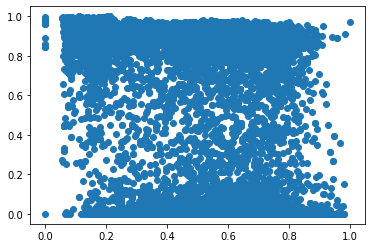

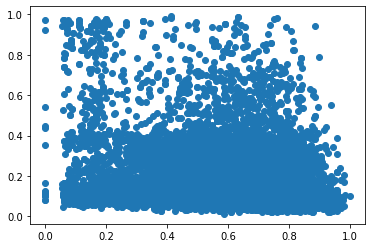

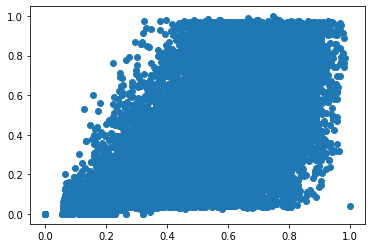

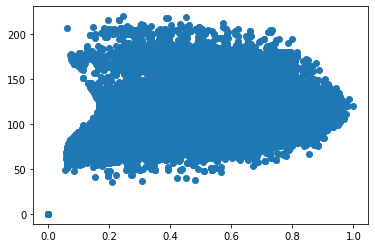

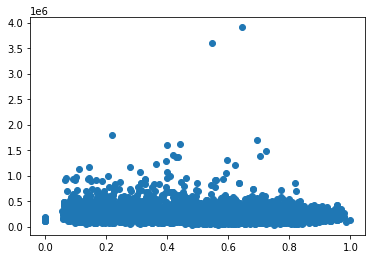

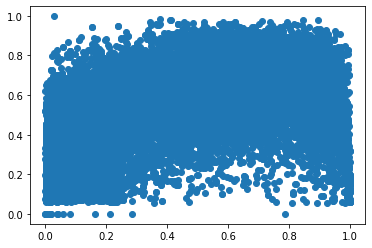

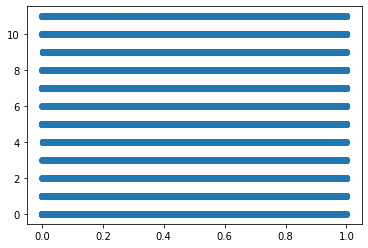

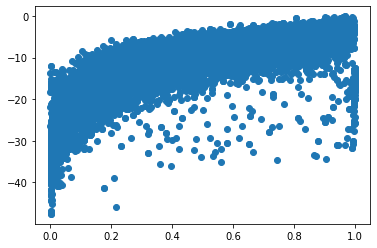

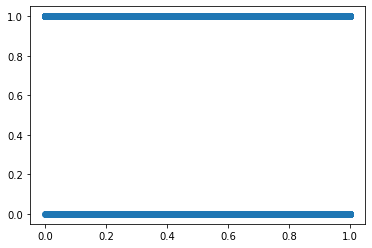

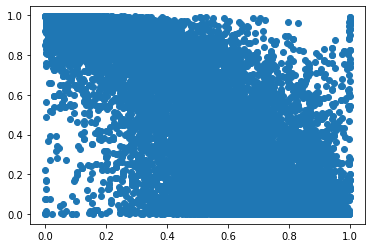

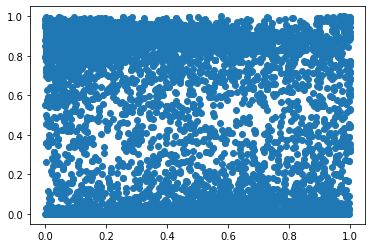

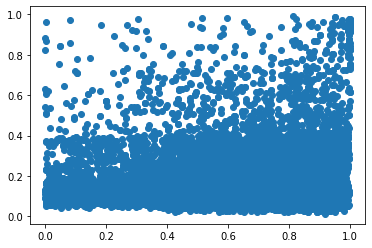

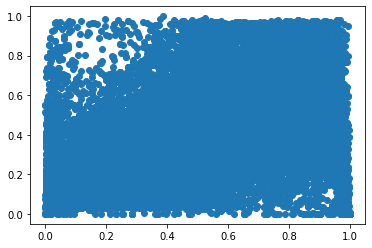

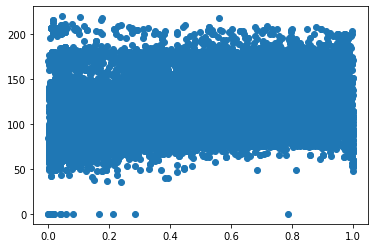

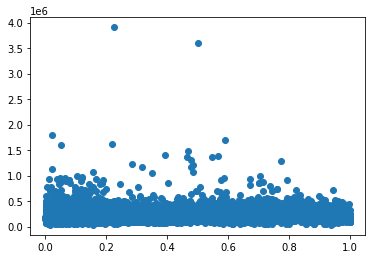

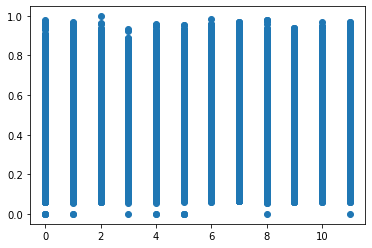

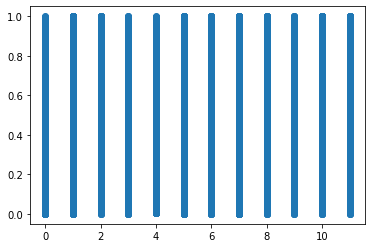

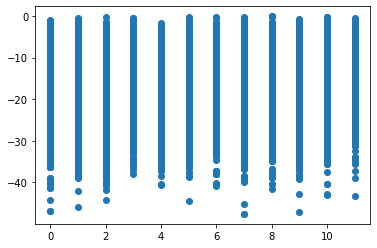

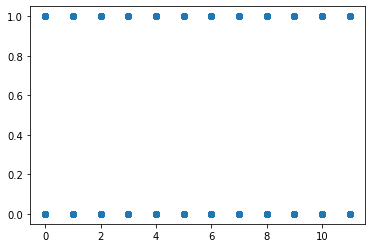

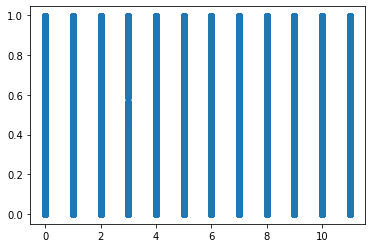

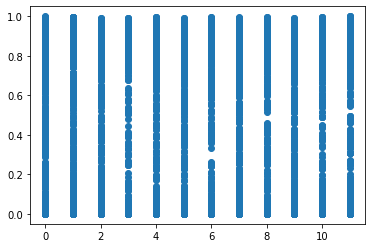

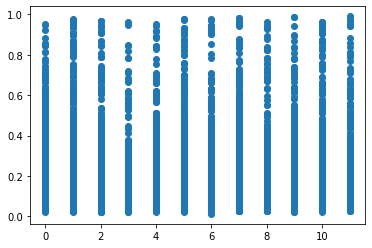

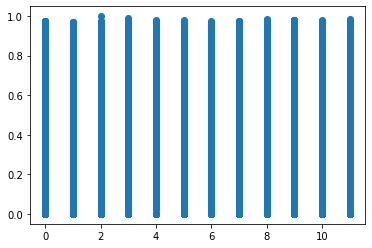

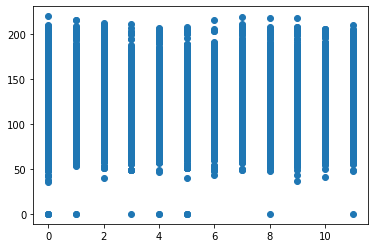

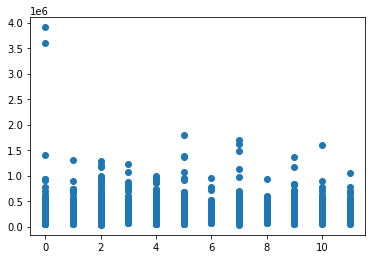

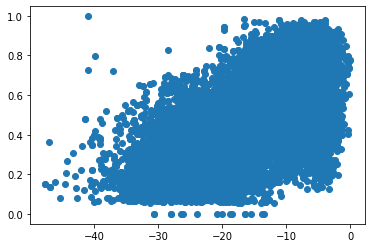

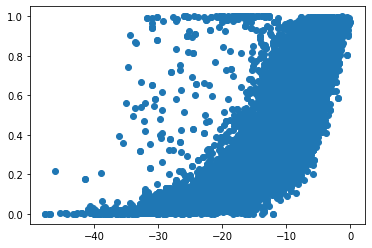

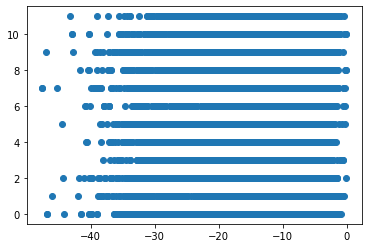

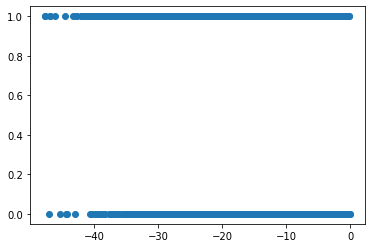

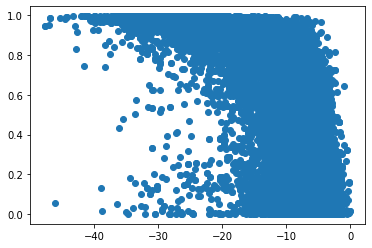

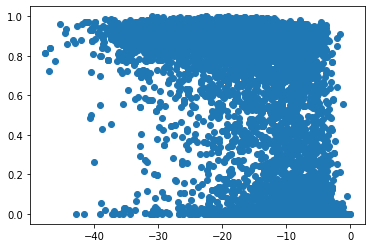

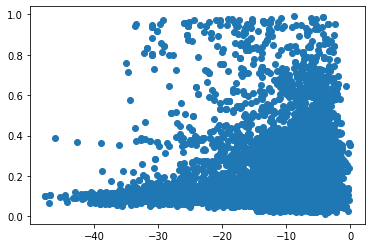

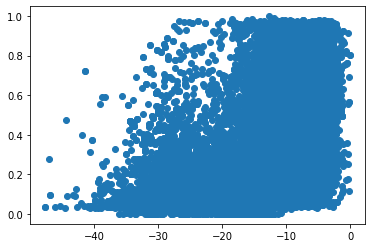

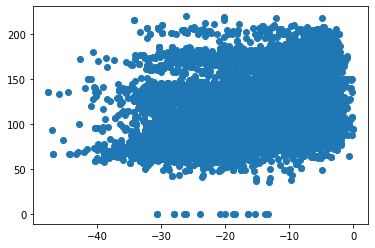

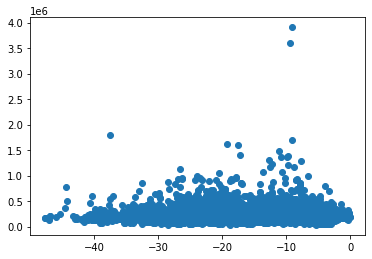

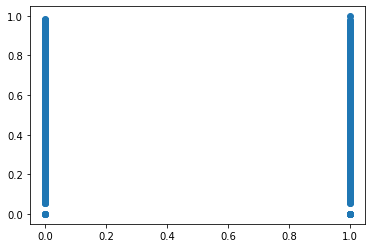

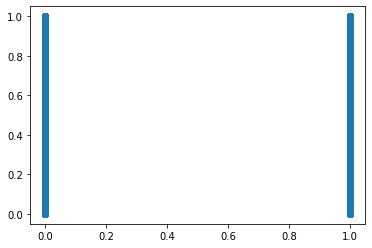

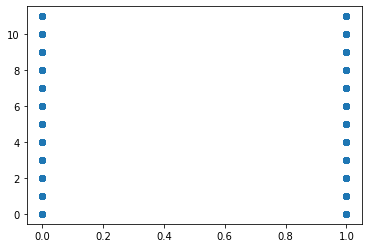

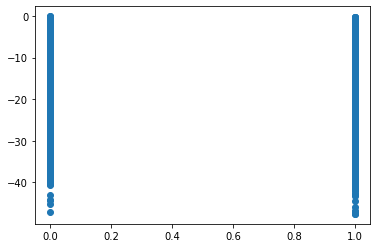

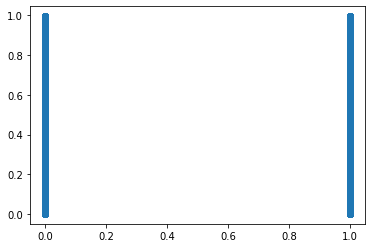

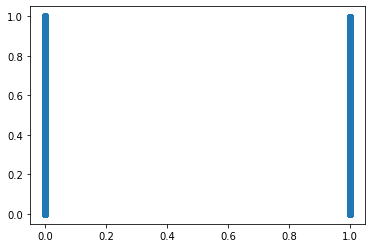

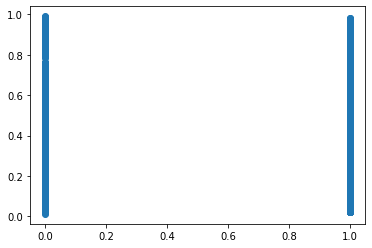

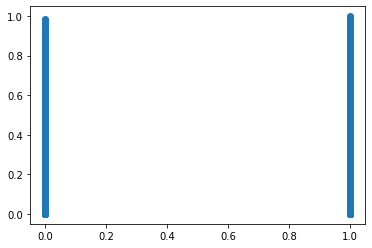

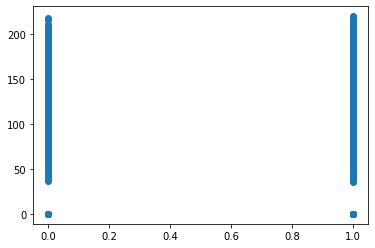

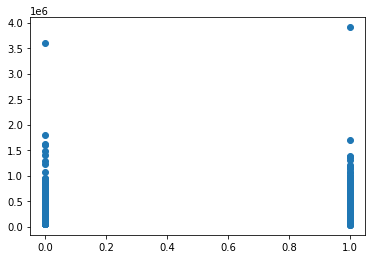

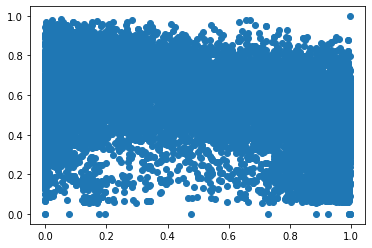

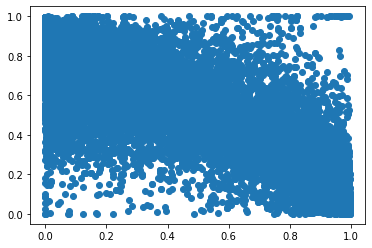

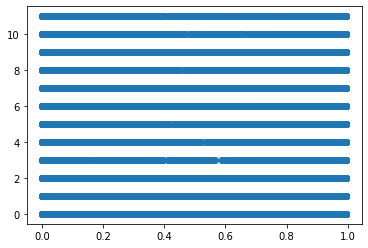

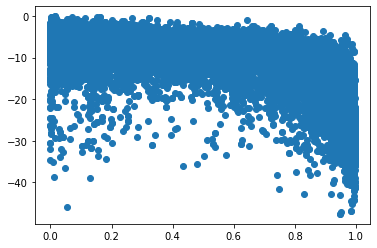

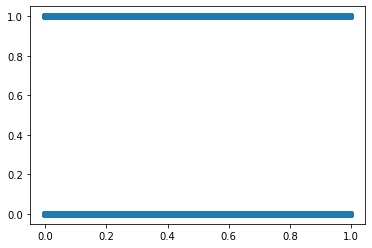

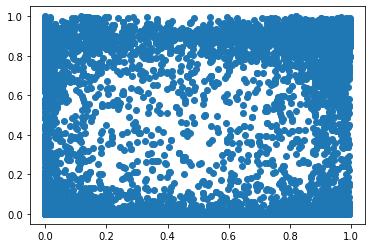

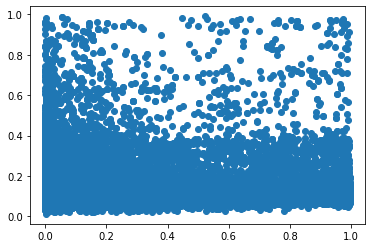

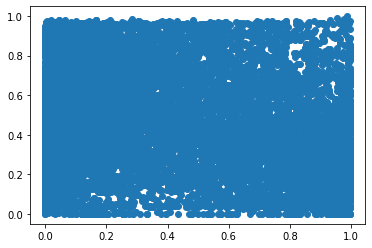

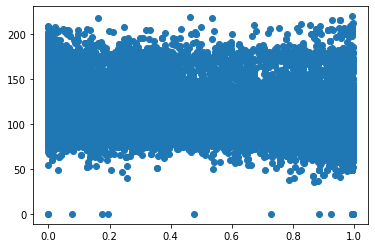

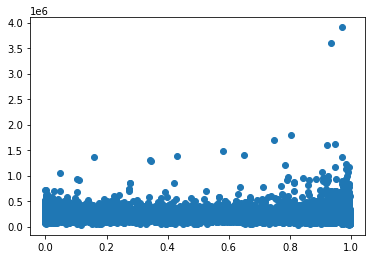

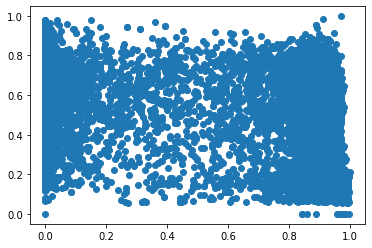

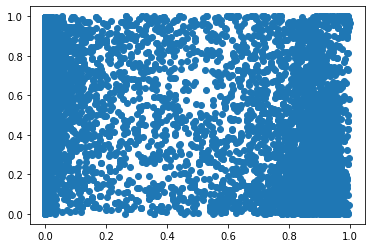

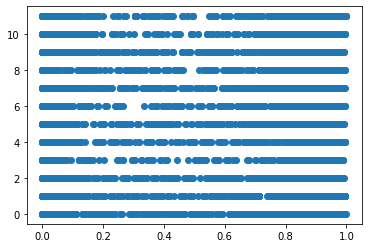

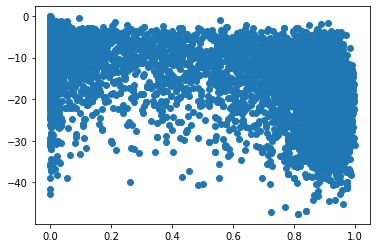

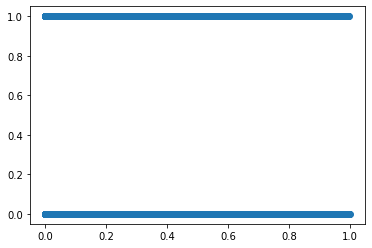

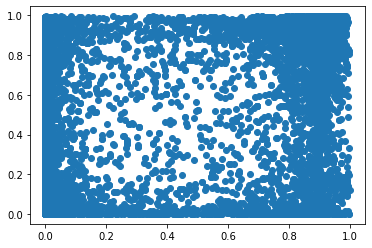

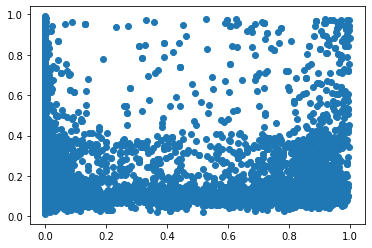

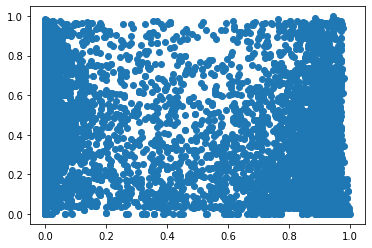

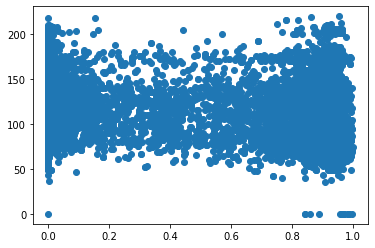

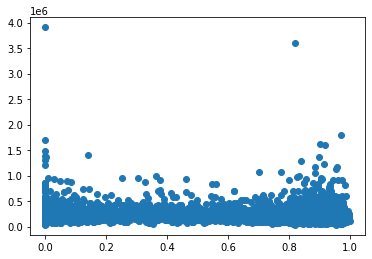

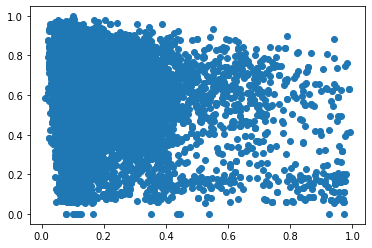

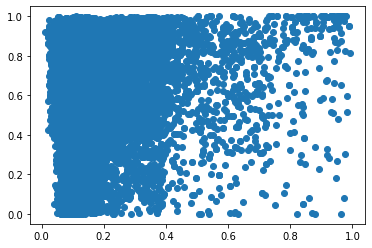

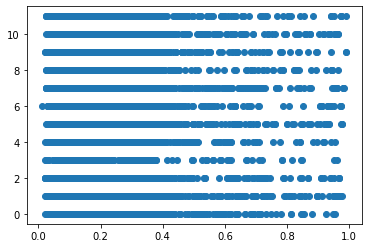

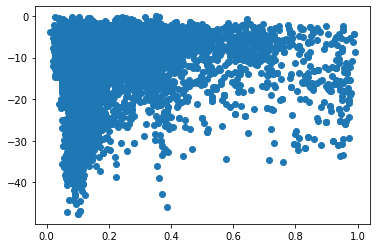

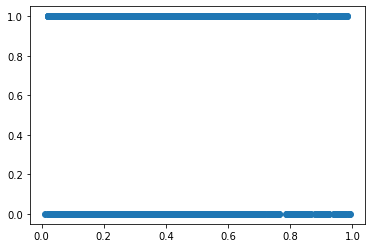

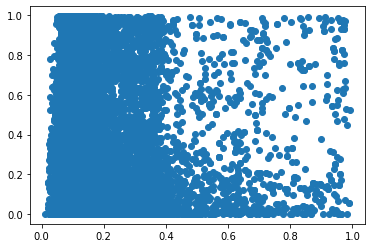

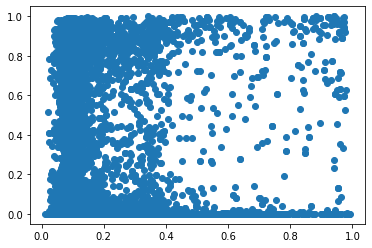

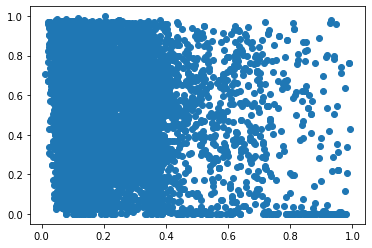

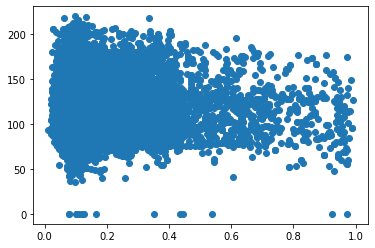

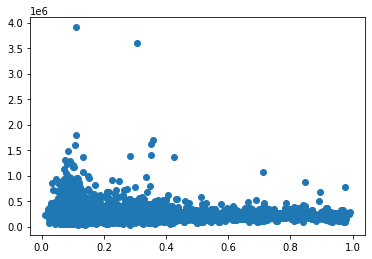

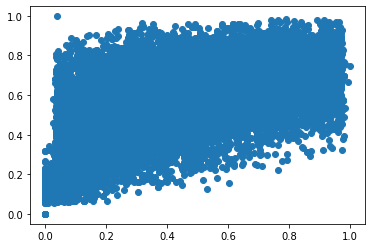

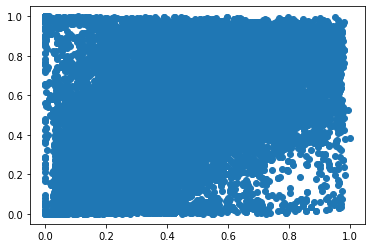

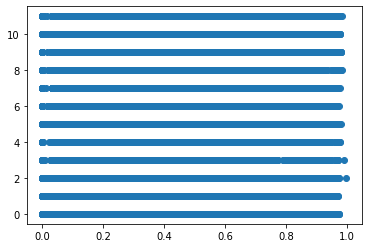

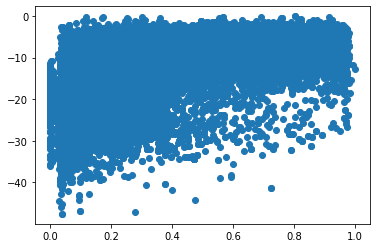

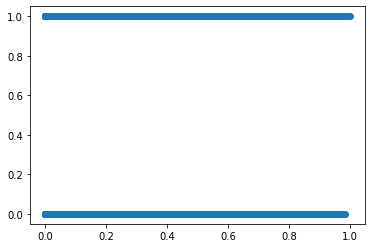

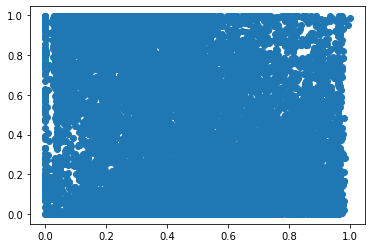

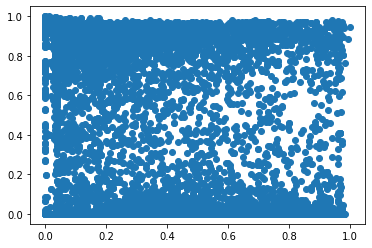

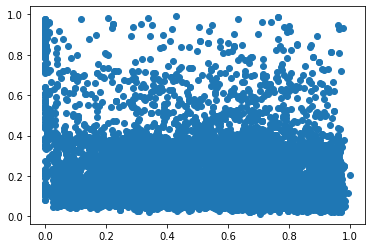

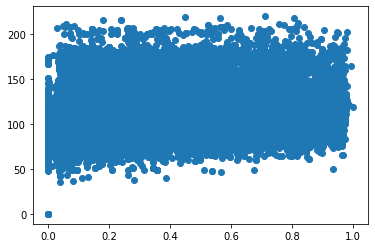

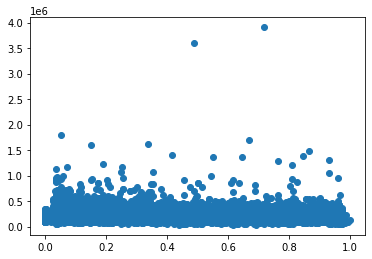

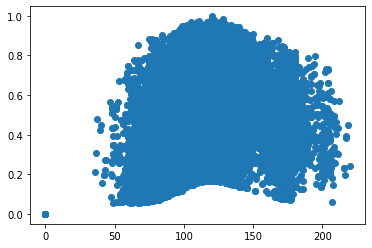

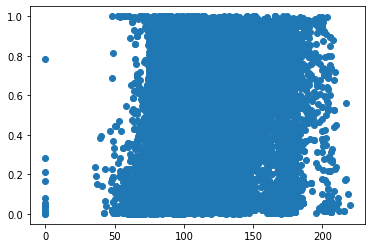

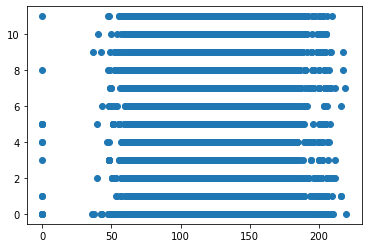

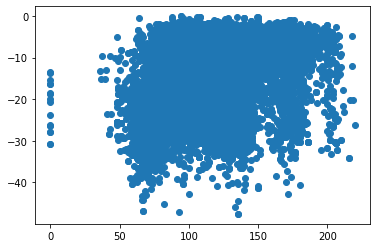

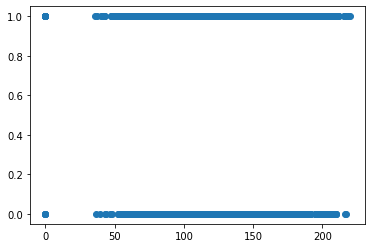

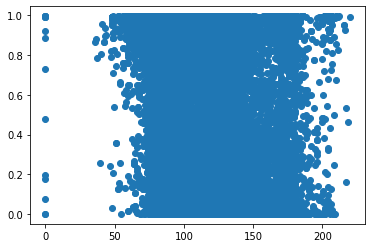

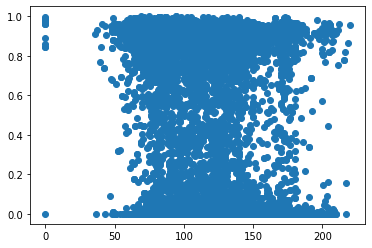

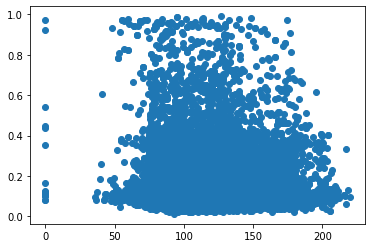

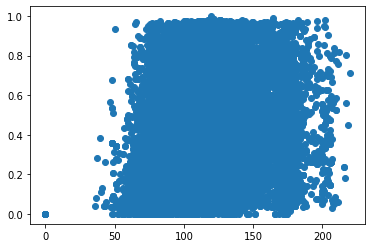

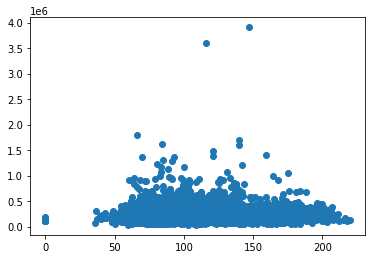

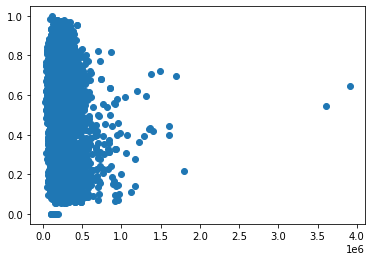

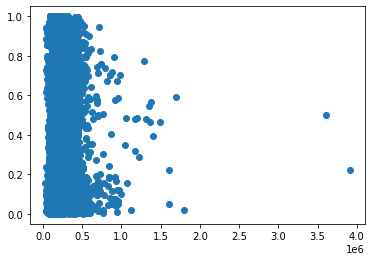

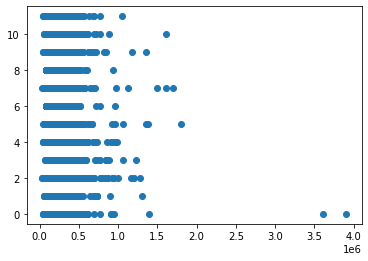

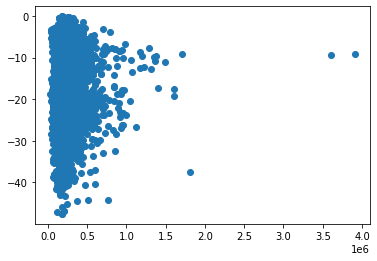

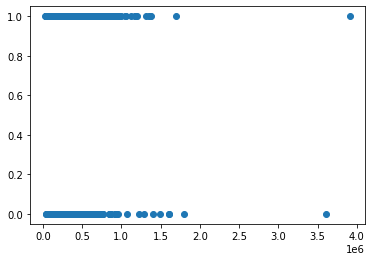

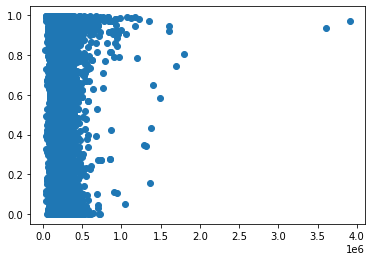

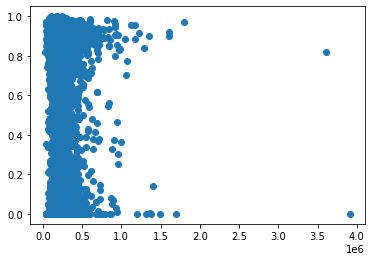

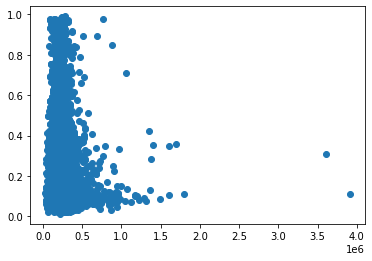

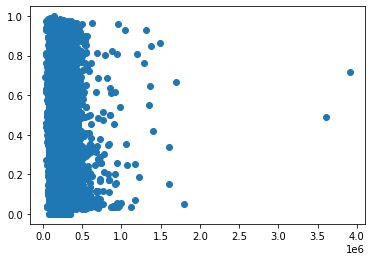

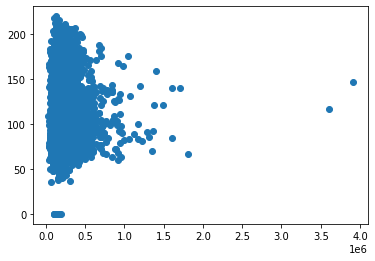

In [43]:
# perform scatterplot 
# Make a list of all the columns of train dataset

# Loop through the different columns 
cols = train_df.columns[:-1]


for col1 in cols:
    for col2 in cols:
        if col1 != col2:
            val1 = train_df_copy[col1].values
            val2 = train_df_copy[col2].values
            plt.scatter(x=val1, y=val2)
            plt.show()


** Observations from above scatter plot **

1. As value of store presence increases value of basket ratio decreases.
2. As value of store scrore increases value of basket ratio increases.
3. Increase in value of store ratio results in the increase of basket ratio's value

# HISTOGRAM
1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".

array([[<AxesSubplot:title={'center':'Store_Ratio'}>,
        <AxesSubplot:title={'center':'Basket_Ratio'}>,
        <AxesSubplot:title={'center':'Category_1'}>],
       [<AxesSubplot:title={'center':'Store_Score'}>,
        <AxesSubplot:title={'center':'Category_2'}>,
        <AxesSubplot:title={'center':'Store_Presence'}>],
       [<AxesSubplot:title={'center':'Score_1'}>,
        <AxesSubplot:title={'center':'Score_2'}>,
        <AxesSubplot:title={'center':'Score_3'}>],
       [<AxesSubplot:title={'center':'Score_4'}>,
        <AxesSubplot:title={'center':'time'}>,
        <AxesSubplot:title={'center':'popularity'}>]], dtype=object)

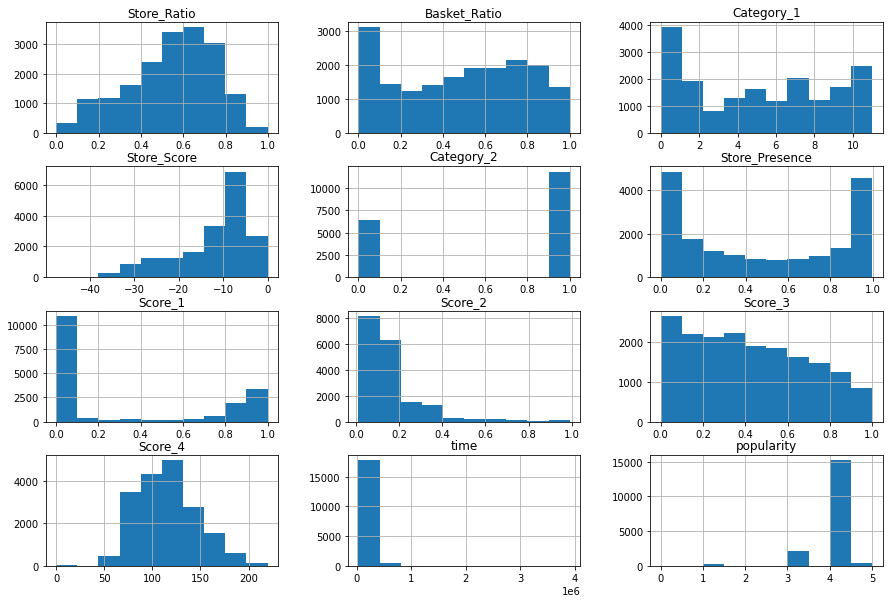

In [18]:
# perform histogram using pandas for all columns of train dataset
train_df_copy.hist(figsize=(15, 10))

**observation from above histogram**
1. The data distribution of store presence is bimodal
2. Score_2, score 1, score3 and time data distribution is skewed left.
3. Store score and popularity data distribution is skewed right.
4. distribution of basket ratio, carwgort 1  is multimodal.
5. distribution of store eatio is bimodal and skewed



# VIF - Variance inflation factor

1. The variance inflation factor (VIF) quantifies the extent of correlation between one predictor and the other predictors in a model.
2. It is used for diagnosing collinearity/multicollinearity.
3. Higher values signify that it is difficult to impossible to assess accurately the contribution of predictors to a model.

In [60]:
#import statsmodel.api
import statsmodels

In [61]:
# creating a dataframe of just numerical values
num_values = train_df_copy.iloc[:, :-1].values

# target values
target_values = train_df_copy.popularity.values

# numerical values column names

#print names
print(cols)

Index(['Store_Ratio', 'Basket_Ratio', 'Category_1', 'Store_Score',
       'Category_2', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3',
       'Score_4', 'time'],
      dtype='object')


In [62]:
# droping rows with from new dataframe empty cells

In [65]:
# Calculating VIF for each feature.

  # taking one column as target variable
y = target_values

  # taking all other remaining columns as fetaure variable
X = num_values

  # firting the OLS model on y and x
model = statsmodels.api.OLS(y, X)

  # geting the r^2 value of results.
results = model.fit()

print(results.summary())
  # calculating vif value


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                          6.161e+04
Date:                Sat, 12 Mar 2022   Prob (F-statistic):                        0.00
Time:                        17:27:17   Log-Likelihood:                         -17388.
No. Observations:               18208   AIC:                                  3.480e+04
Df Residuals:                   18197   BIC:                                  3.488e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

AttributeError: module 'statsmodels.stats' has no attribute 'outlier_influence'

Observations:

there is colinearity/multicolinearity between variables as the VIF value is almost upto 2.5

Store_Ratio, Basket_Ratio, Category_1, Store_Score, Category_2, Store_Presence, Score_1, Score_2, Score_3, Score_4, time they all have colinearity with all the variables.

# BOX PLOT

A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset

{'boxes': [<matplotlib.lines.Line2D at 0x7f002137c9d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0021381950>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0021387990>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0021387450>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f00213c8150>,
  <matplotlib.lines.Line2D at 0x7f0021381410>]}

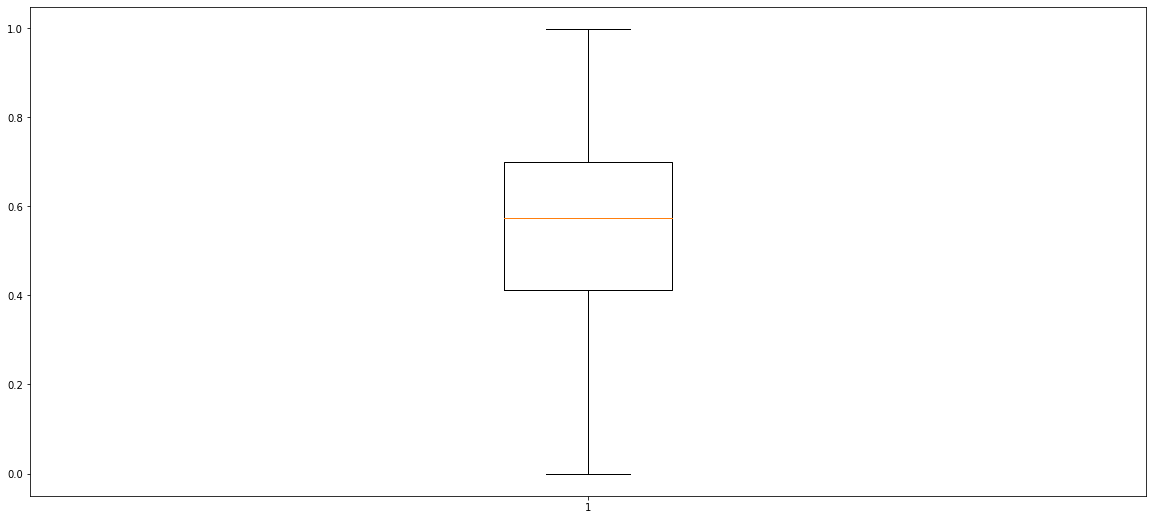

In [ ]:
# Perform a box plot on Store_Ratio 


from above box plot graph:

Store ratio

1. 25% of  store ratio have value between range 0 to 0.4.

2. 25% of store ratio have value between range 0.4 to 0.6.
3. 25% of store ratio have value between range 0.6 to 0.7.
4. 25% of store ratio have value between range 0.7 to 1.

The mean store ratio is around 6.

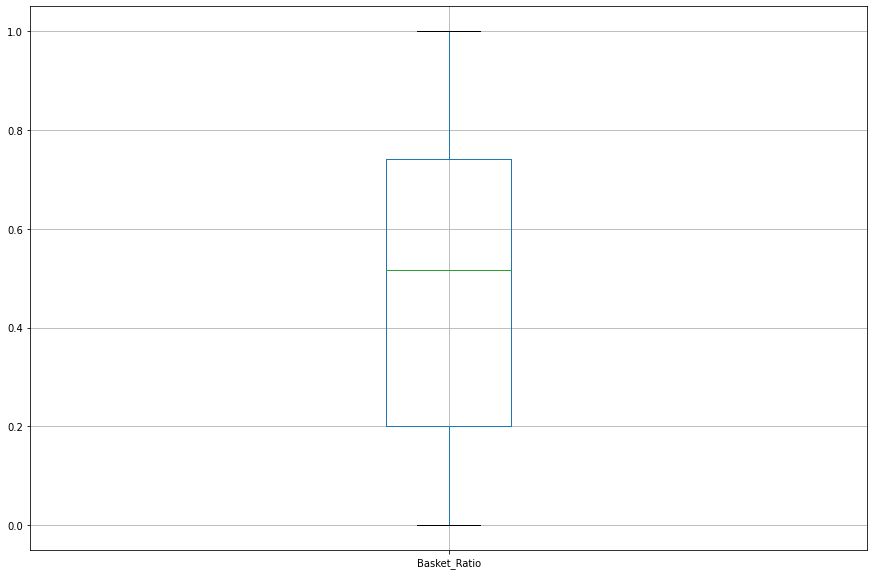

In [ ]:

# Perform a box plot on Basket_Ratio 


from above box plot graph:

basket ratio

1. 25% of  basket ratio have value between range 0 to 0.2.
2. 25% of basket ratio have value between range 0.4 to 0.52
3. 25% of basket ratio have value between range 0.52 to 0.78.
4. 25% of basket ratio have value between range 0.78 to 1.

The mean basket ratio is around 0.52

{'boxes': [<matplotlib.lines.Line2D at 0x7f0ba52aec50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0ba52c2c90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0ba52cad10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0ba52ca790>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0ba52e9710>,
  <matplotlib.lines.Line2D at 0x7f0ba52c2750>]}

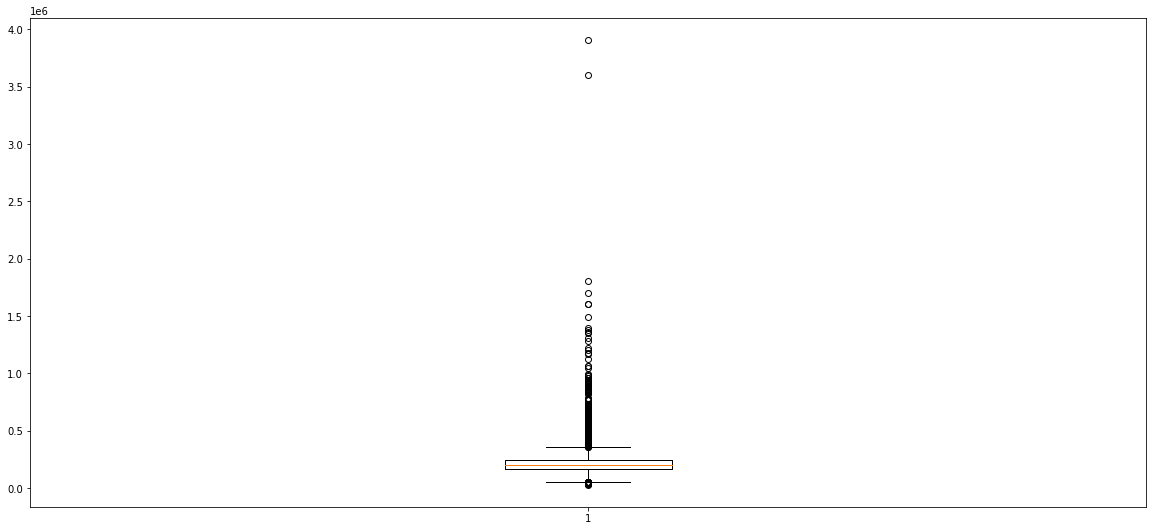

In [ ]:
# Perform a box plot on time



from above box plot graph:

time

1. 25% of  time have value between range 0 to 0.2.

2. 25% of time have value between range 0.2 to 0.25
3. 25% of time have value between range 0.25 to 0.3.
4. 25% of time have value between range 0.3 to 0.4

The mean time is around 0.25

{'boxes': [<matplotlib.lines.Line2D at 0x7f0ba4da0910>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0ba4da49d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0ba4daca10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0ba4dac4d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0ba4da0f10>,
  <matplotlib.lines.Line2D at 0x7f0ba4da4490>]}

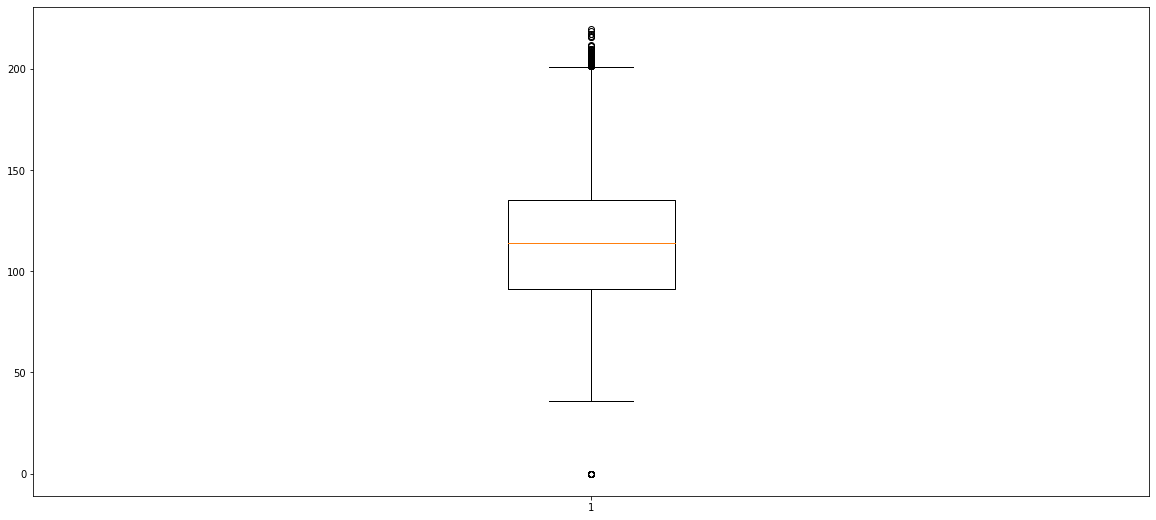

In [ ]:
# Perform a box plot on Score_4 



from above box plot graph:

score 4

1. 25% of  score 4 have value between range 40 to 90.

2. 25% of score 4 have value between range 90 to 125
3. 25% of score 4 have value between range 125 to 140.
4. 25% of score 4 have value between range 140 to 200.

The mean score 4 is around 125

{'boxes': [<matplotlib.lines.Line2D at 0x7f0ba4d8be90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0ba4d92f50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0ba4d1af90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0ba4d1aa50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0ba4d924d0>,
  <matplotlib.lines.Line2D at 0x7f0ba4d92a10>]}

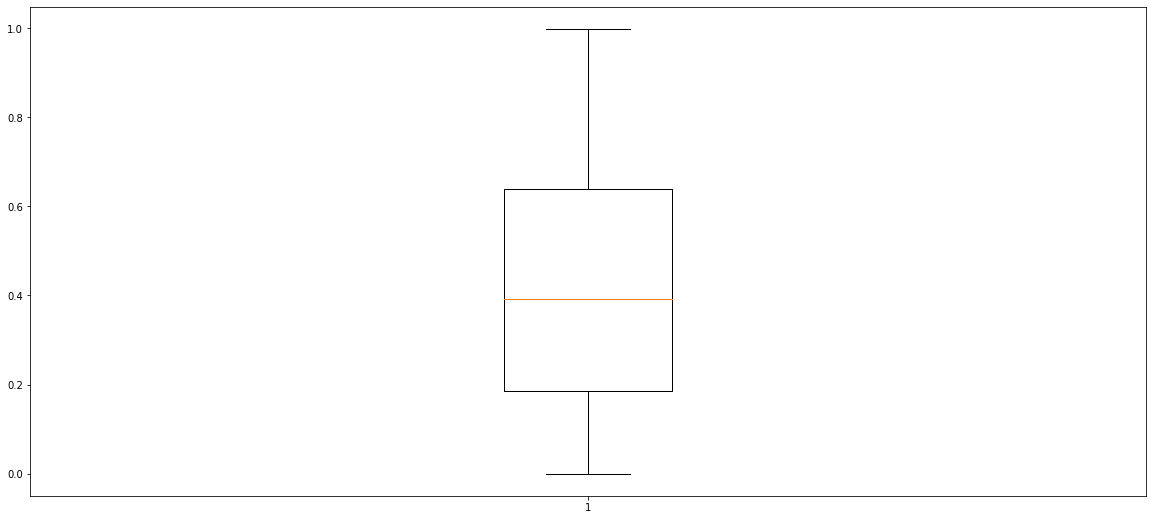

In [ ]:
# Perform a box plot on Score_3 



from above box plot graph:

score3

1. 25% of  score3 have value between range 0 to 0.2.

2. 25% of score3 have value between range 0.2 to 0.4
3. 25% of score3 have value between range 0.4 to 0.62.
4. 25% of score3 have value between range 0.62 to 1.

The mean score3 is around 0.4

{'boxes': [<matplotlib.lines.Line2D at 0x7f0ba4cffcd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0ba4d06d90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0ba4d0bdd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0ba4d0b890>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0ba4d06310>,
  <matplotlib.lines.Line2D at 0x7f0ba4d06850>]}

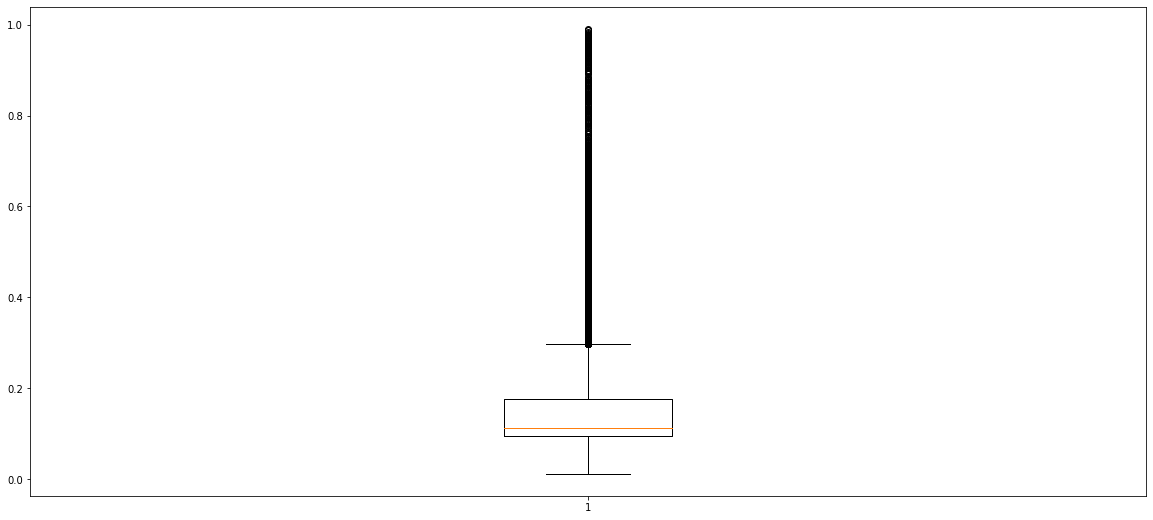

In [ ]:
# Perform a box plot on Score_2 



from above box plot graph:

score2

1. 25% of  score2 have value between range 0 to 0.1.

2. 25% of score2 have value between range 0.1 to 0.12
3. 25% of score2 have value between range 0.12 to 0.18.
4. 25% of score2 have value between range 0.18 to 1.

The mean score2 is around 0.12

{'boxes': [<matplotlib.lines.Line2D at 0x7f0ba4d5da50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0ba4dd0750>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0ba4d554d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0ba4d8bd10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0ba4d64110>,
  <matplotlib.lines.Line2D at 0x7f0ba4d64750>]}

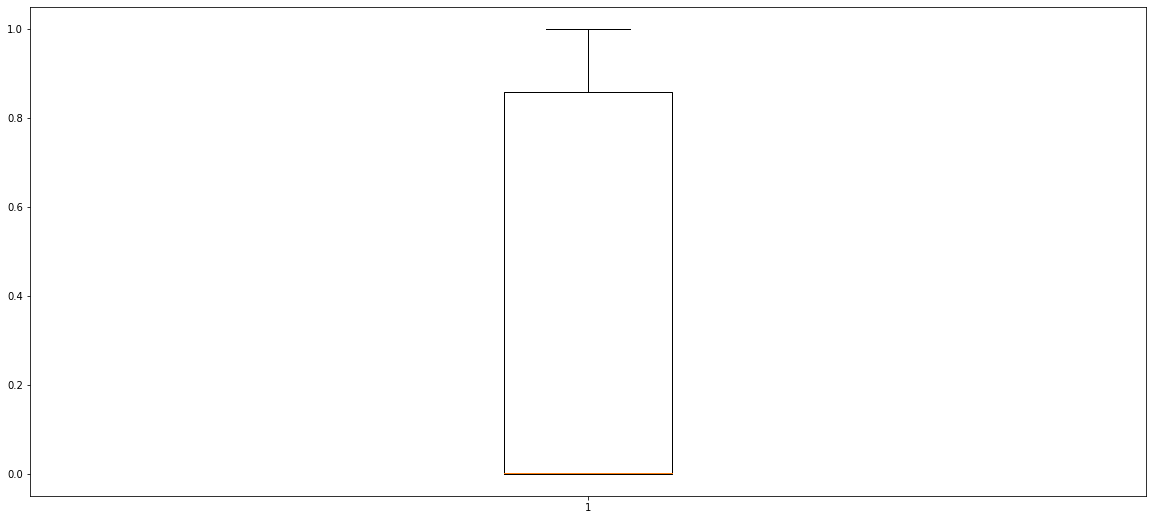

In [ ]:
# Perform a box plot on Score_1 



from above box plot graph:

score1

1. 25% of  score1 have value between range 0 to 0.0.

2. 25% of score1 have value between range 0.0 to 0.0
3. 25% of score1 have value between range 0.0 to 0.9
4. 25% of score1 have value between range 0.9 to 1.

The mean score1 is around 0.0

{'boxes': [<matplotlib.lines.Line2D at 0x7f0ba4c54250>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0ba4c59310>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0ba4be1350>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0ba4c59dd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0ba4c54850>,
  <matplotlib.lines.Line2D at 0x7f0ba4c54d90>]}

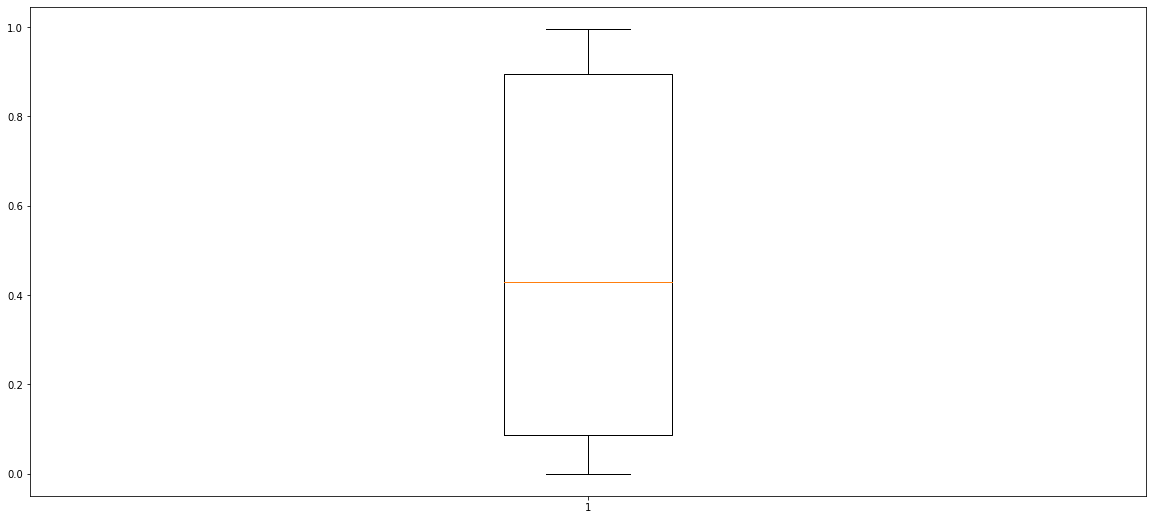

In [ ]:
# Perform a box plot on Store_Presence 



from above box plot graph:

store presence

1. 25% of  store presence have value between range 0 to 0.35.

2. 25% of store presence have value between range 0.35 to 0.42
3. 25% of store presence have value between range 0.42 to 0.95.
4. 25% of store presence have value between range 0.95 to 1.

The mean store presence is around 0.42

{'boxes': [<matplotlib.lines.Line2D at 0x7f0ba4b2b690>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0ba4b30750>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0ba4b37790>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0ba4b37250>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0ba4b2bc90>,
  <matplotlib.lines.Line2D at 0x7f0ba4b30210>]}

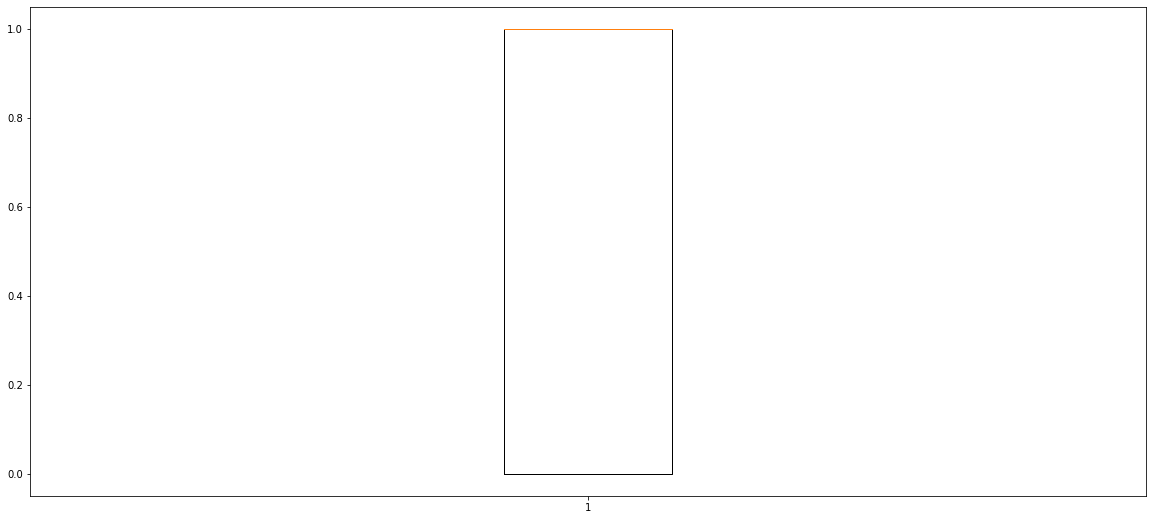

In [ ]:
# Perform a box plot on Category_2



from above box plot graph:

category 2

1. 25% of  category2 have value between range 0 to 0.0.

2. 25% of category2 have value between range 0.0 to 0.1
3. 25% of category2 have value between range 0.1 to 0.1
4. 25% of category2 have value between range 0.1 to 1.

The mean category2 is around 0.1

{'boxes': [<matplotlib.lines.Line2D at 0x7f0ba4a9b090>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0ba4aa0150>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0ba4aa8190>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0ba4aa0c10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0ba4a9b690>,
  <matplotlib.lines.Line2D at 0x7f0ba4a9bbd0>]}

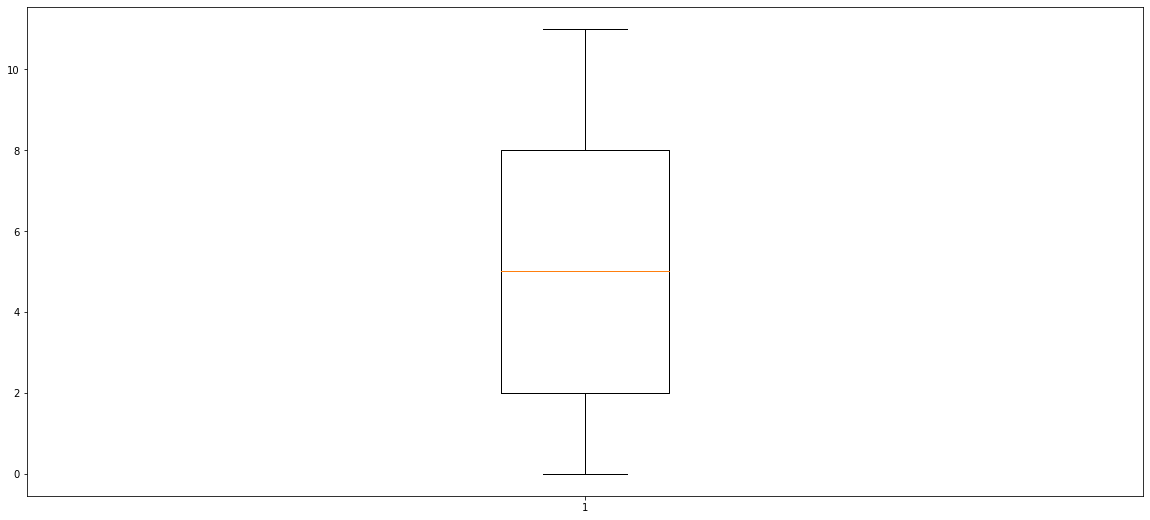

In [ ]:

# Perform a box plot on Category_1 



from above box plot graph:

category1

1. 25% of  category1 have value between range 0 to 0.2.

2. 25% of category1 have value between range 0.2 to 0.5
3. 25% of category1 have value between range 0.5 to 0.8.
4. 25% of category1 have value between range 0.8 to 1.

The mean category1 is around 0.5

{'boxes': [<matplotlib.lines.Line2D at 0x7f0ba4a86910>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0ba4a8b9d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0ba4a90a10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0ba4a904d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0ba4a86f10>,
  <matplotlib.lines.Line2D at 0x7f0ba4a8b490>]}

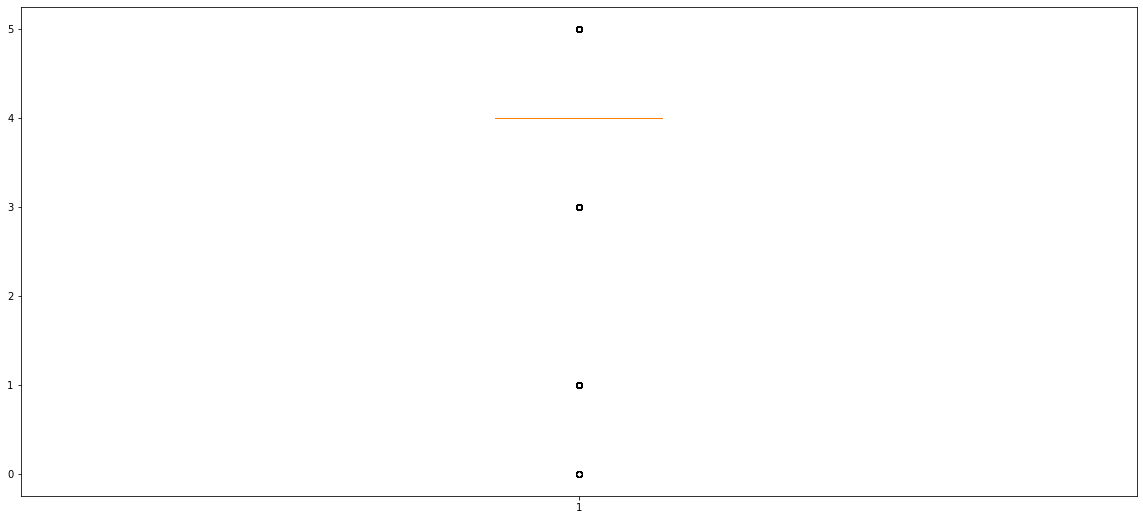

In [ ]:
# Perform a box plot on popularity



#COUNT PLOT
1. A countplot is kind of like a histogram or a bar graph for some categorical area.

2. It simply shows the number of occurrences of an item based on a certain type of category.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


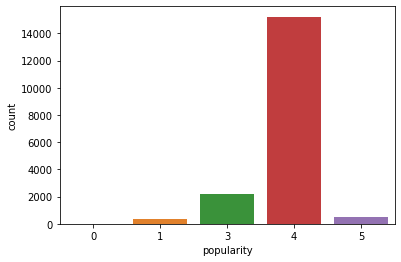

In [ ]:
# Perform the countplot on the popularity


From above count plot

distribution of values over complete dataset are skewed right

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


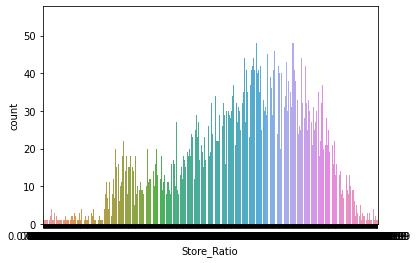

In [ ]:
# Perform the countplot on the Store Ratio


From above count plot

distribution of values over complete dataset are skewed right.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


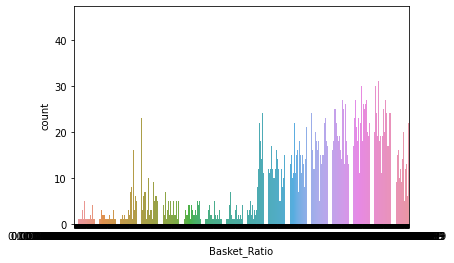

In [ ]:
# Perform the countplot on the Basket ratio


From above count plot

distribution of values over complete dataset are skewed right

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


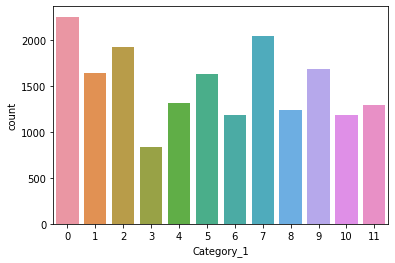

In [ ]:
# Perform the countplot on the category 1


distribution of values over complete dataset is multimodal

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


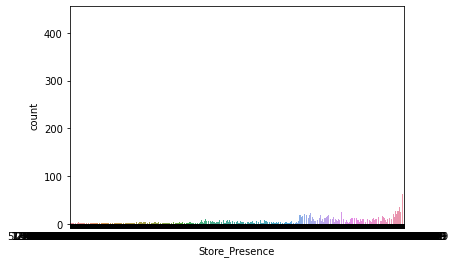

In [ ]:
# Perform the countplot on the store presence


distribution of values over complete dataset is skewed to right

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


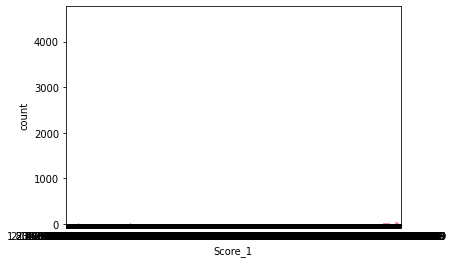

In [ ]:
# Perform the countplot on the score 1


All the values are round zero very few are above zero

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


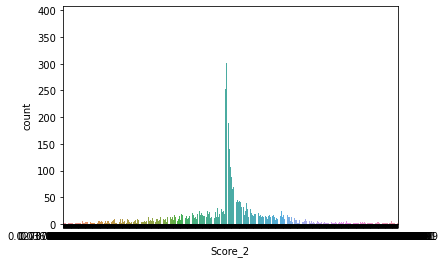

In [ ]:
# Perform the countplot on the Score 2


distribution of values over complete dataset is unimodal.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


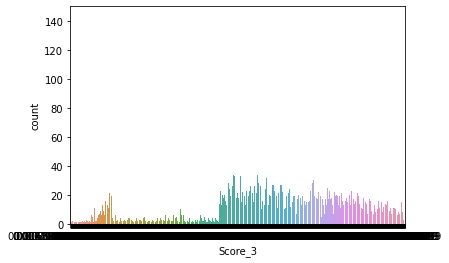

In [ ]:
# Perform the countplot on the Score 3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


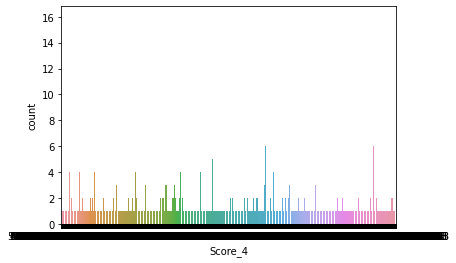

In [ ]:
# Perform the countplot on the Score 4


From above count plot

distribution of values over complete dataset are multi model that is more than one peak.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


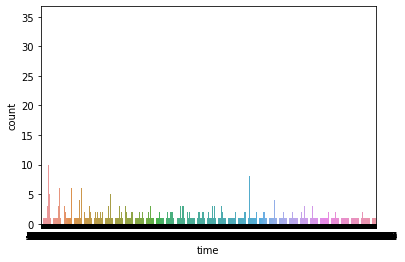

In [ ]:
# Perform the countplot on time


distribution of values over complete dataset are multi model

# point PLOT

1. A point plot uses scatter plot glyphs to visualize features like point estimates and confidence intervals.

2. A point plot uses scatter plot points to represent the central tendency of numeric data.

3. These plots make use of error bars to indicate any uncertainty around the numeric

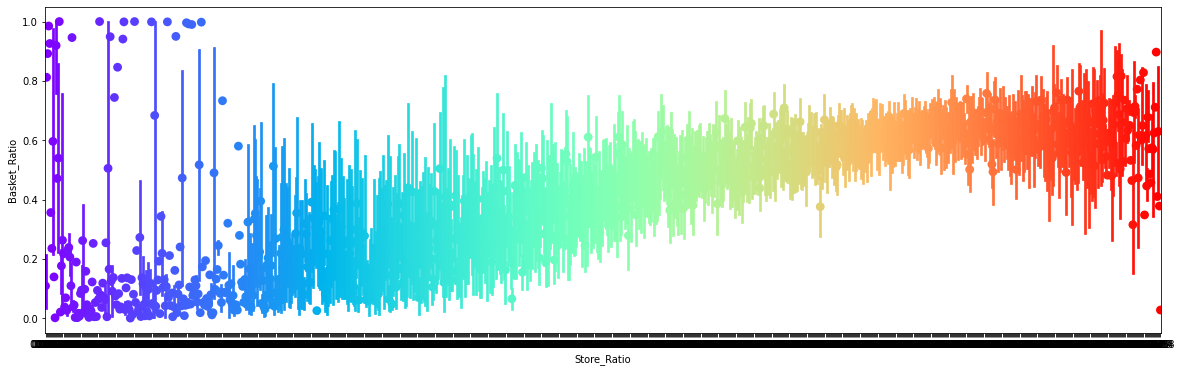

In [ ]:
# Perform point plot between Store Ratio and Basket Ratio


From above point plot

There is a increase in basket ratio when there is a increase in store ratio. That is both are correlated

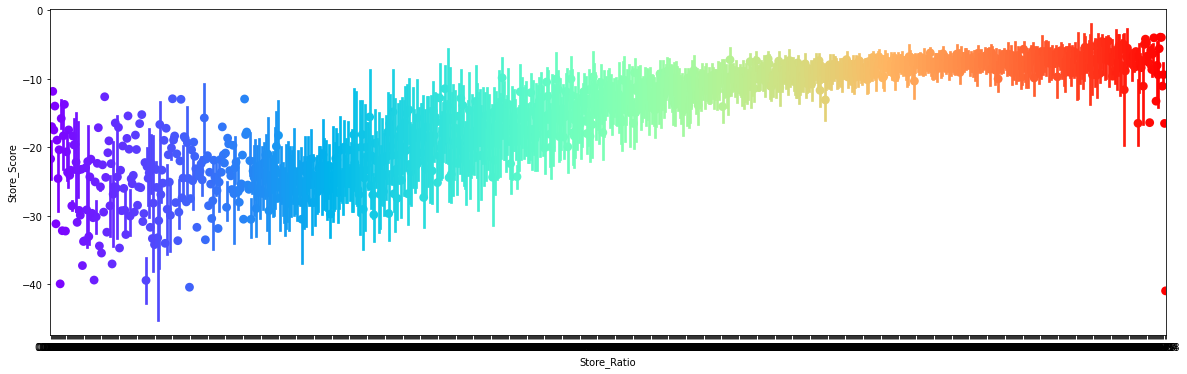

In [ ]:
# Perform point plot between Store Ratio and Store Score


From above point plot

There is a increase in store score when there is a increase in store ratio. That is both are correlated

increase decrease increase decrease

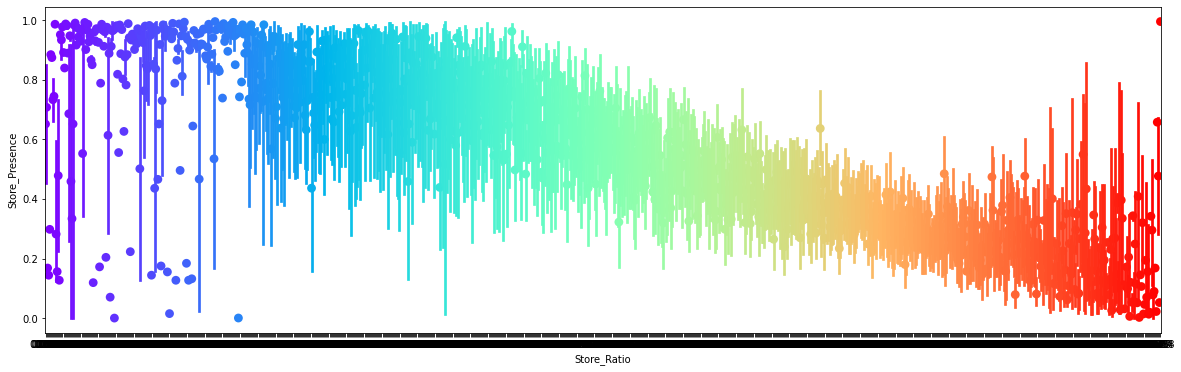

In [ ]:
# Perform point plot between Store Ratio and Store Presence


From above point plot

There is a increase in store ratio when there is a decrease in store presence.

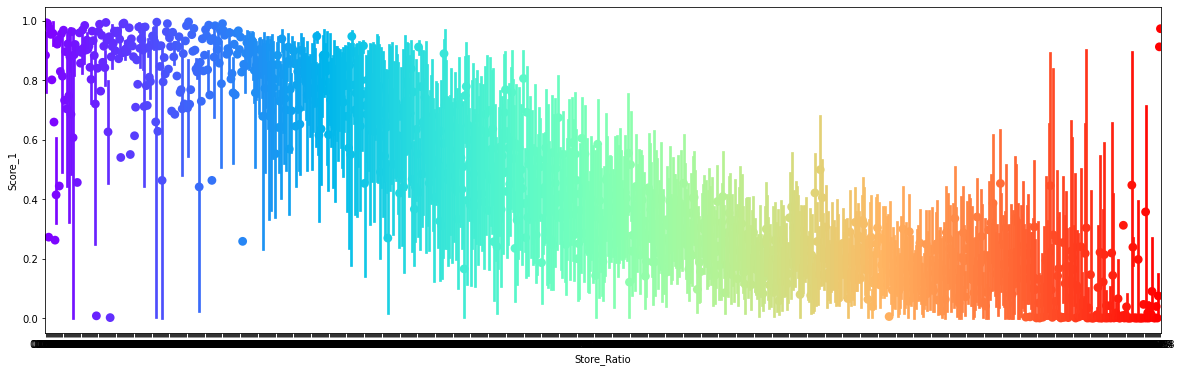

In [ ]:
# Perform point plot between Store Ratio and Score 1


From above point plot

There is a decrease in score3 when there is a increase in store ratio.

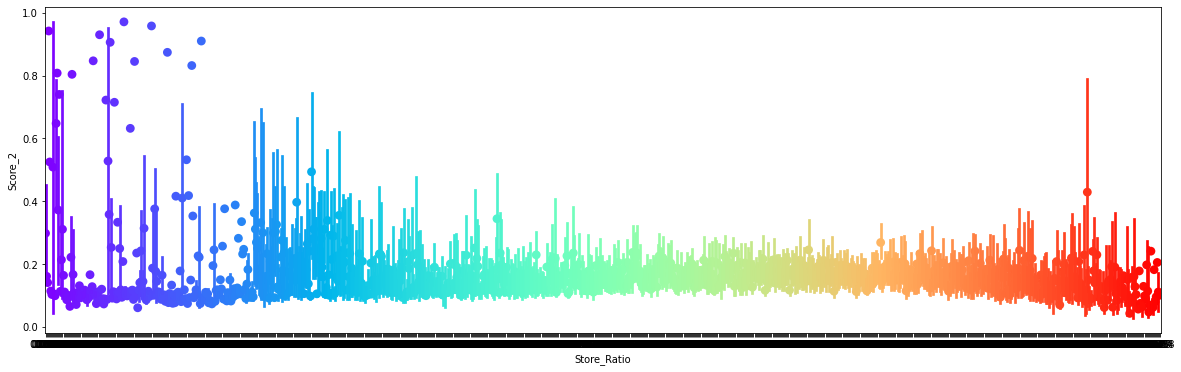

In [ ]:
# Perform point plot between Store Ratio and Score 2 


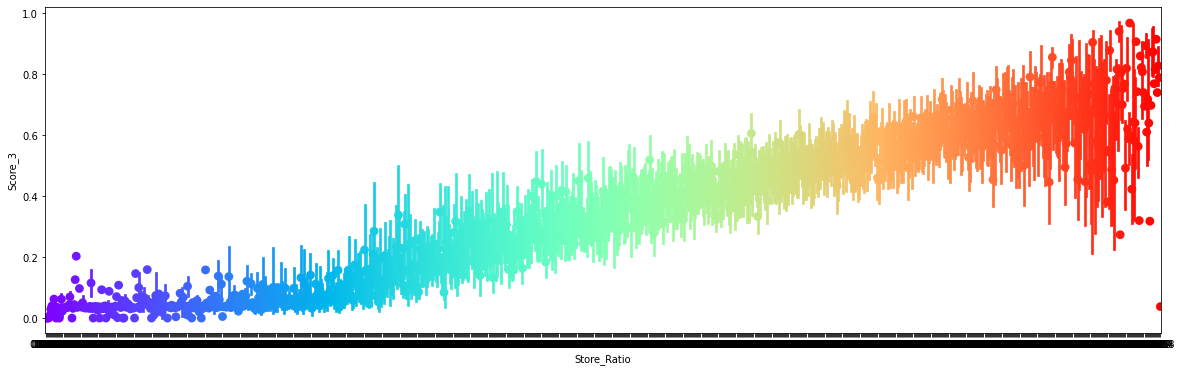

In [ ]:
# Perform point plot between Store ratio and Score 3


From above point plot

There is a increase in store ratio when there is a increase in score3. That is both are correlated

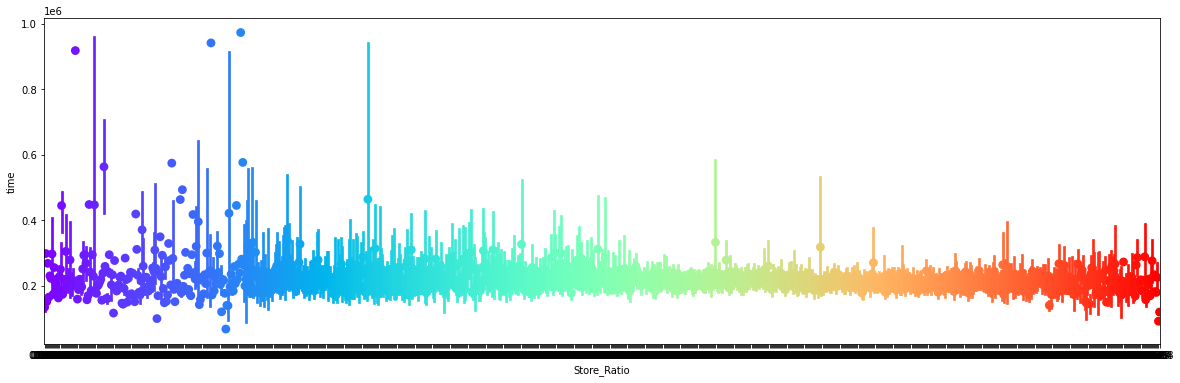

In [ ]:
# Perform point plot between Store Ratio and time


From above pointplot

1. Most of the points are between 0.2 to 0.3
2. Very few points above 0.3

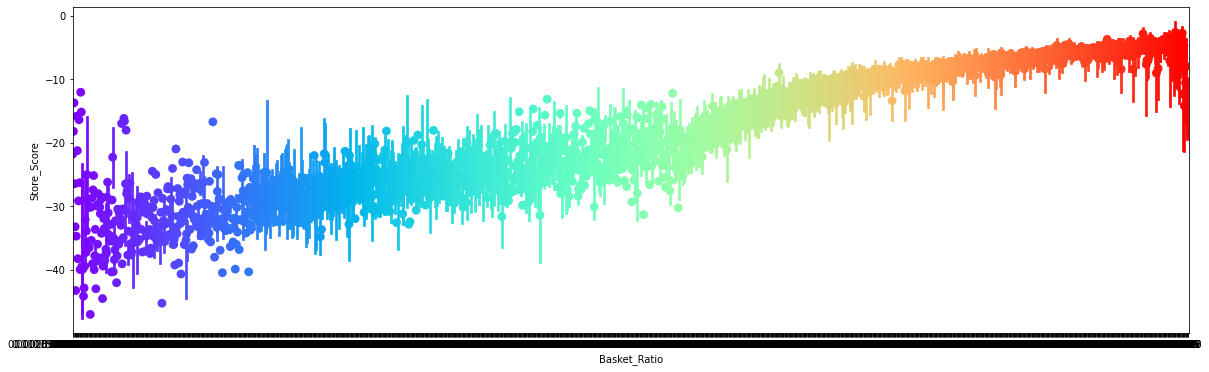

In [ ]:
# Perform point plot between Basket Ratio and Store Score


From above point plot

There is a increase in store score when there is a increase in basket ratio. 

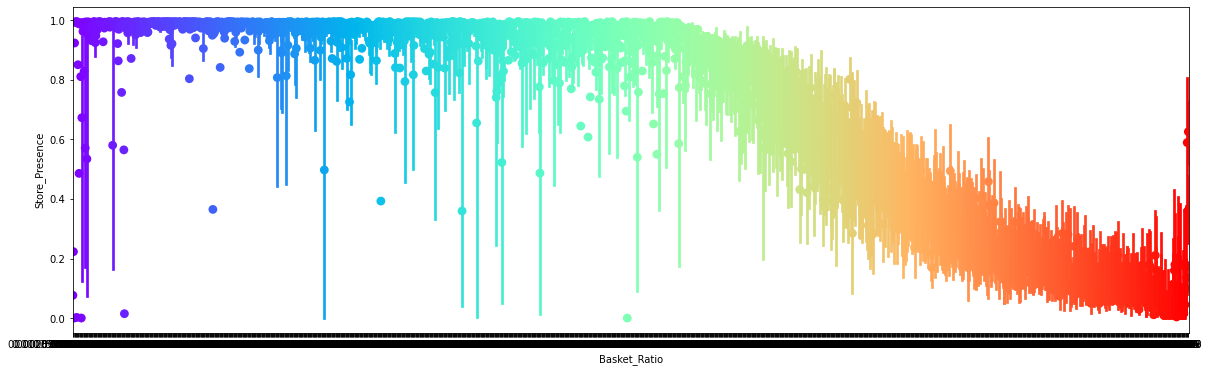

In [ ]:
# Perform point plot between Basket Ratio and Store Presence


observation from above point plot 

there is decrease in value on store presence as value of basket ratio is increasing

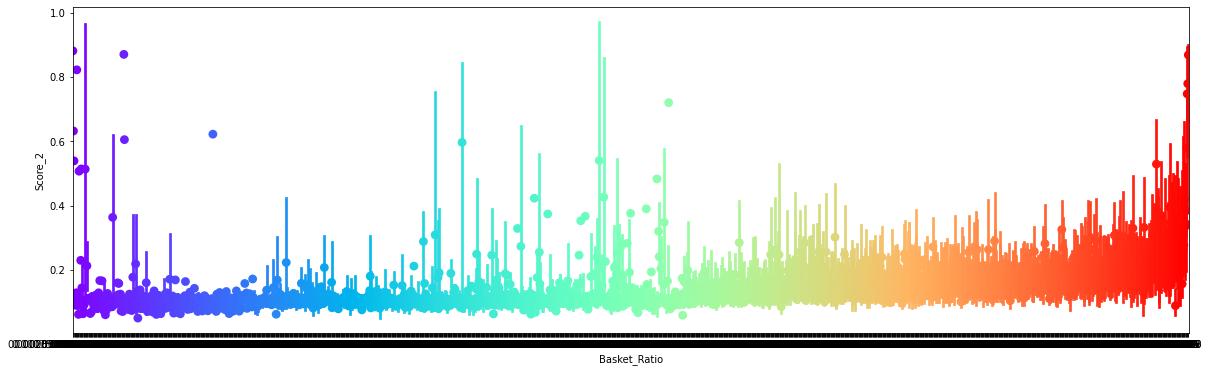

In [ ]:
# Perform point plot between Basket Ratio and Score 2


From above pointplot

1. Most of the points are between 0.0 to 0.2
2. Very few points above 0.2

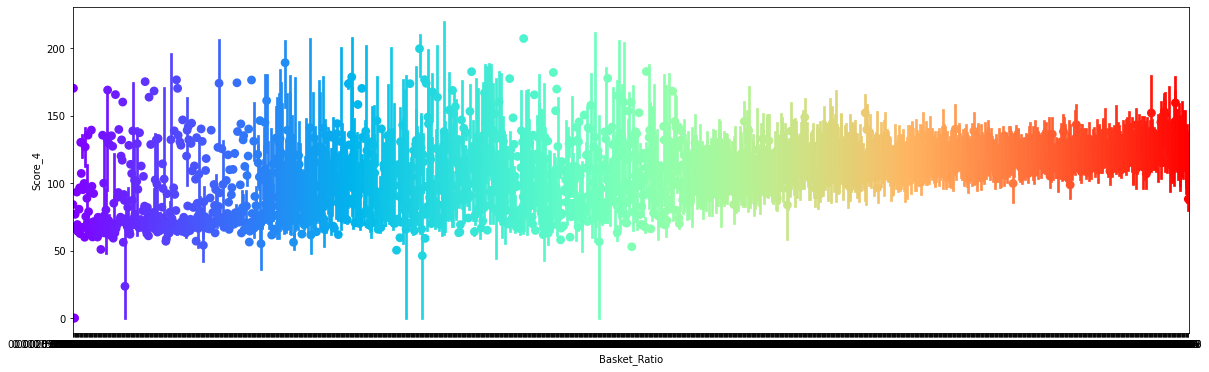

In [ ]:
# Perform point plot between Basket Ratio and Score 4


From above pointplot

Most of the points are between 50 to 150

Very few points above 150 and below 50

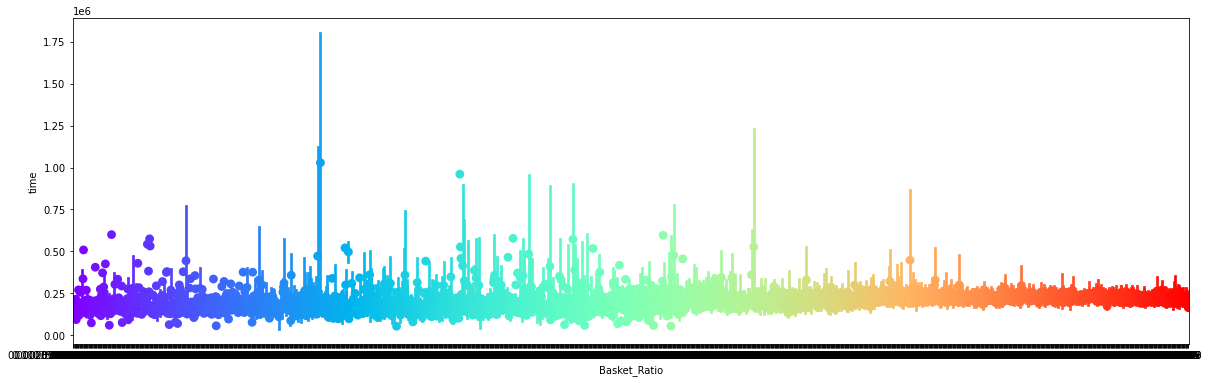

In [ ]:
# Perform point plot between Basket Ratio and Time


From above pointplot

Most of the points are between 0.0 to 0.50

Very few points above 0.50



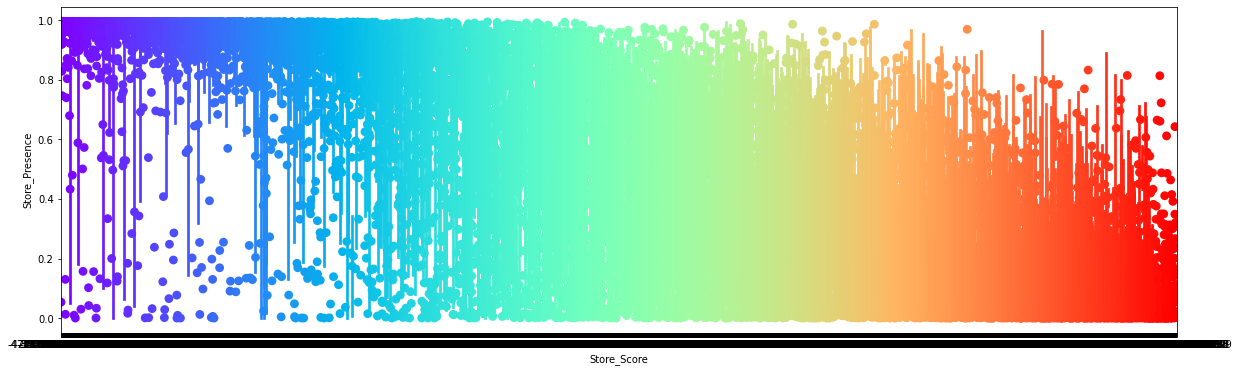

In [ ]:
# Perform point plot between Store Score and Store Presence


as the value of store score increasing value of store presence decreasing

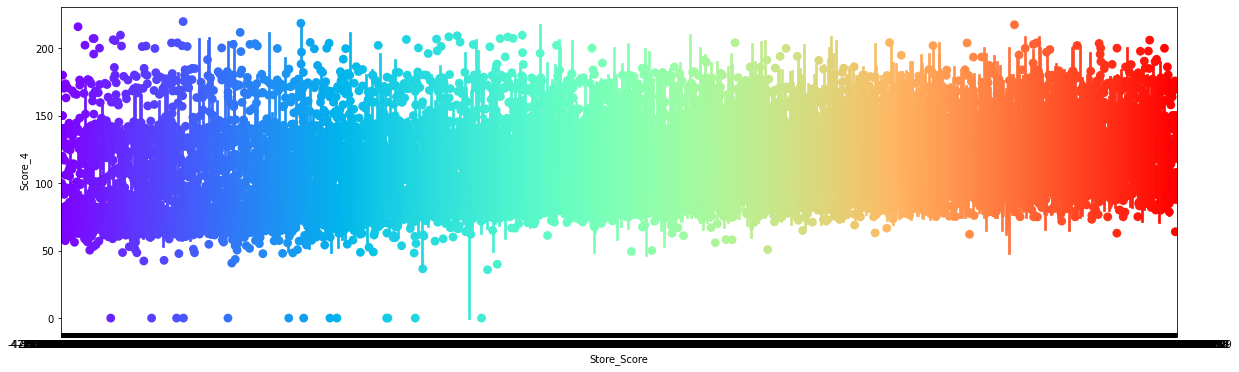

In [ ]:
# Perform point plot between Store Score and Score 4 


From above pointplot

Most of the points are between 50 to 200

Very few points above 200 and below 50

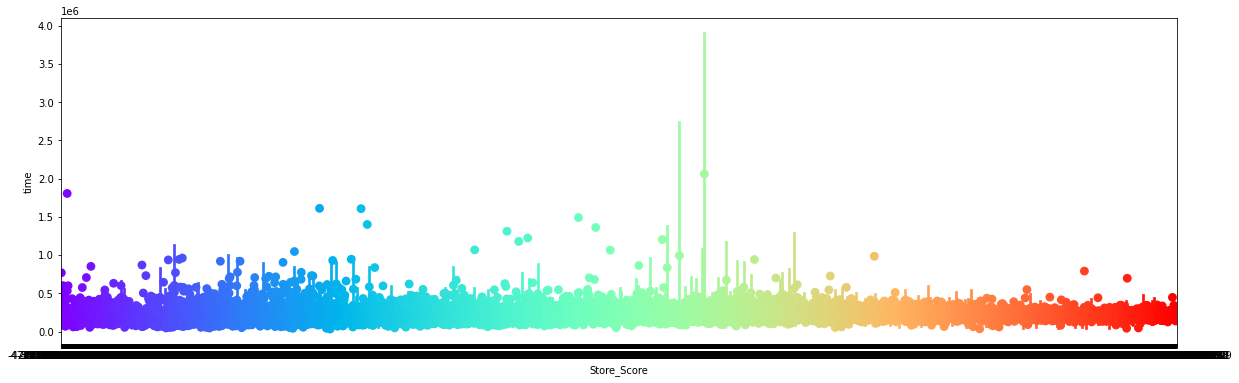

In [ ]:
# Perform point plot between Store Score and time


From above pointplot

Most of the points are between 0.0 and 0.5

Very few points above 0.5

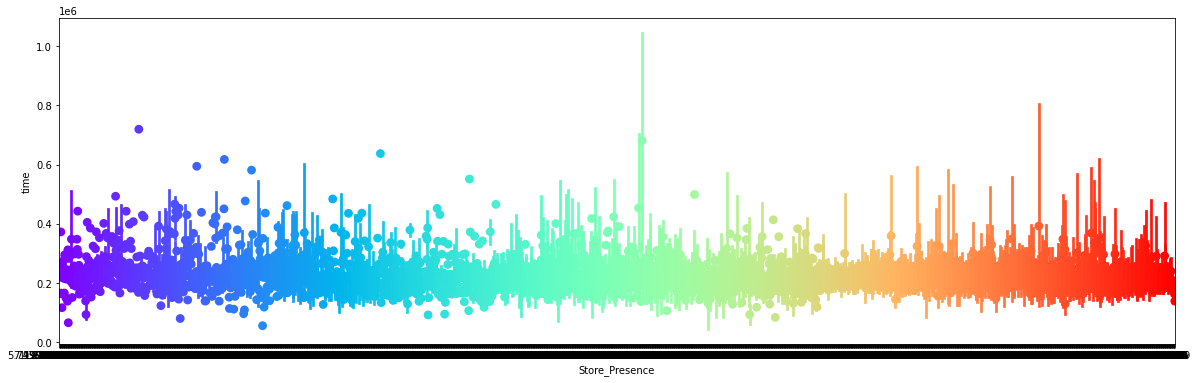

In [ ]:
# Perform point plot between Store Presence and time


From above pointplot

Most of the points are between 0.1 and 0.4

Very few points above 0.4 and below 0,1

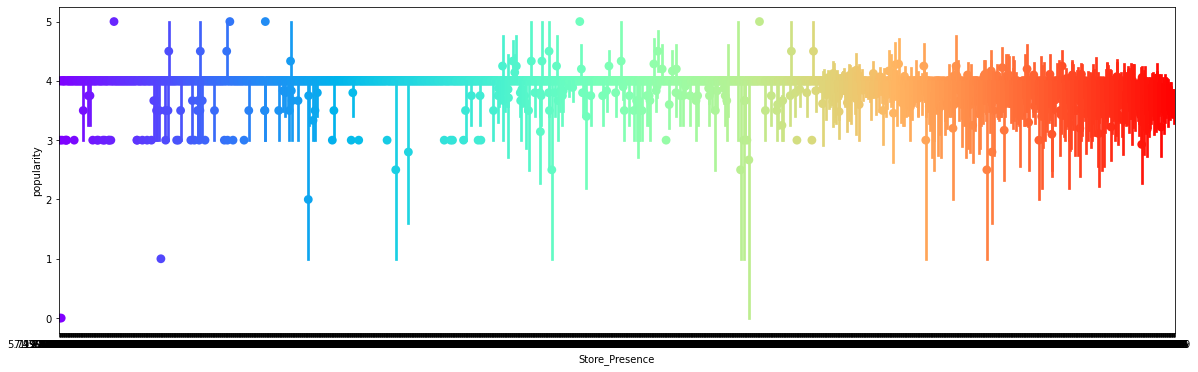

In [ ]:
# Perform point plot between Store presence and popularity


From above pointplot

Most of the points are between 3 to 4

Very few points above 4 and below 3

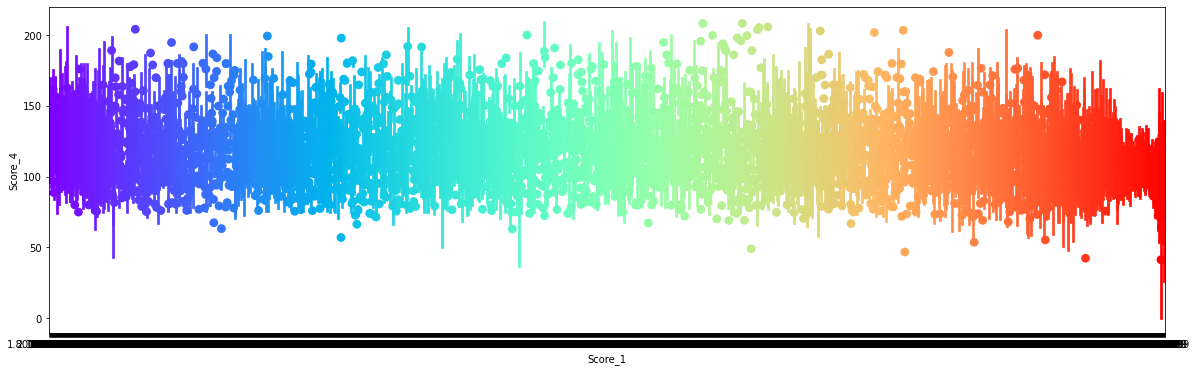

In [ ]:
# Perform point plot between Score 1 and score 4


From above pointplot

Most of the points are between 75 to 175
Very few points above 175 and below 75

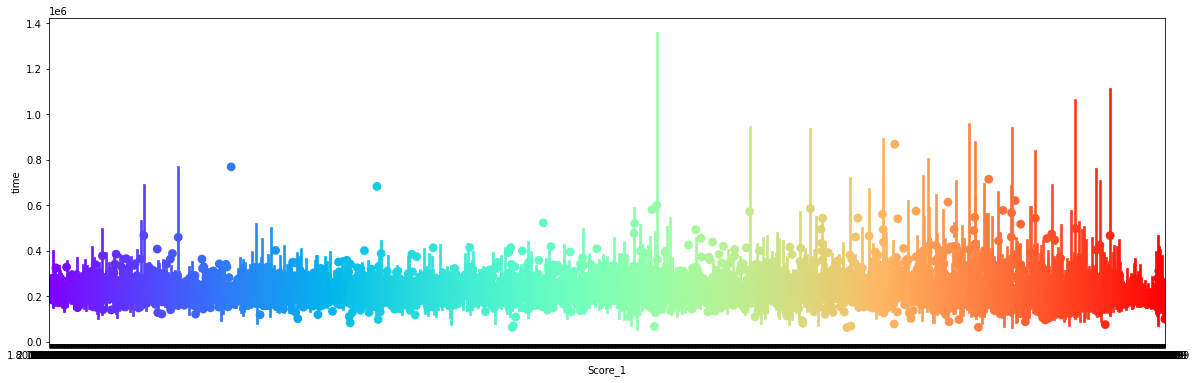

In [ ]:
# Perform point plot between Score 1 and time


From above pointplot

1. Most of the points are between 0.1 to 0.4
2. Very few points above 0.4

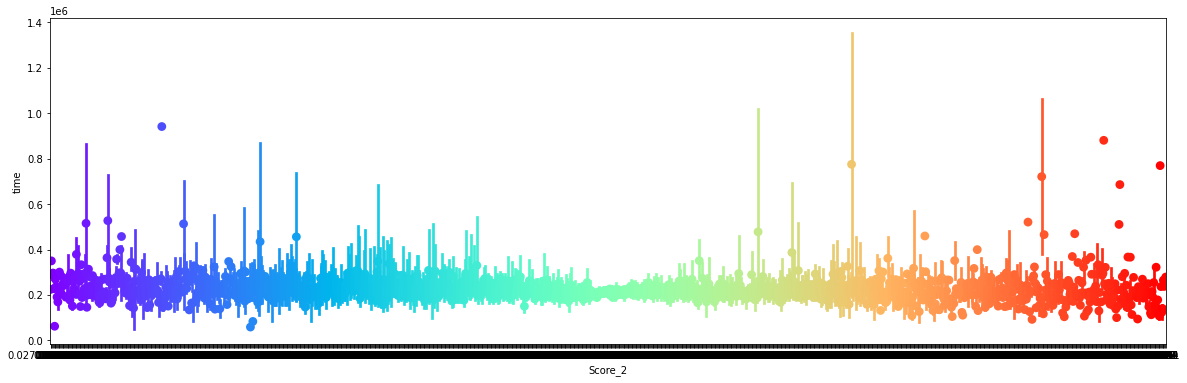

In [ ]:
# Perform point plot between Score 2 and time


From above pointplot

1. Most of the points are between 1 to 3

2. Very few points above 3

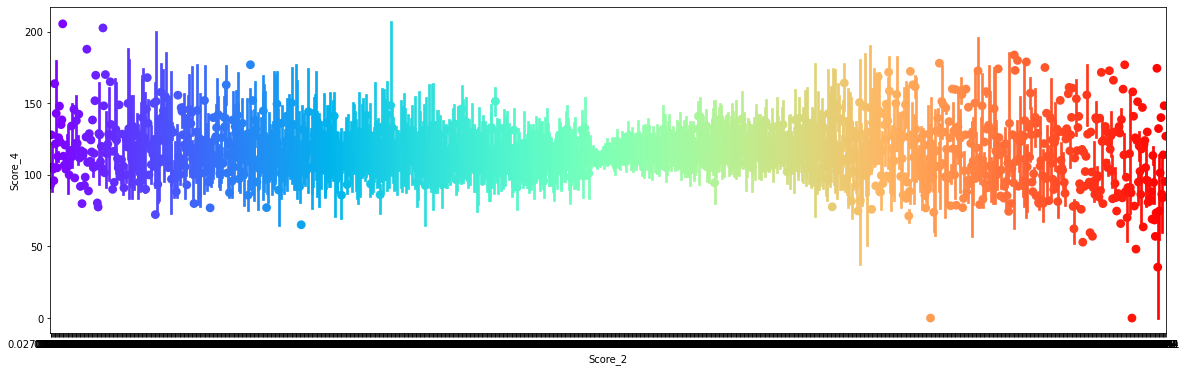

In [ ]:
# Perform point plot between Score 2 and Score 4


From above pointplot

Most of the points are between 75 to 150

Very few points above 150 and below 75

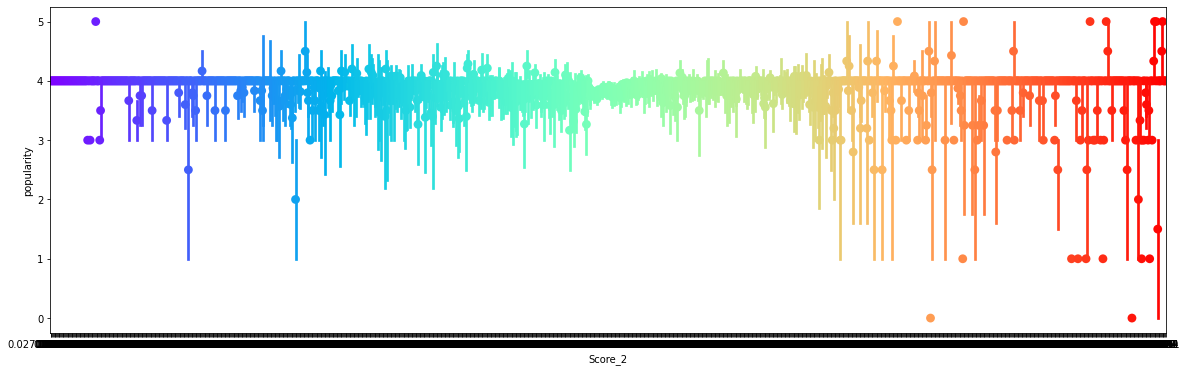

In [ ]:
# Perform point plot between Score 2 and popularity


From above pointplot

1. Most of the points are around 4
2. few points are between 3 and 4
3. very few are below 3

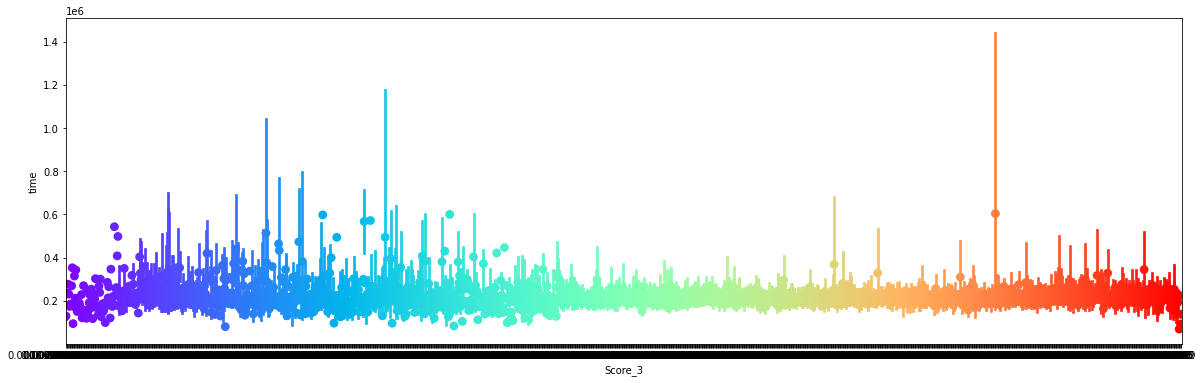

In [ ]:
# Perform point plot between Score 3 and time


From above pointplot

Most of the points are between o.0 to 0.4

Very few points above 0.4

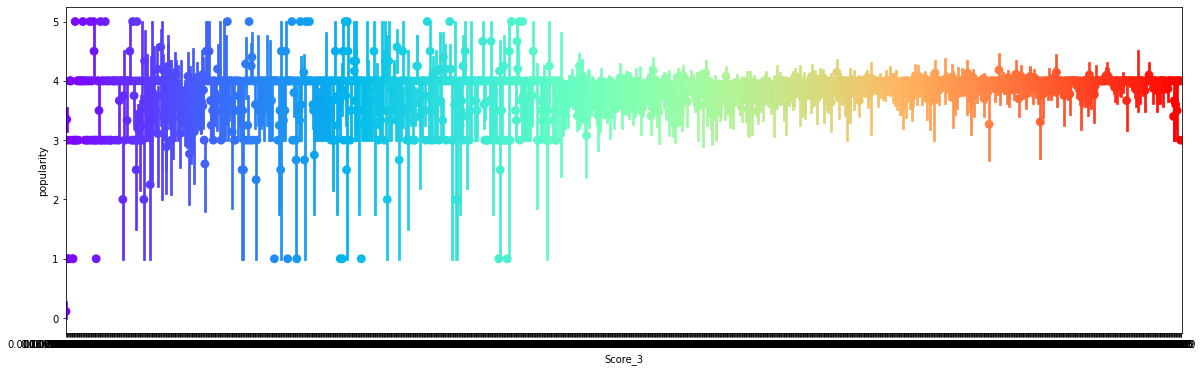

In [ ]:
# Perform point plot between Score 3 and popularity


From above pointplot

Most of the points are between 3 to 4

Very few points above 4 and below 3

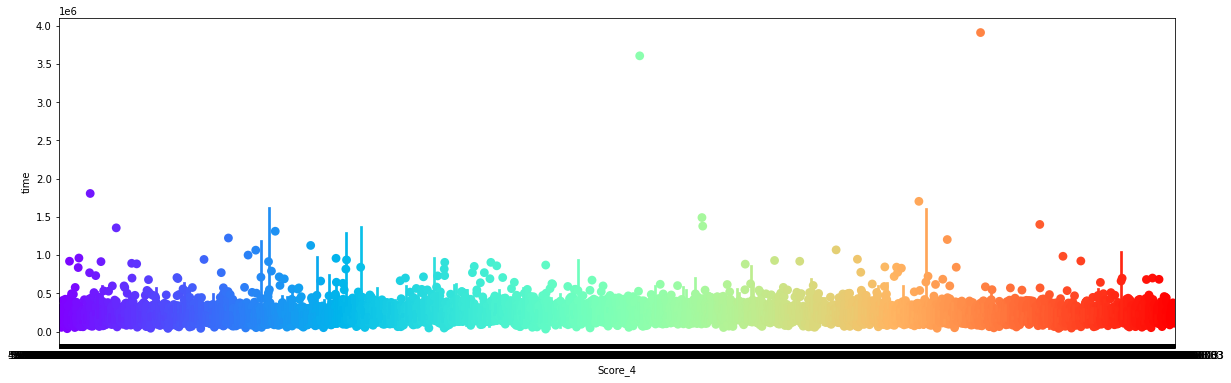

In [ ]:
# Perform point plot between Score 4 and time


From above pointplot

1. Most of the points are between o to 0.5
2. Very few points above 0.5

# DISTPLOT

The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution

Store_Ratio


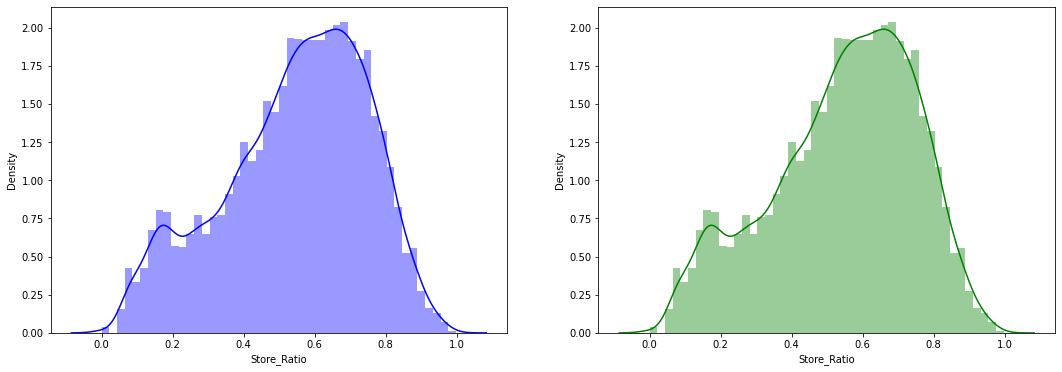

Basket_Ratio


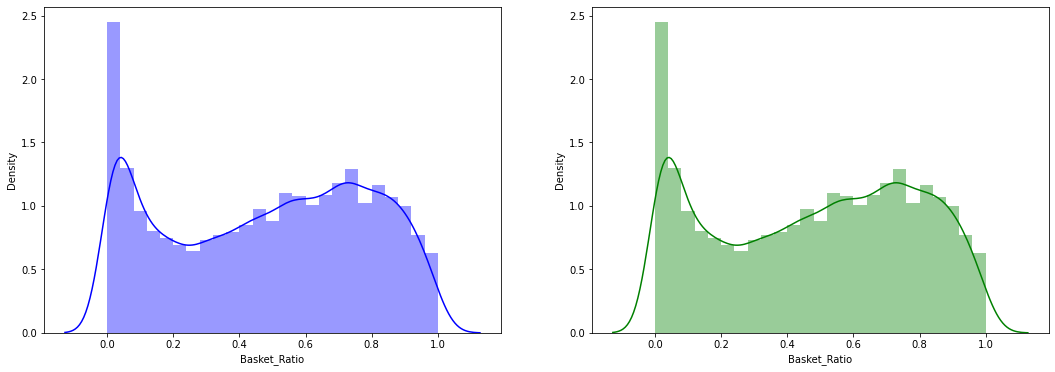

Category_1


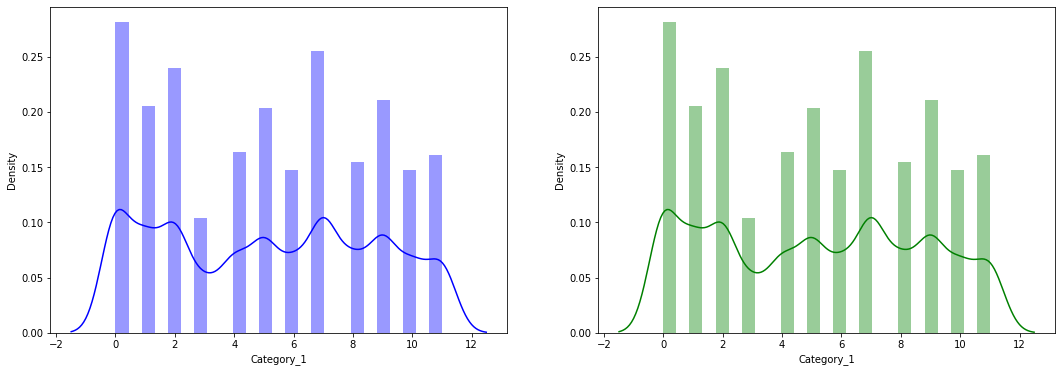

Store_Score


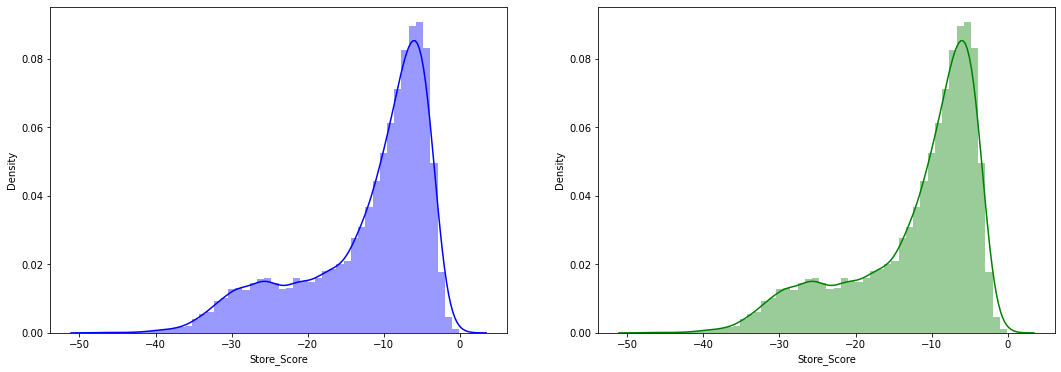

Category_2


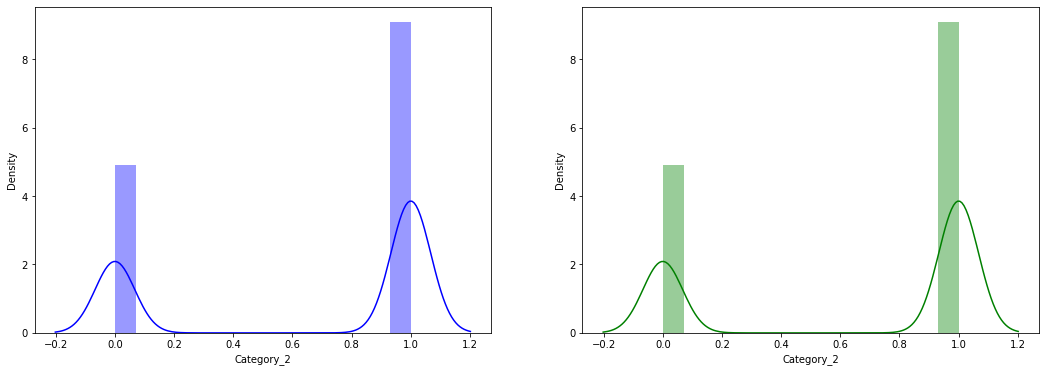

Store_Presence


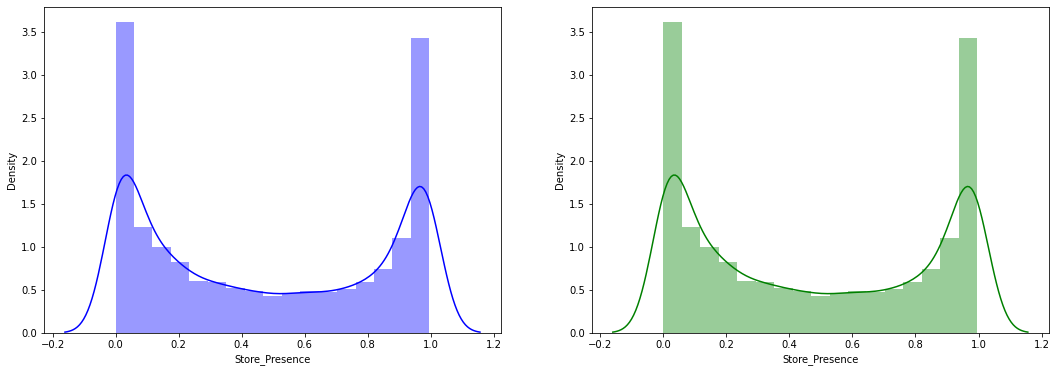

Score_1


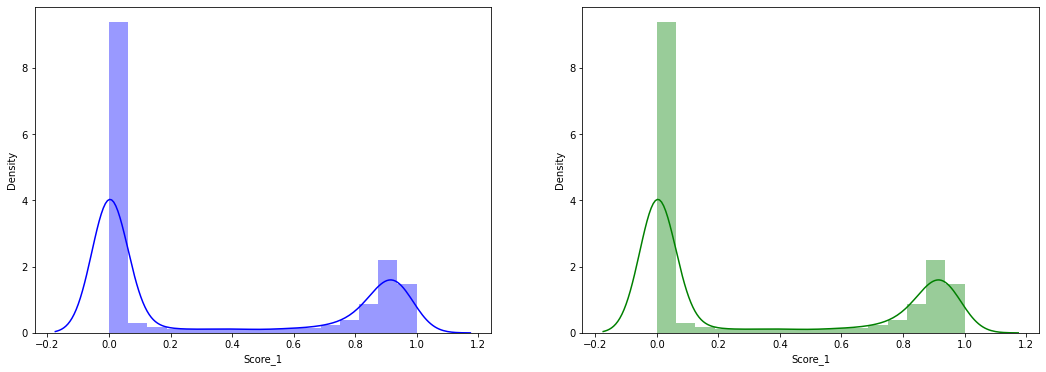

Score_2


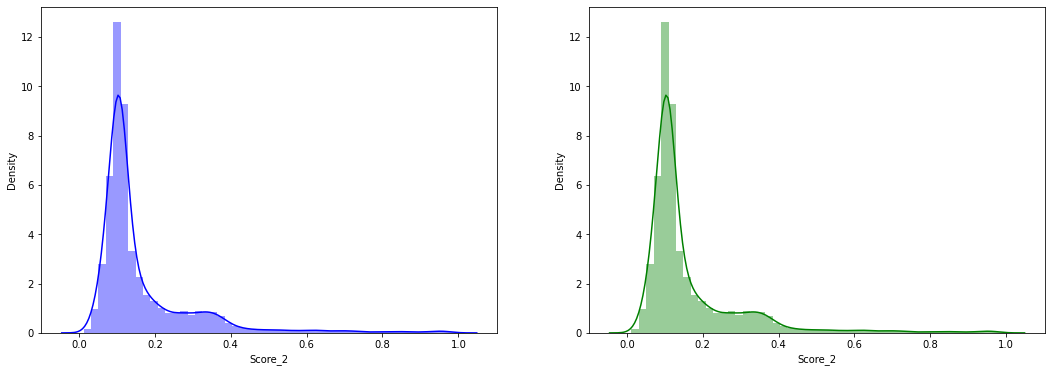

Score_3


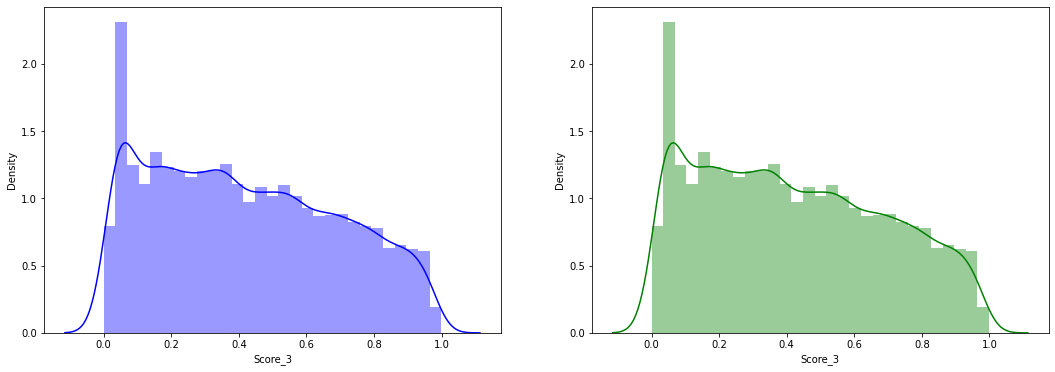

Score_4


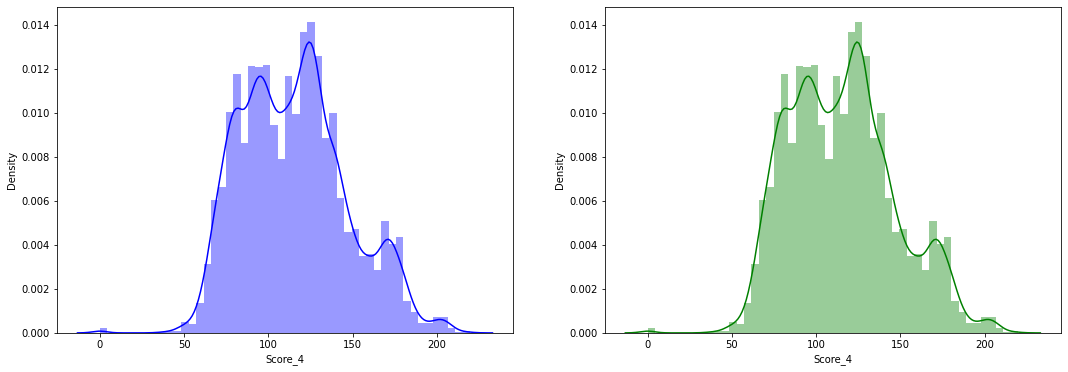

time


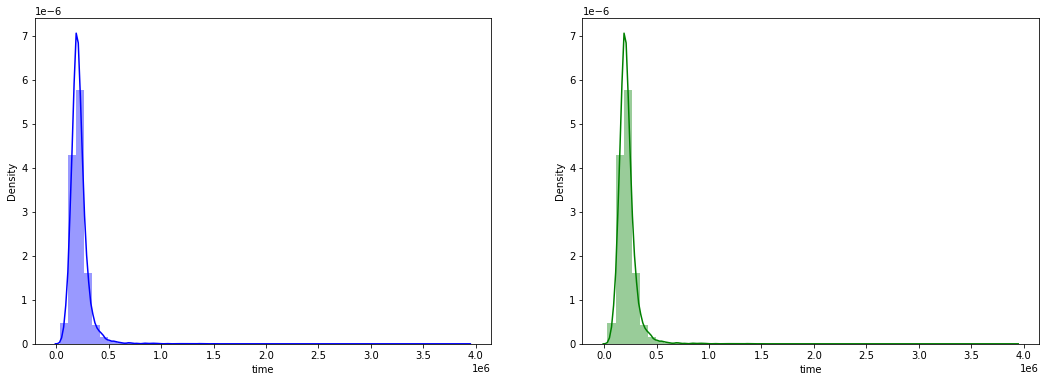

popularity


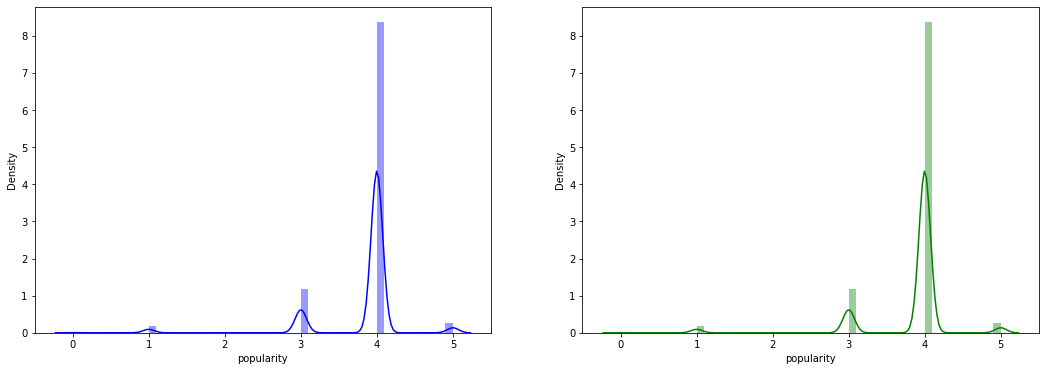

In [ ]:
#Perform distplot for all the columns in dataset


OBSERVATIONS
1. distribution of store ratio, store presence, score3 and popularity are right skewed
2. distribution of basket ratio, score2 and time are skewed left
3. distribution of category 1 is multimodal
4. distribution of category2 and score1 are bimodal

# dendrogram

The dendrogram is a visual representation of the compound correlation data. The individual compounds are arranged along the bottom of the dendrogram and referred to as leaf nodes. Compound clusters are formed by joining individual compounds or existing compound clusters with the join point referred to as a node.

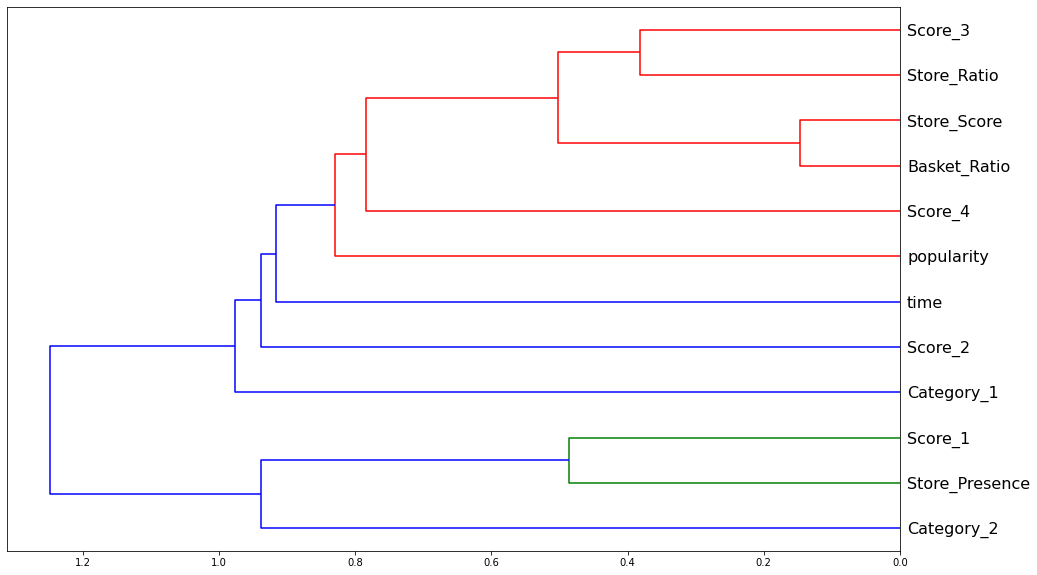

In [ ]:
# Plot a Dendrogram on the columns of the dataset

# droping the NaN values


strongly correlated variables
1. score3 and store ratio
2. store score and basket ratio
3. score1 and store presence

# Boxen plot

The boxen plot, otherwise known as a Letter-value plot, is a box plot meant for large data sets (n > 10,000).

The Boxen plot is very similar to box plot, except for the fact that it plots different quartile values.

By plotting different quartile values, we are able to understand the shape of the distribution particularly in the head end and tail end.

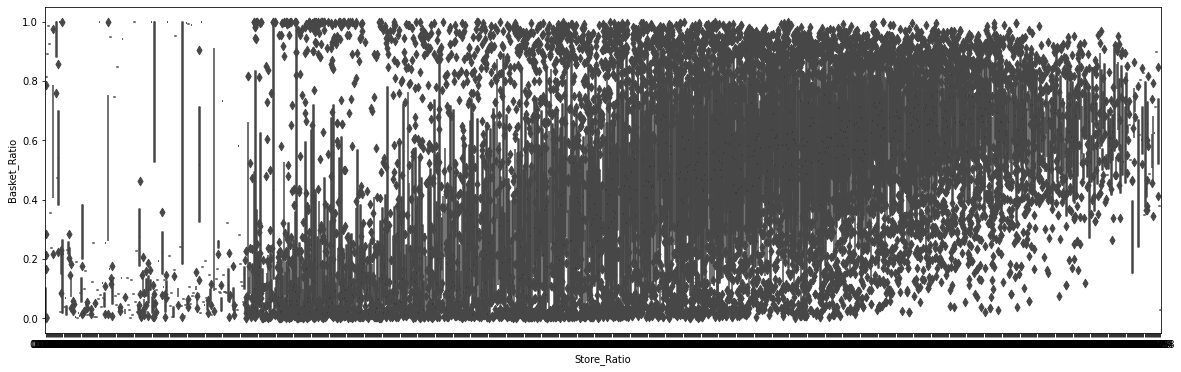

In [ ]:
#Perform boxen plot between Store ratio and Basket ratio 


there is positive correlation betwwen store ratio and basket ratio.

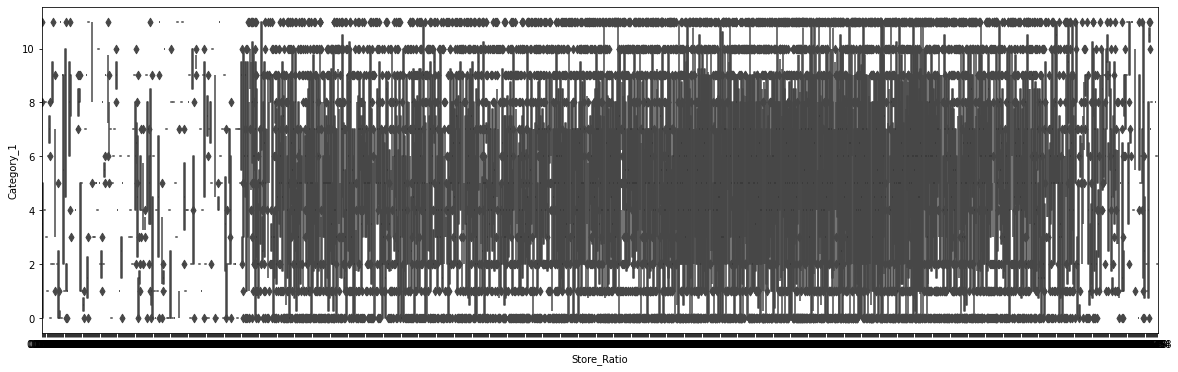

In [ ]:
#Perform boxen plot between Store ratio and Category 1  


there is no relation between store ratio and category 1

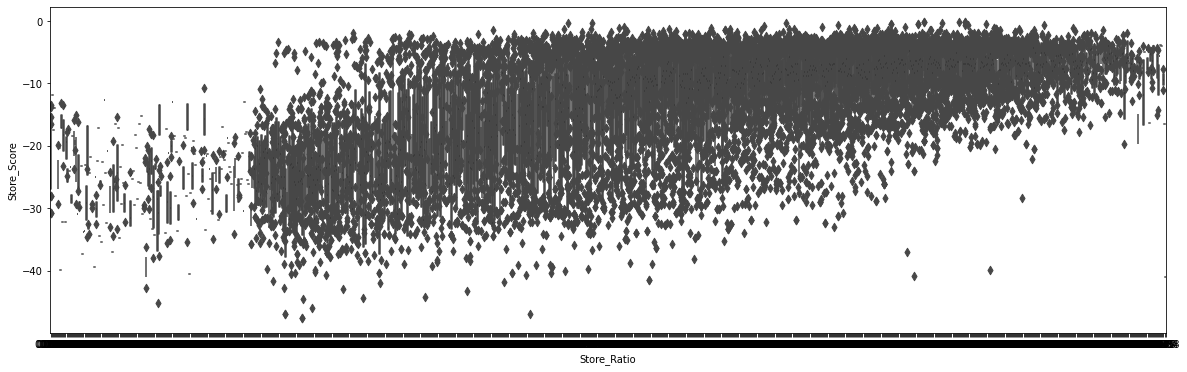

In [ ]:
#Perform boxen plot between Store ratio and Store Score


there is positive correlation between store ratio and store score.

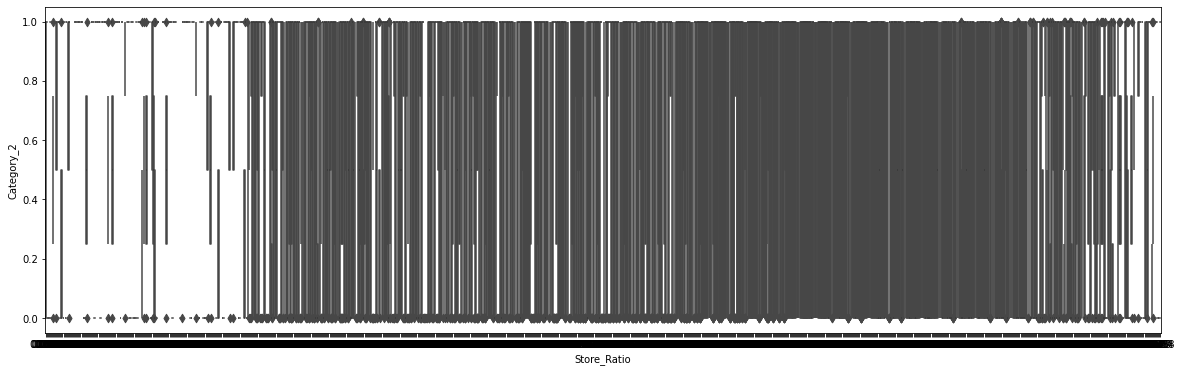

In [ ]:
#Perform boxen plot between Store ratio and Category 2


there is weak correlation between store ratio and category 2

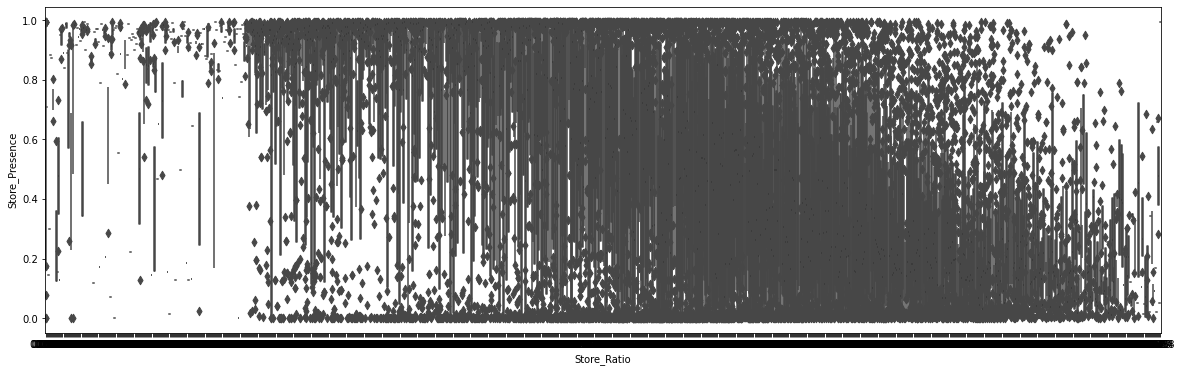

In [ ]:
#Perform boxen plot between Store ratio and Store presence


there is strong negative correlation between store presence and store ratio

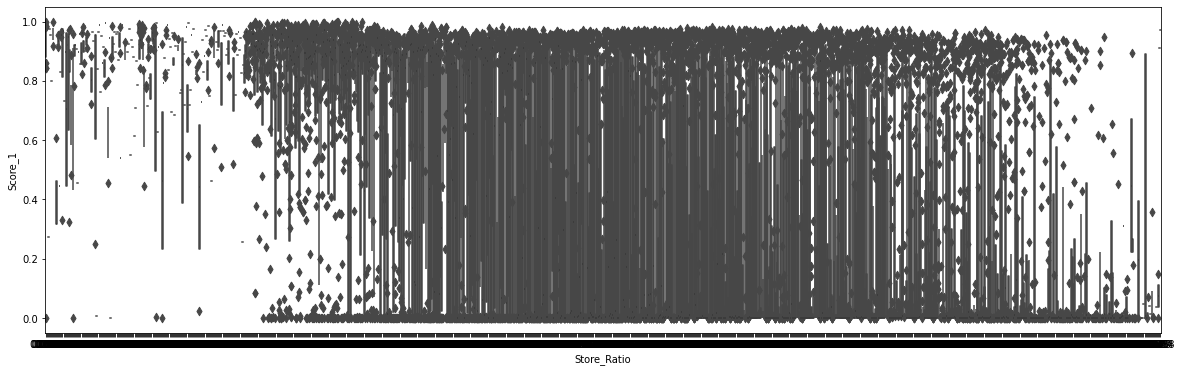

In [ ]:
#Perform boxen plot between Store ratio and Score 1  


there is weak correlation between store ratio and score1

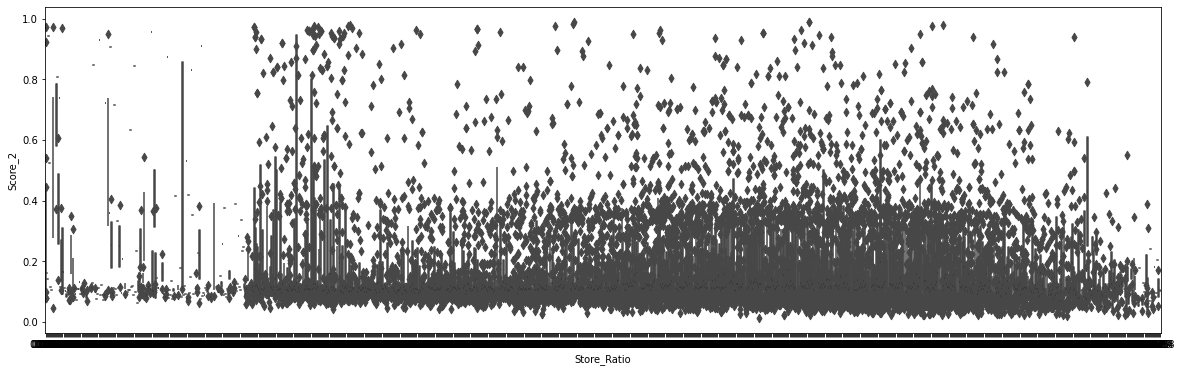

In [ ]:
#Perform boxen plot between Store ratio and Score 2


there is no relation between store ratio and score 2

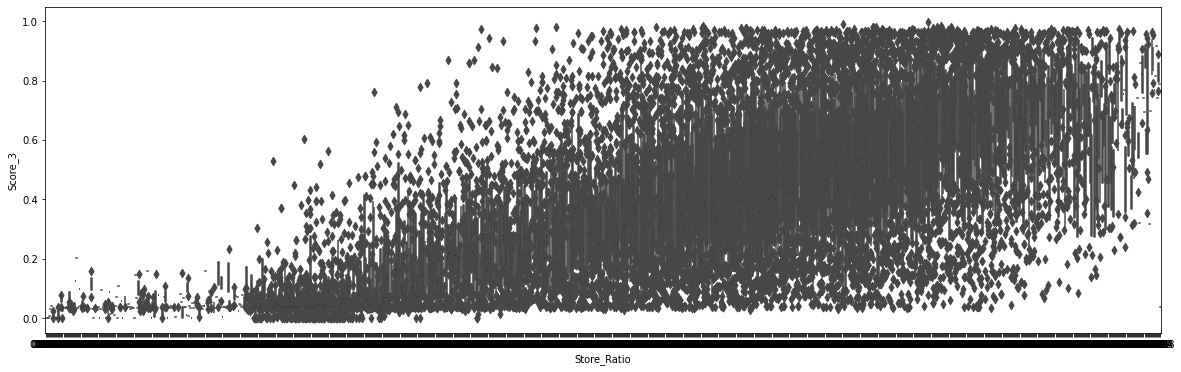

In [ ]:
#Perform boxen plot between Store ratio and Score 3


there is positive correlation with store ratio and score 3

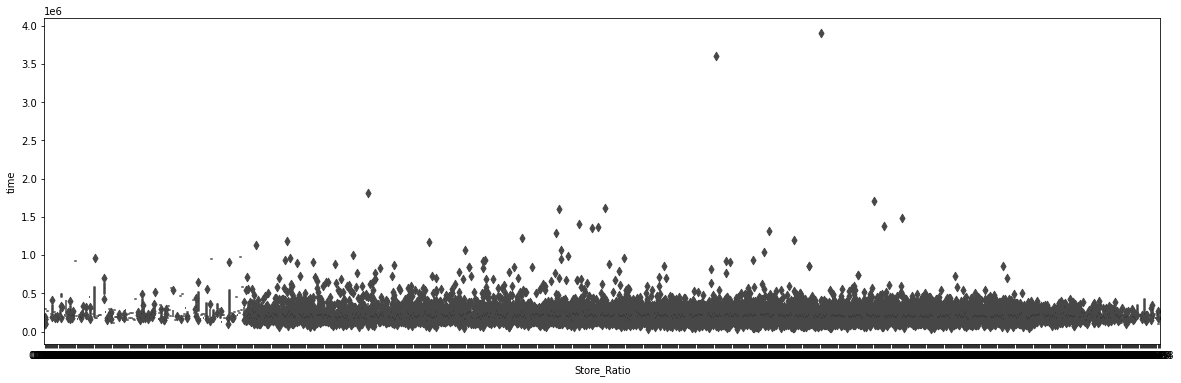

In [ ]:
#Perform boxen plot between Store ratio and time


there is no relation between store ratio and time

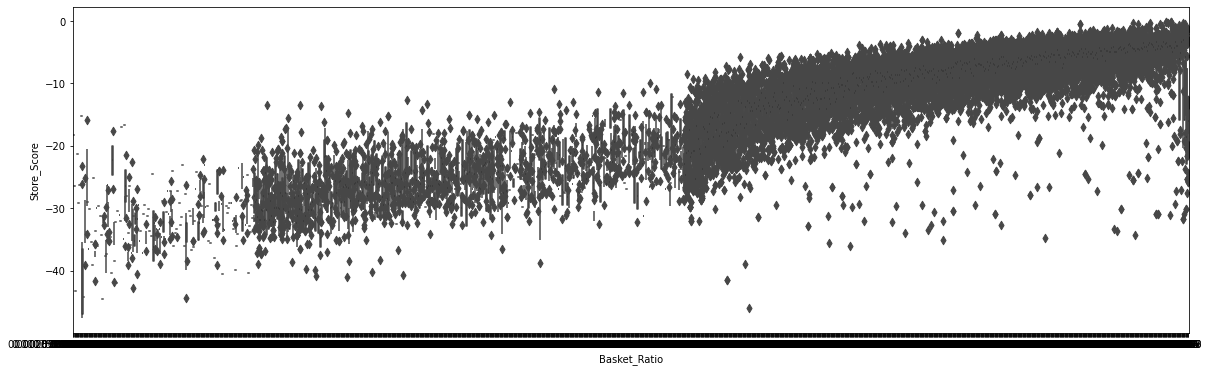

In [ ]:
#Perform boxen plot between Basket Ratio and Score Score


there is a positive correlation between store score and basket ratio

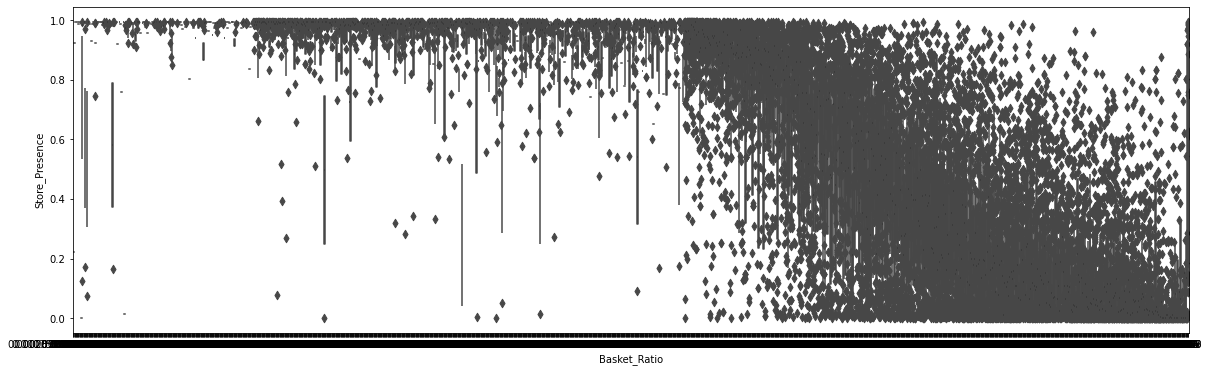

In [ ]:
#Perform boxen plot between Basket Ratio and Store presence 


after a certain point as the value ok basket ratio is increasing value of store presence is decreasing

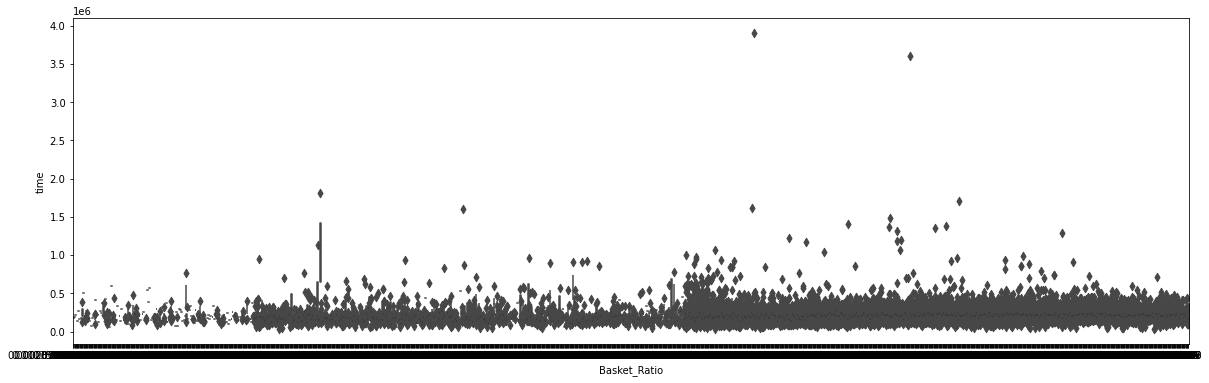

In [ ]:
#Perform boxen plot between Basket ratio and time


there is no relation between time and basker ratio

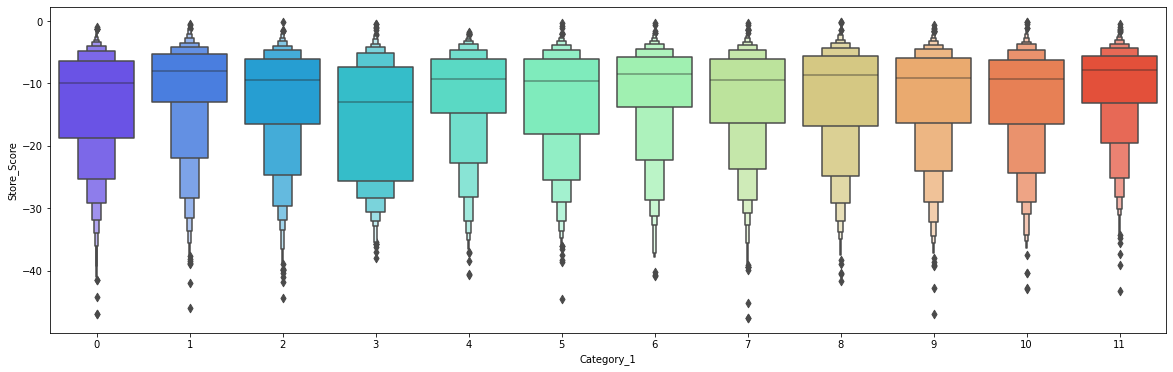

In [ ]:
#Perform boxen plot between Category 1 and Store score



there is no relation between between store score and category1

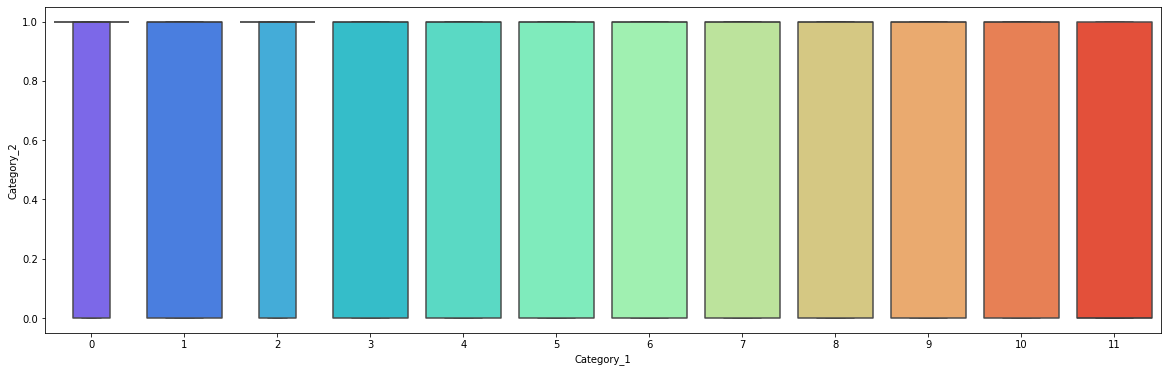

In [ ]:
#Perform boxen plot between Category 1 and Category 2


there is weak relation between category1 and category2

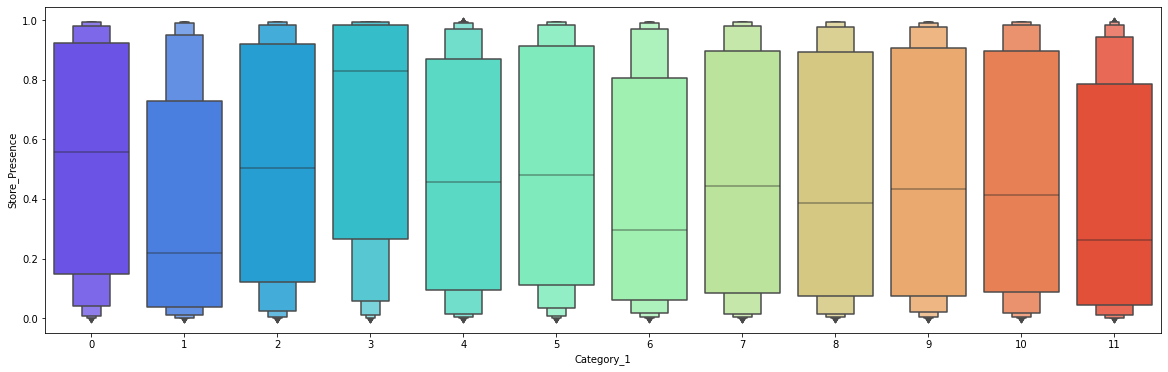

In [ ]:
#Perform boxen plot between Category 1 and Store presence


there is weak relation between category1 and store presence

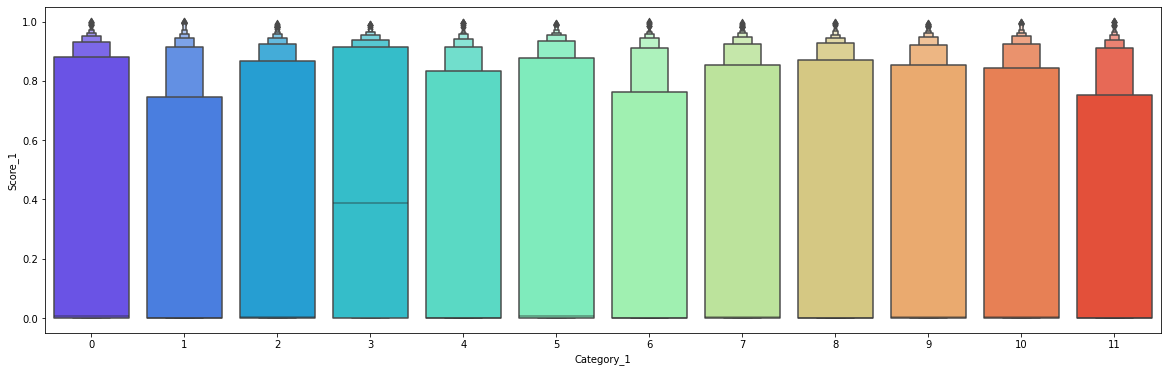

In [ ]:
#Perform boxen plot between Category 1 and Score 1


there is weak relation between category1 and score1

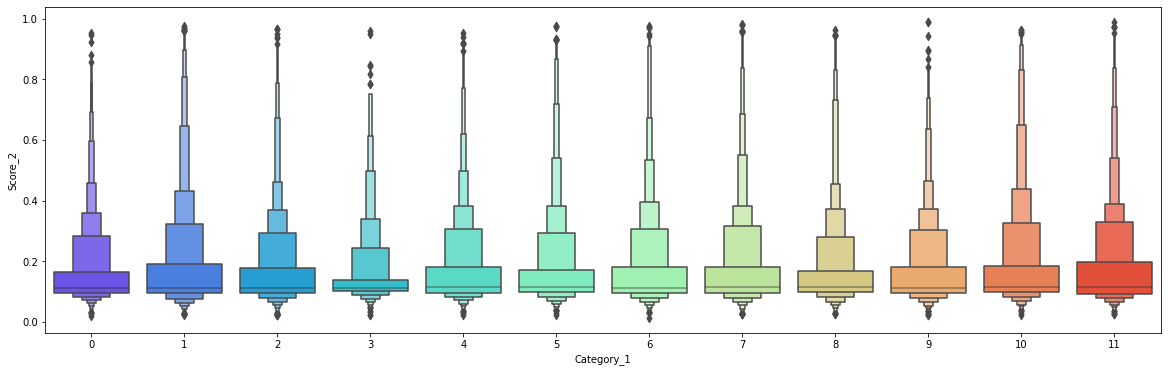

In [ ]:
#Perform boxen plot between Category 1 and Score 2


there is no relation between category1 and score2

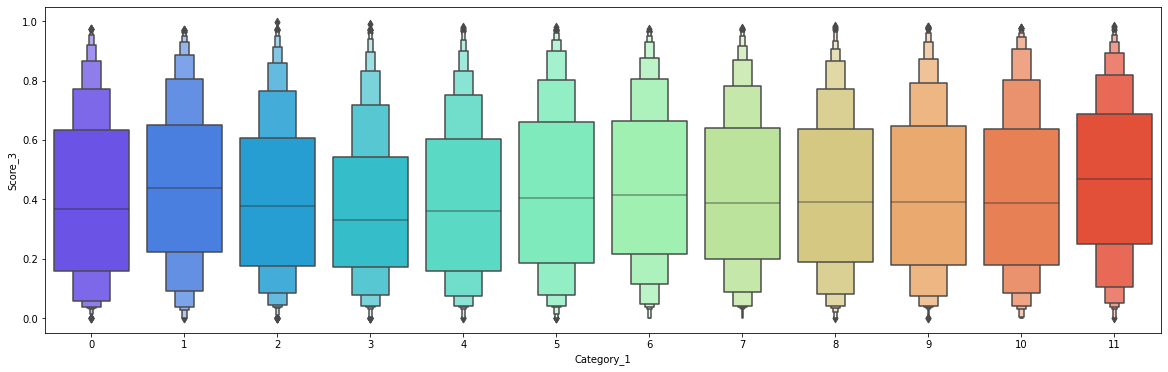

In [ ]:
#Perform boxen plot between Category 1 and Score 3


from above boxen plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical.

there is no relation between category1 and score3

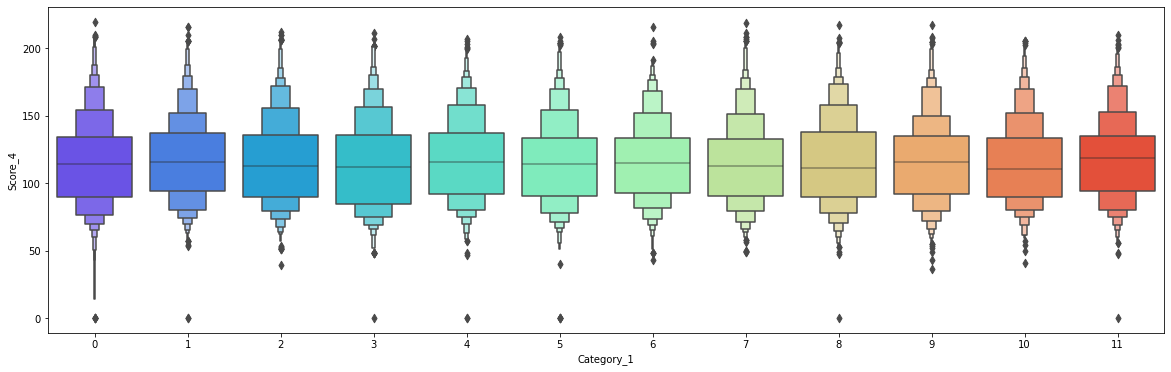

In [ ]:
#Perform boxen plot between Category 1 and Score 4


from above boxen plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical.

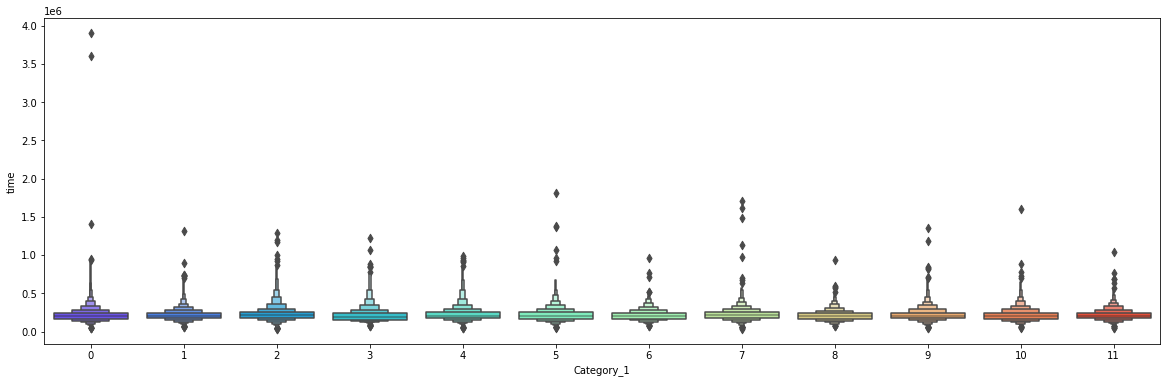

In [ ]:
#Perform boxen plot between Category 1 and time


from above boxen plot:

There is no relation between time and category1

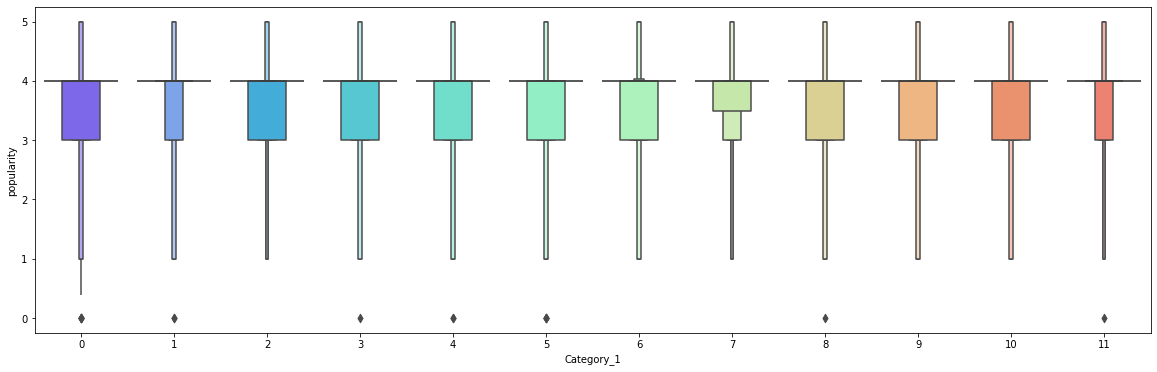

In [ ]:
#Perform boxen plot between Category 1 and popularity


there is no relation between category1 and popularity

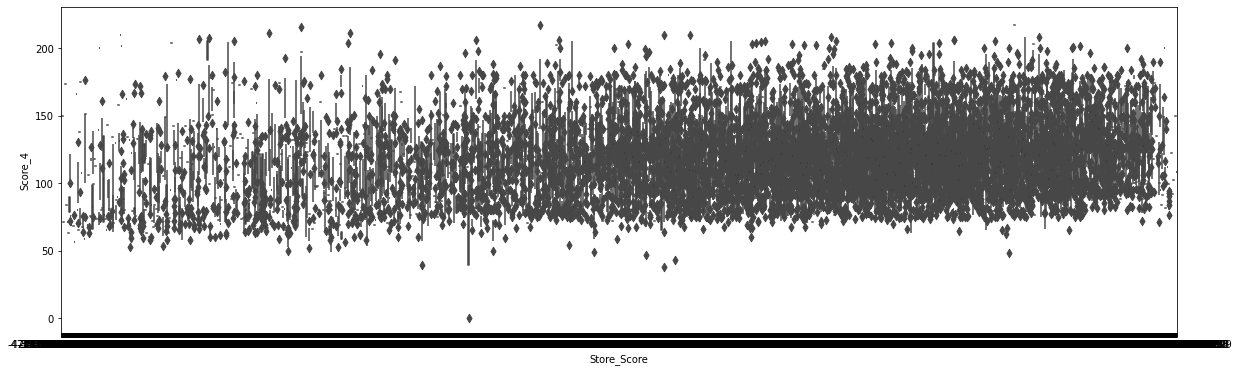

In [ ]:
#Perform boxen plot between Store score and Score 4 


there is weak relation between store score and score2

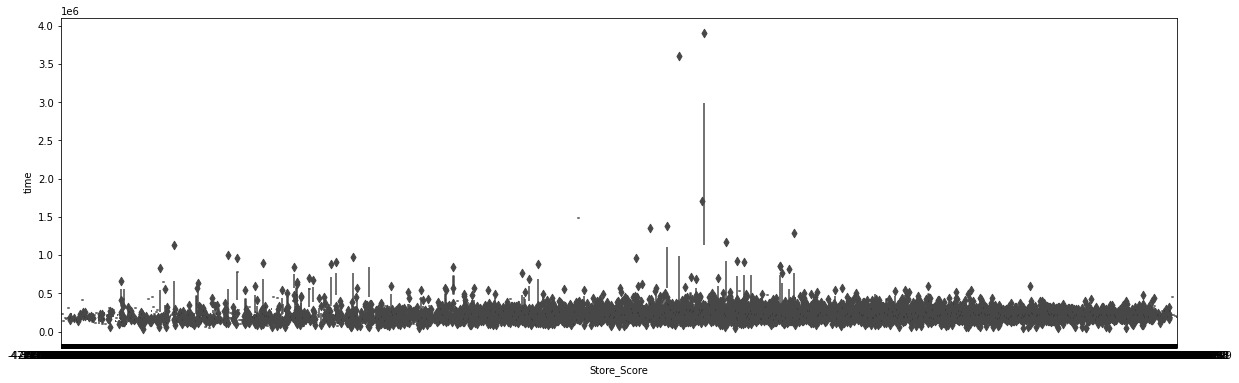

In [ ]:
#Perform boxen plot between Store score and time


there is no relation between time and store score

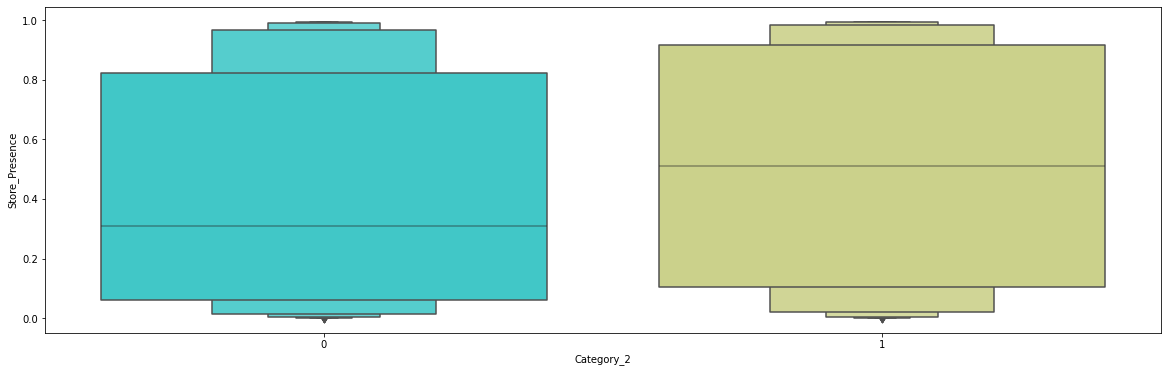

In [ ]:
#Perform boxen plot between Store presence and category2


there is no relation between store presence and category2

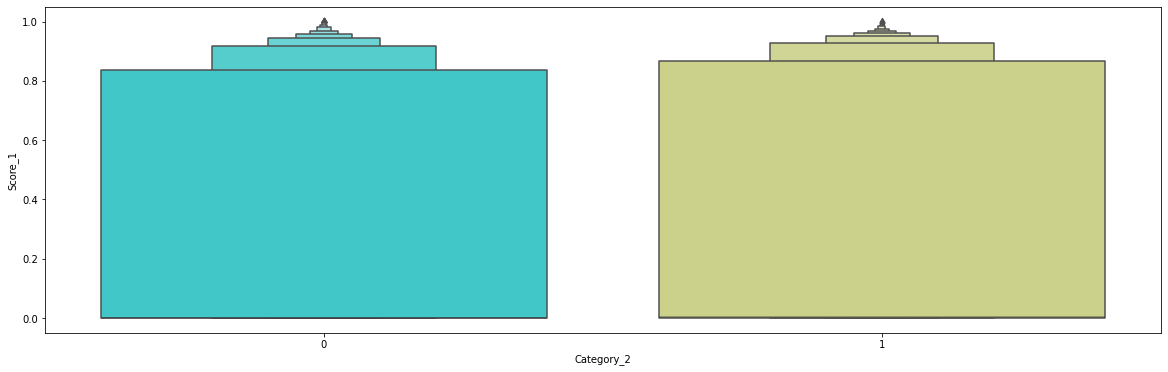

In [ ]:
#Perform boxen plot between score1  and categort2


there is no relation between score1 and category2

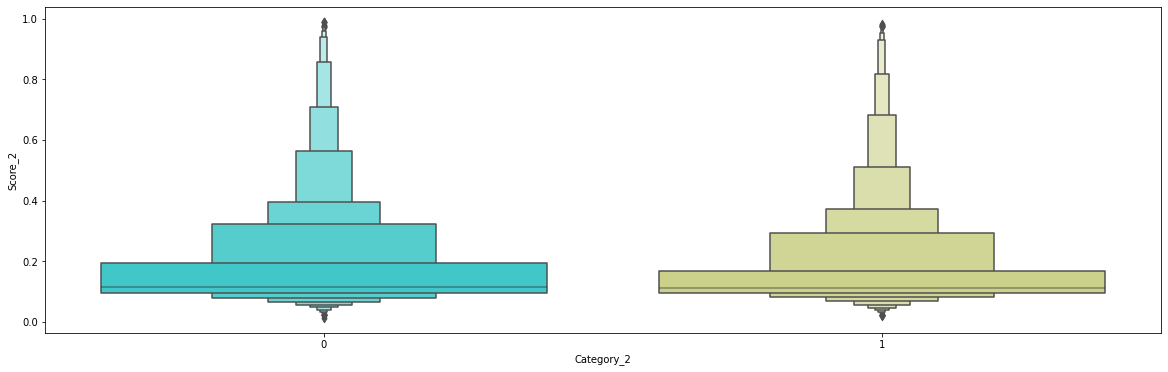

In [ ]:
#Perform boxen plot between category2  and score2


there is no relation between score2 and category2

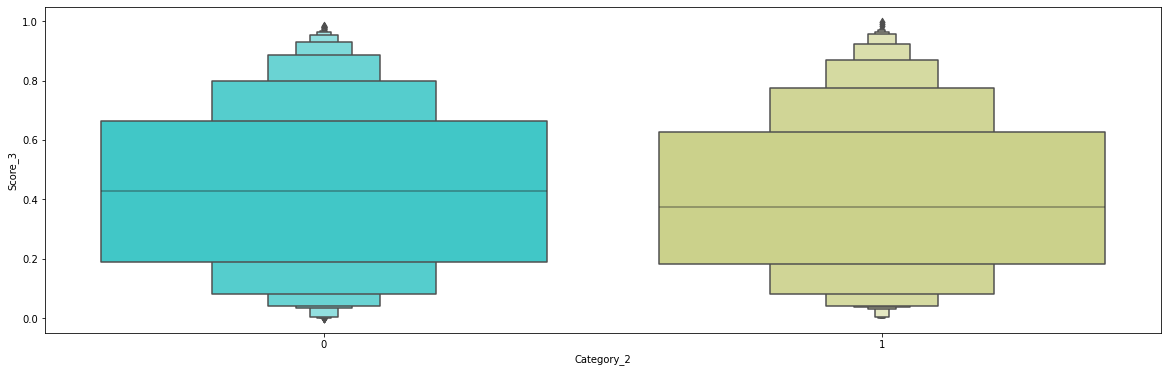

In [ ]:
#Perform boxen plot between category2  and score3


there is no relation between score3 and category2

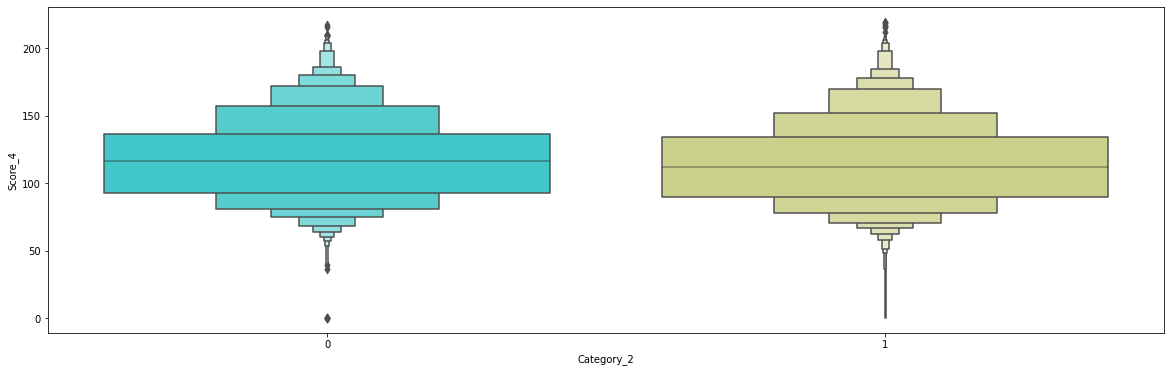

In [ ]:
#Perform boxen plot between category2  and score4


there is no relation between score4 and category2

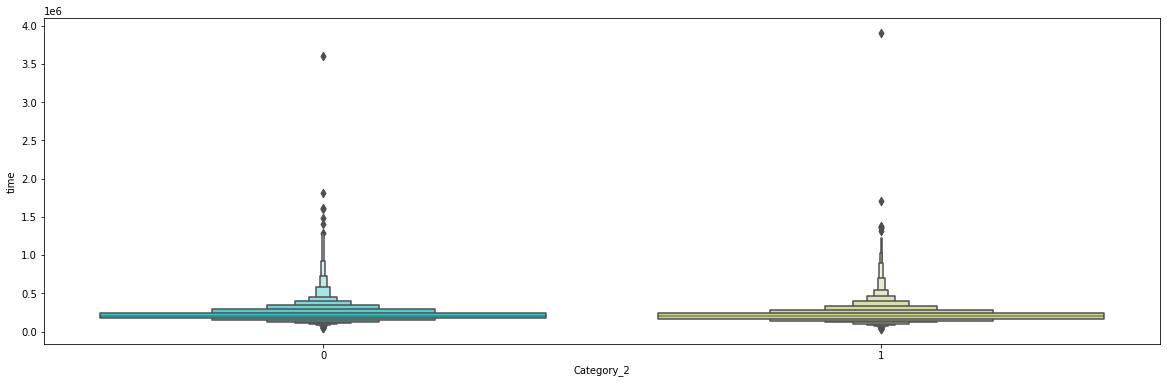

In [ ]:
#Perform boxen plot between category2  and time


there is no relation between time and category2

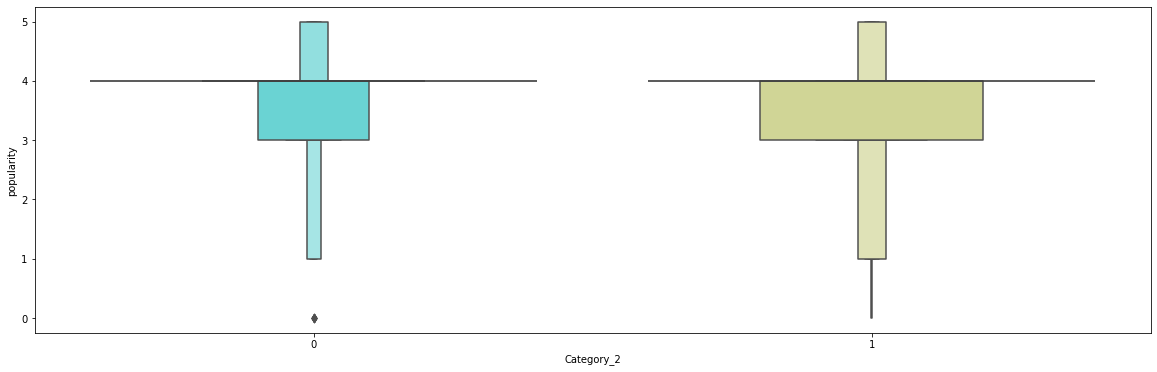

In [ ]:
#Perform boxen plot between category2  and popularity


there is no relation between popularity and category2

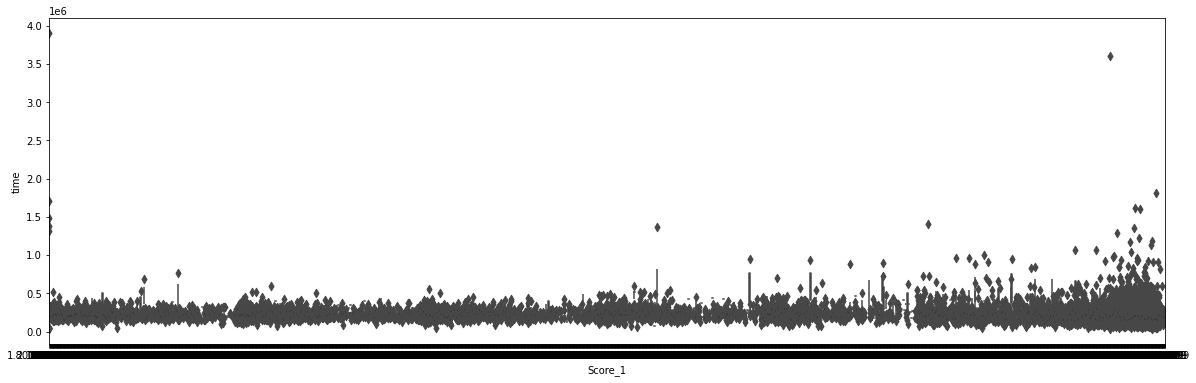

In [ ]:
#Perform boxen plot between time  and score1


there is no relation between score1 and time

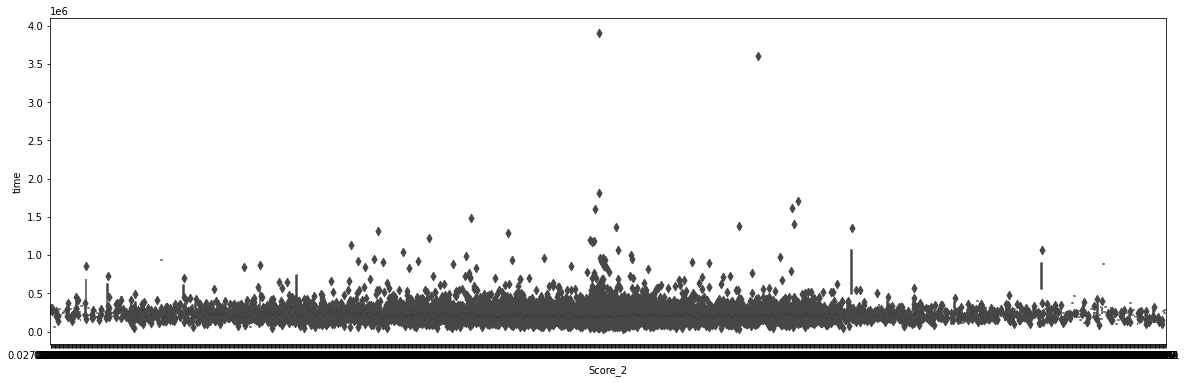

In [ ]:
#Perform boxen plot between time  and score2


there is no relation between score2 and time

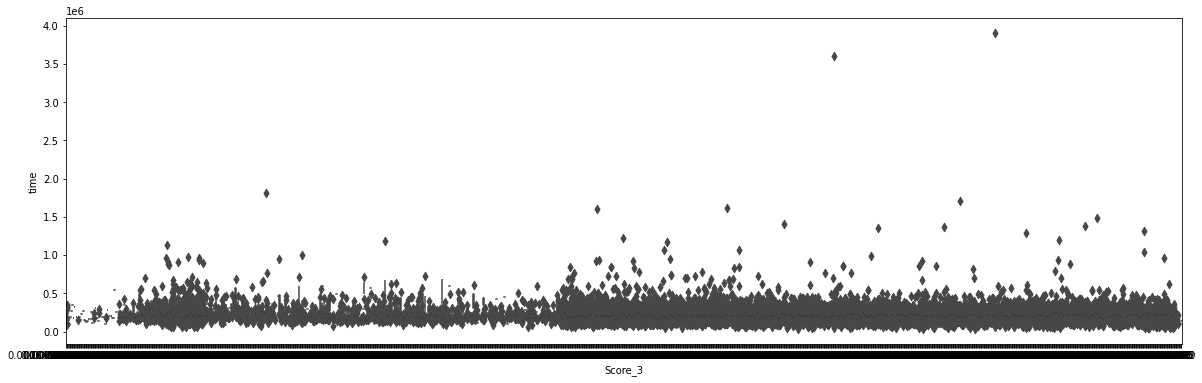

In [ ]:
#Perform boxen plot between time  and score3


there is no relation between score3 and time

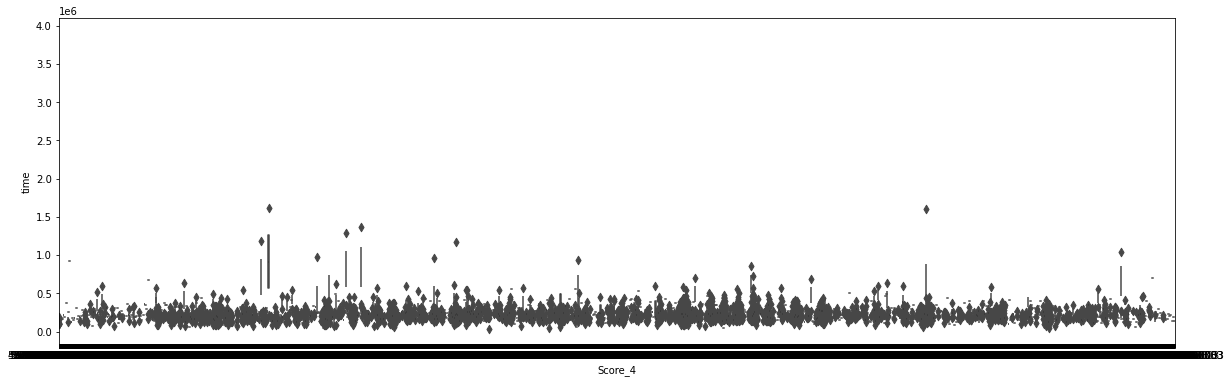

In [ ]:
#Perform boxen plot between time  and score4


there is no relation between score4 and time

# Voilin Plot


1. A violin plot is a method of plotting numeric data.

1. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

3. It has:

    1. Median (a white dot on the violin plot)
    2. Interquartile range (the black bar in the center of violin)
    3. The lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively.

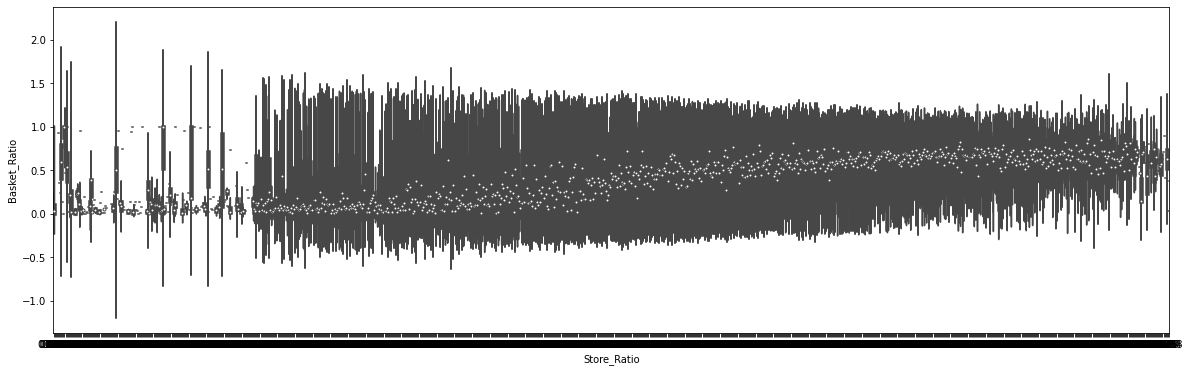

In [ ]:
# perform a violin plot between store ratio and basket ratio


there is a positive correlation between basket ratio and store ratio

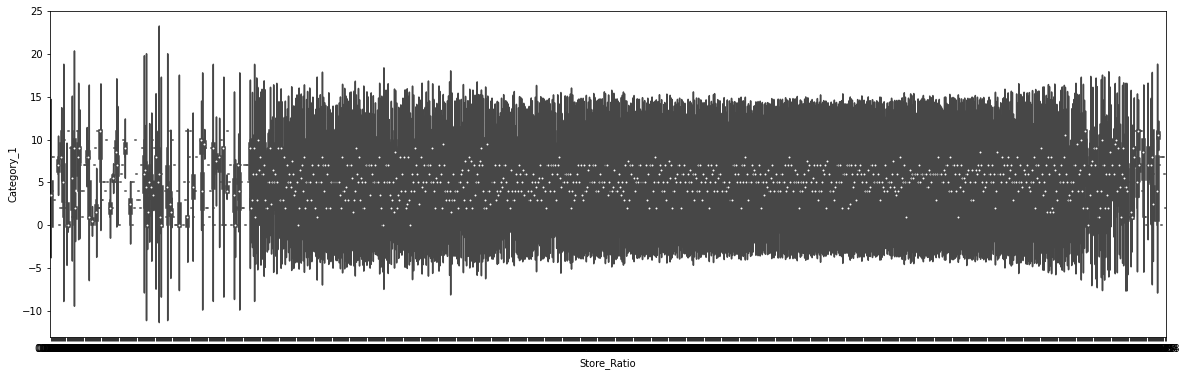

In [ ]:
# perform a violin plot between store ratio and category1


there is a weak relation between store ratio and category1

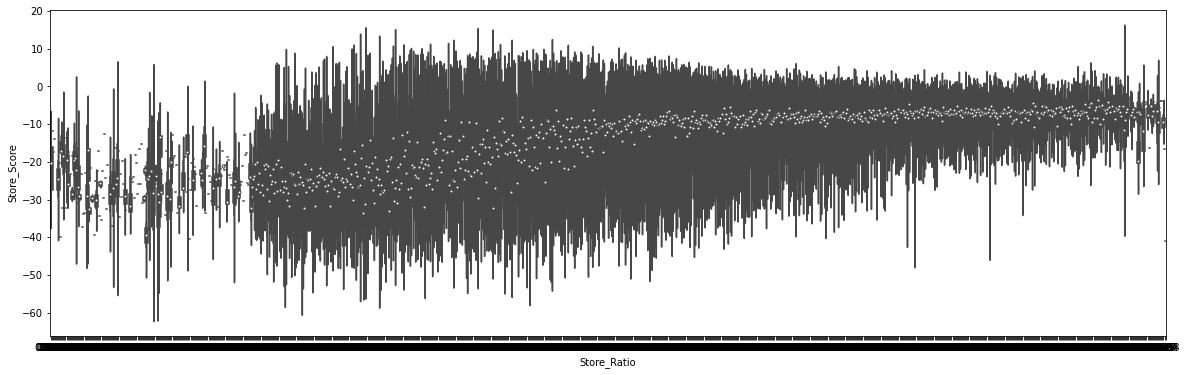

In [ ]:
# perform a violin plot between store ratio and store presence



store score and store ratio are correlated to each other

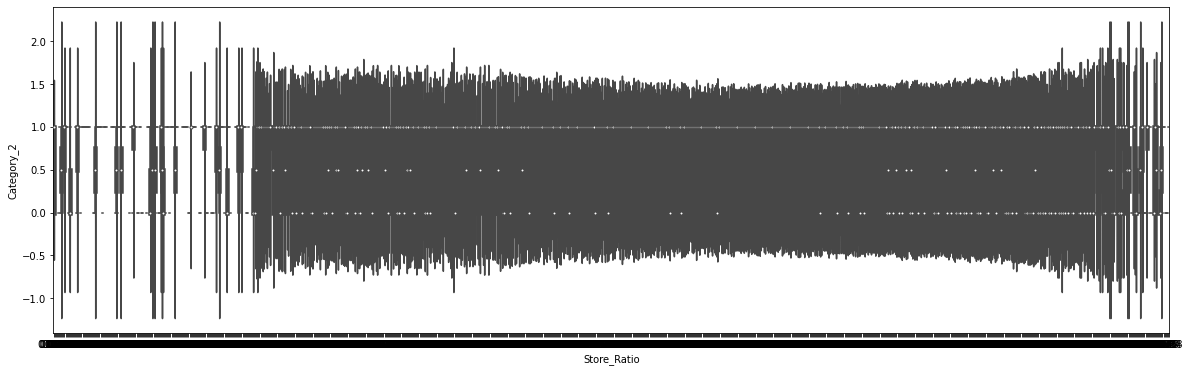

In [ ]:
# perform a violin plot between store ratio and category2



there is a week correlation between store ratio and category2

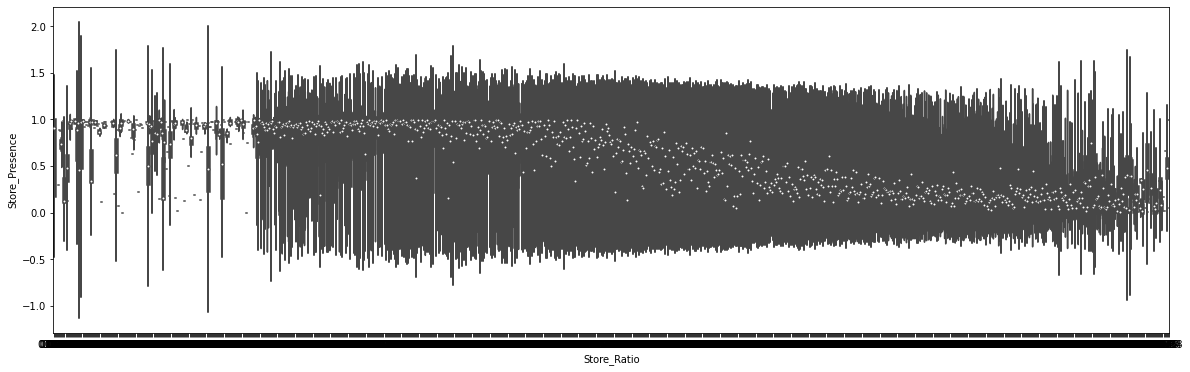

In [ ]:
# perform a violin plot between store ratio and store presence



there is strong negative correlation between store ratio and store presence

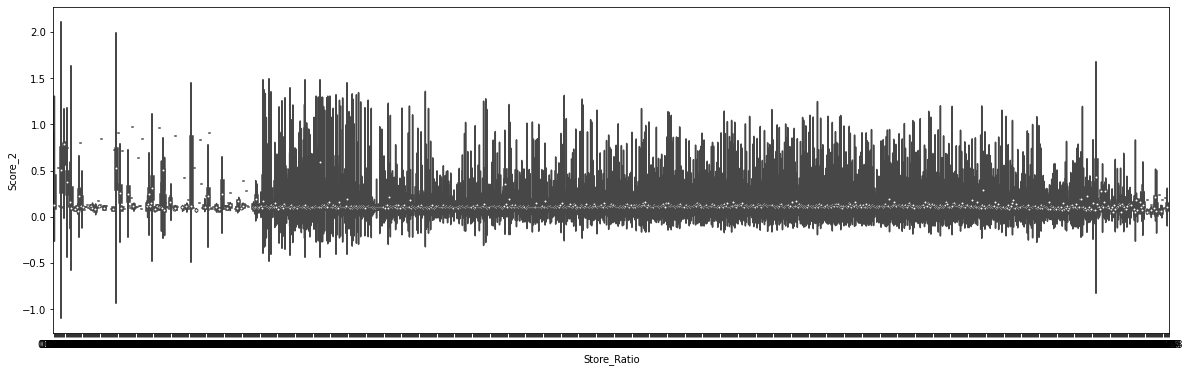

In [ ]:
# perform a violin plot between store ratio and score2



there is no relation between score2 and store ratio

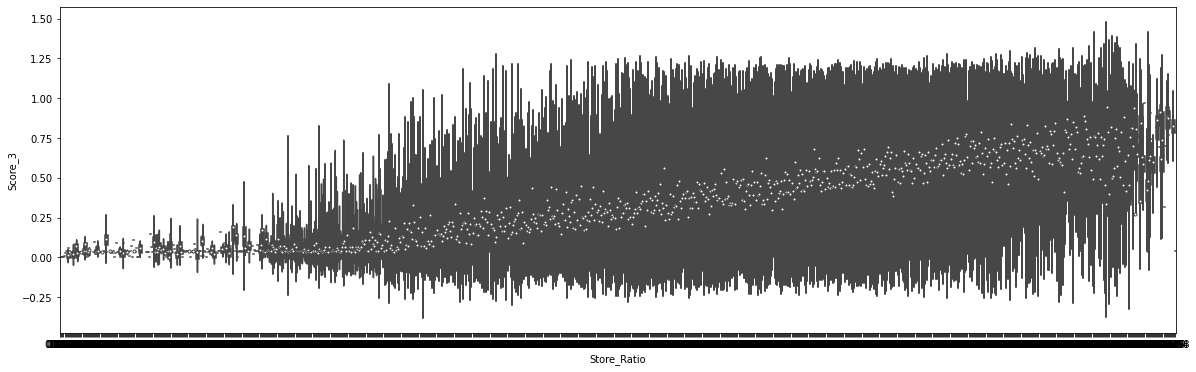

In [ ]:
# perform a violin plot between store ratio and score3



there is positive correlation between store ratio and score3

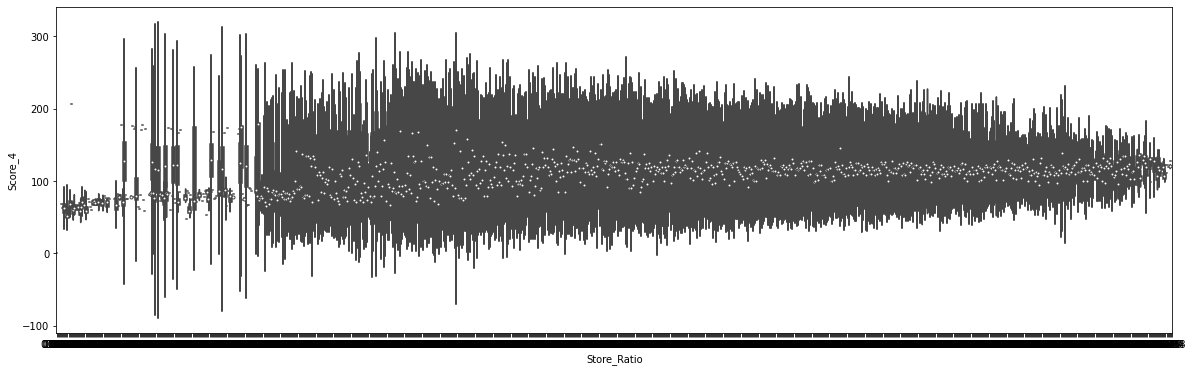

In [ ]:
# perform a violin plot between store ratio and score4

there is no relation between score4 and store ratio

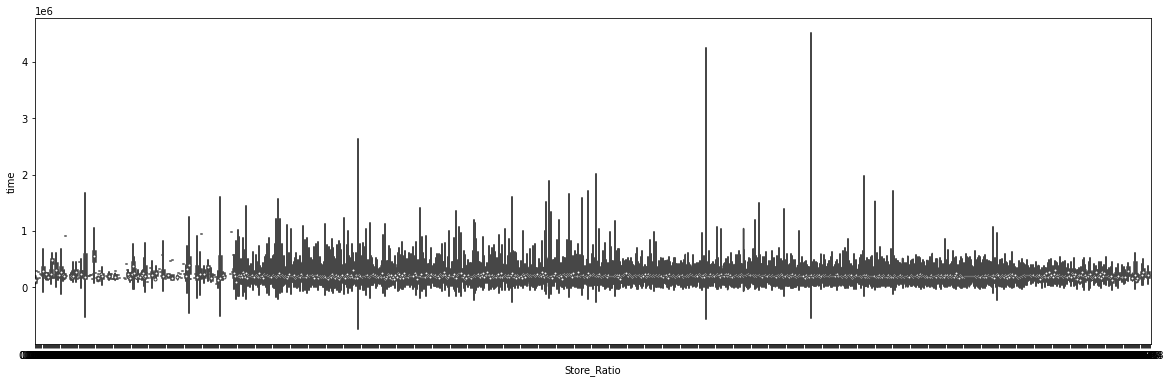

In [ ]:
# perform a violin plot between store ratio and time

there is no relation between time and store ratio

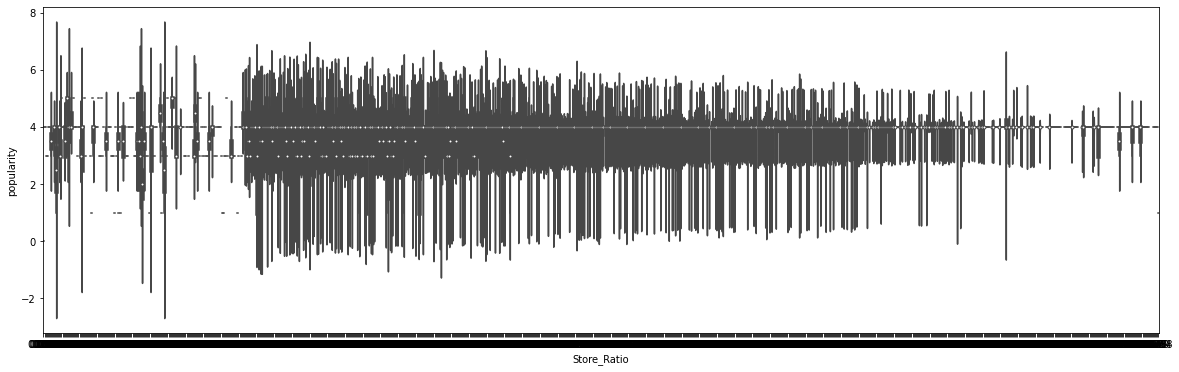

In [ ]:
# perform a violin plot between store ratio and popularuty



there is weak relation between popularity and store ratio

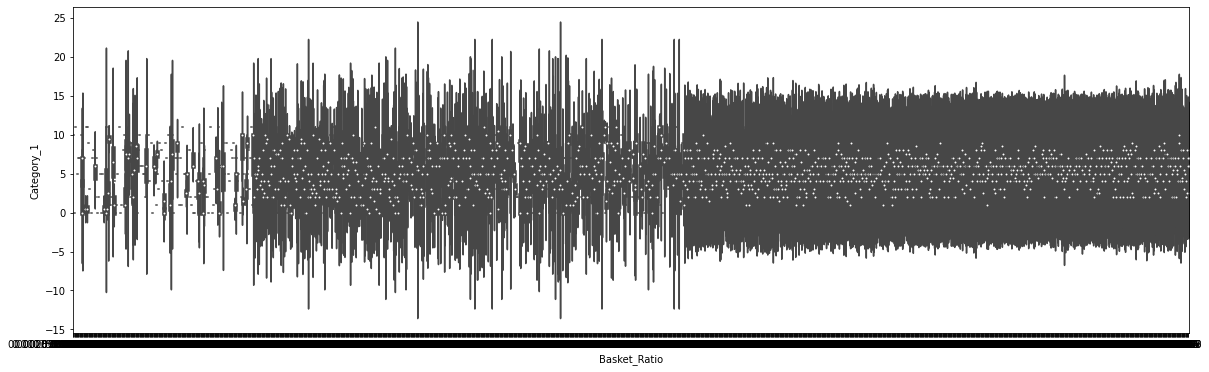

In [ ]:
# perform a violin plot between basket ratio and category1

there is no relation between category1 and basket ratio

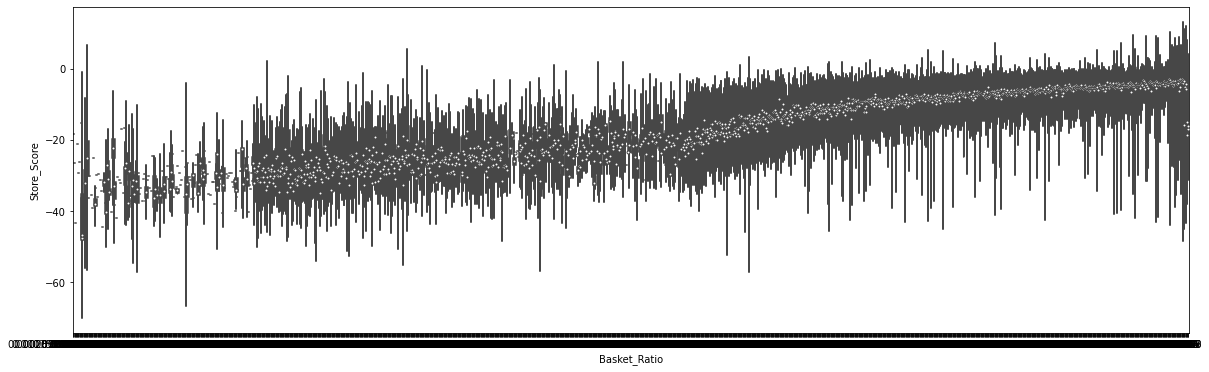

In [ ]:
# perform a violin plot between basket ratio and store score



there is positive correlation between basket ratio and store score

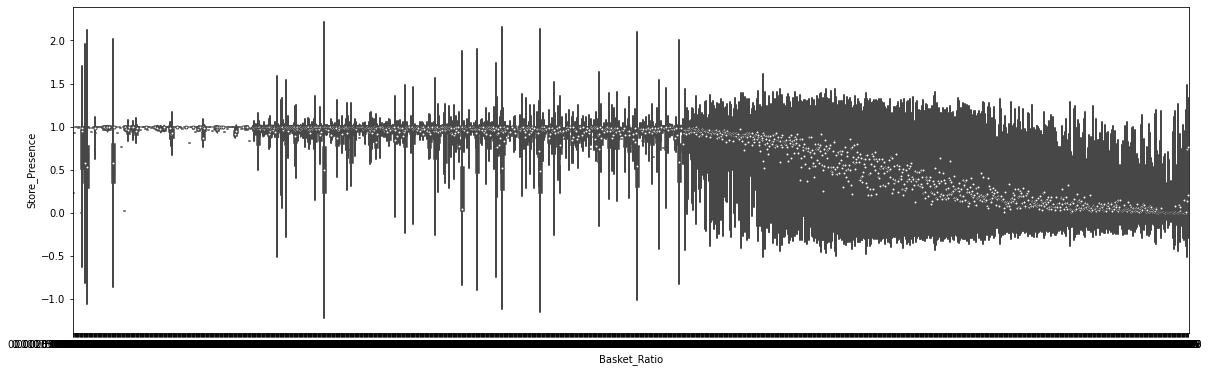

In [ ]:
# perform a violin plot between basket ratio and store presence



there is weak relation between basket ratio and store presence

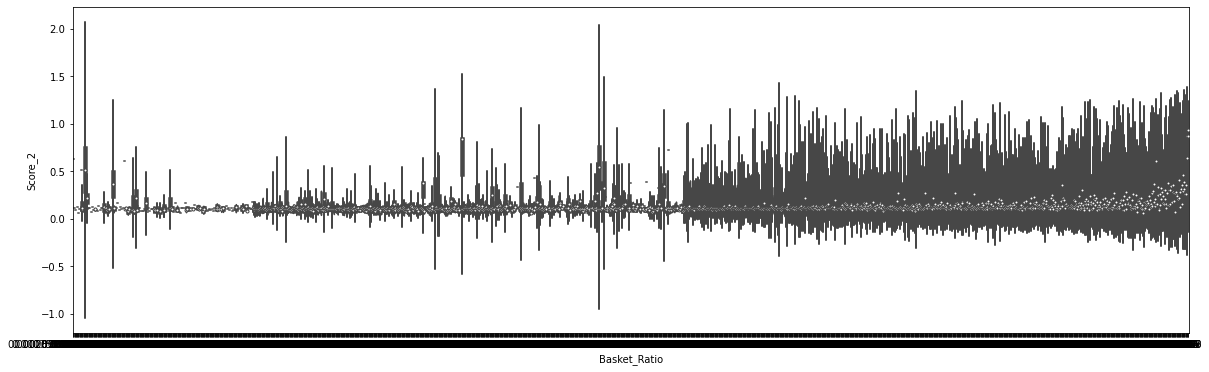

In [ ]:
# perform a violin plot between basket ratio and score2

there is very weak relation between score2 and basket ratio

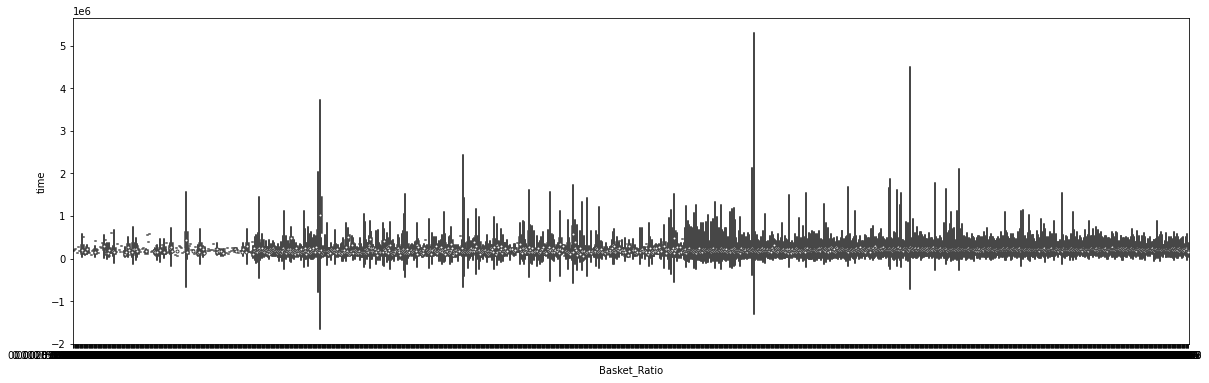

In [ ]:
# perform a violin plot between time and basket ratio



there is no relation between time and basket ratio

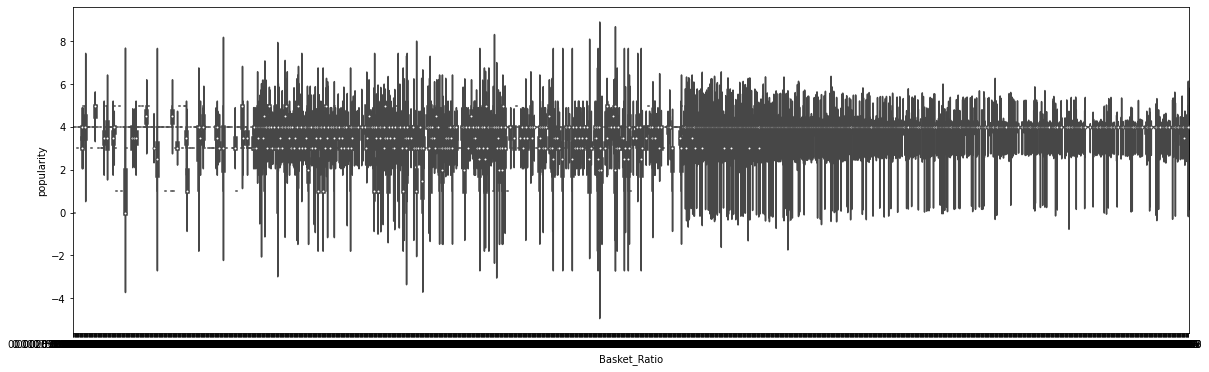

In [ ]:
# perform a violin plot between basket ratio and popularity



there is weak relation between basket ratio and popularity

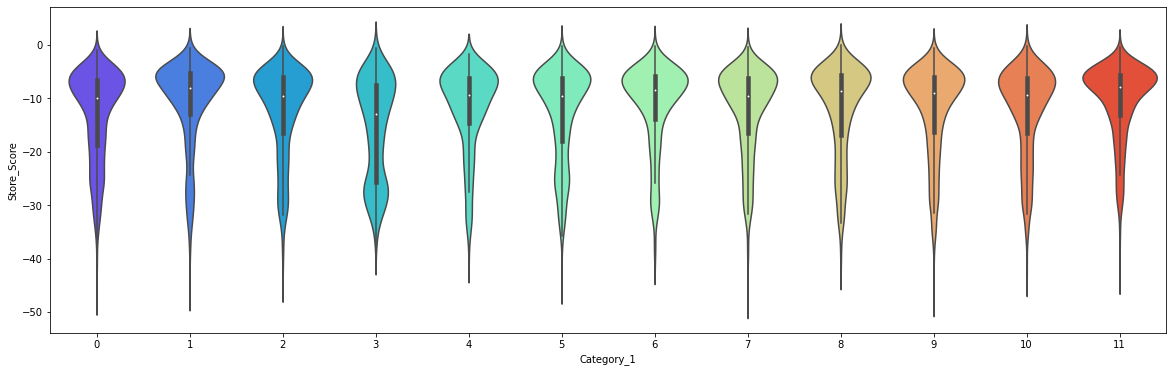

In [ ]:
# perform a violin plot between category1 and store score



there is no relation between store score and category1

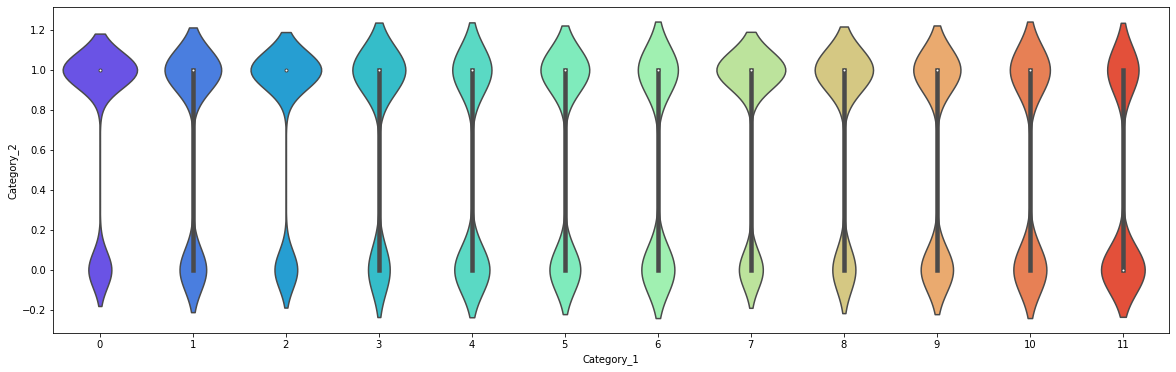

In [ ]:
p# perform a violin plot between category2 and category1



there is no relation between  category2 and category1

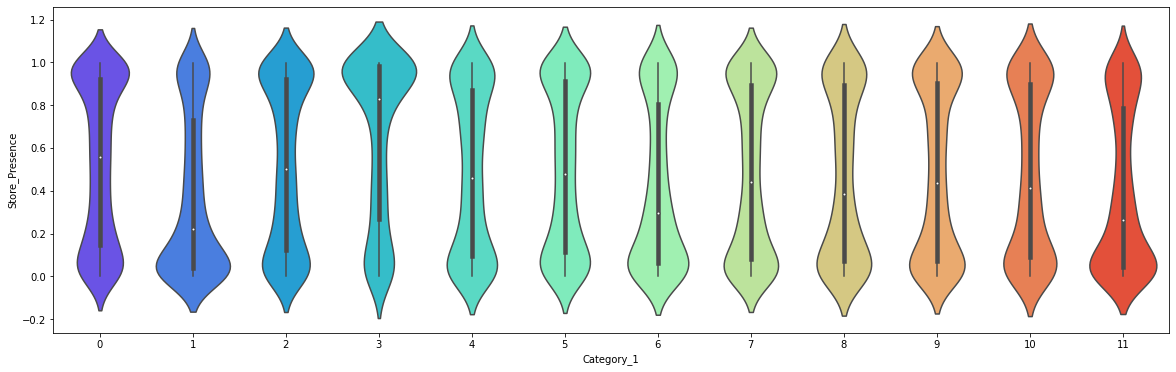

In [ ]:
# perform a violin plot between categort1 and store prsence



there is no relation between  store presence and category1

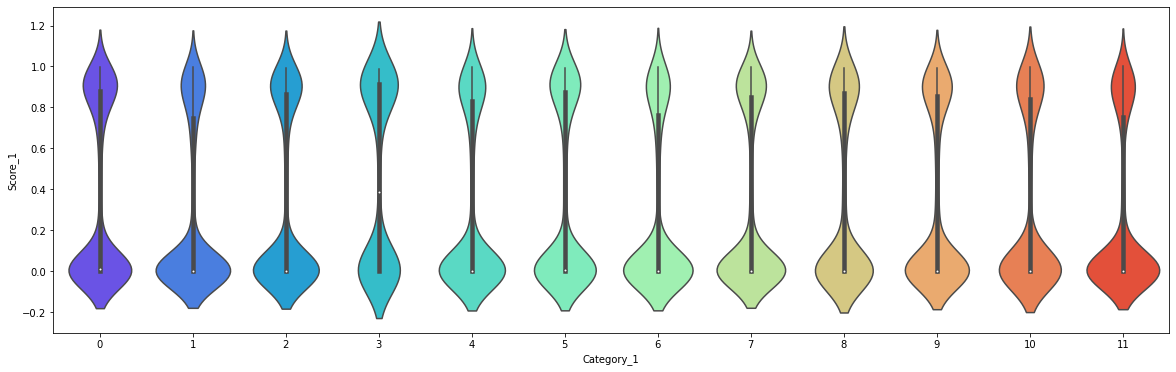

In [ ]:
# perform a violin plot between category1 and score1

there is no relation between  score1 and category1

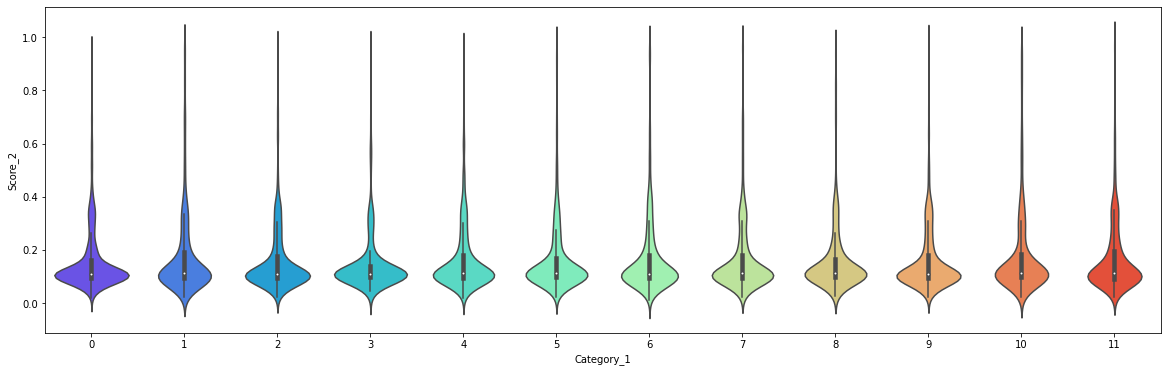

In [ ]:
# perform a violin plot between category2 and score2 

there is no relation between  score2 and category1

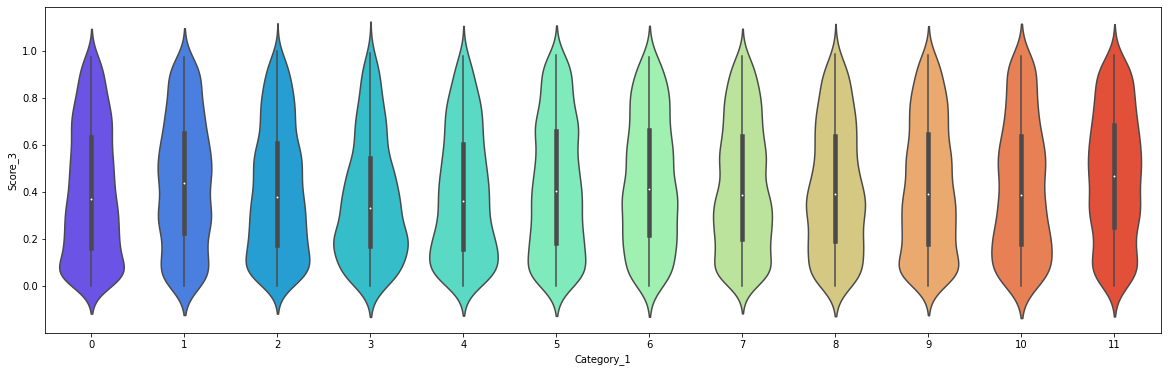

In [ ]:
# perform a violin plot between category1 and score3



there is no relation between  score3 and category1

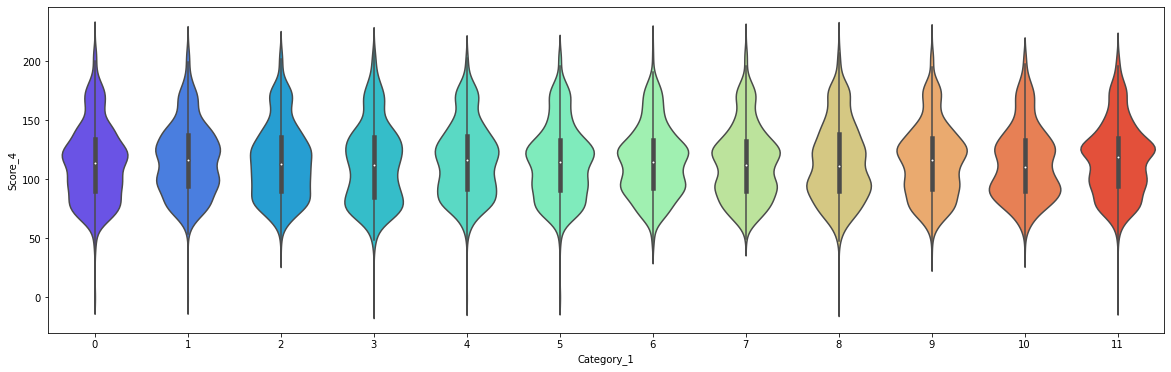

In [ ]:
# perform a violin plot between score4 and category1



there is no relation between  score4 and category1

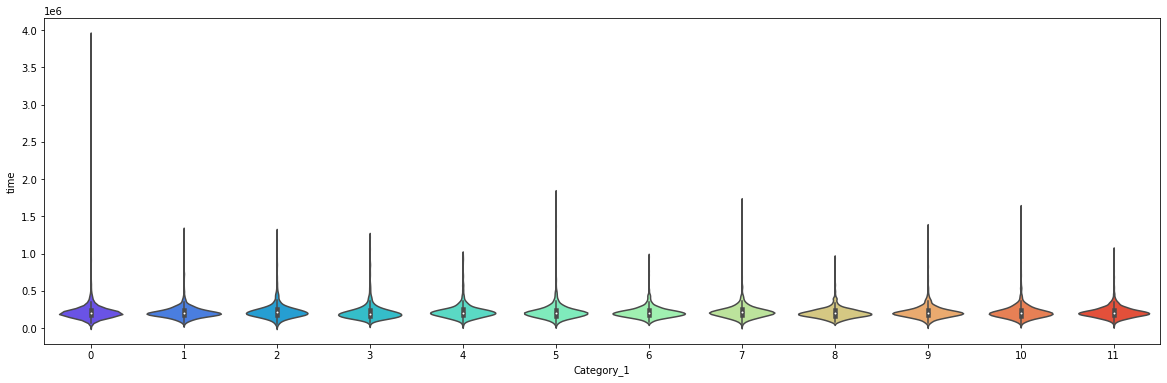

In [ ]:
# perform a violin plot between category1 and time



there is no relation between  time and category1

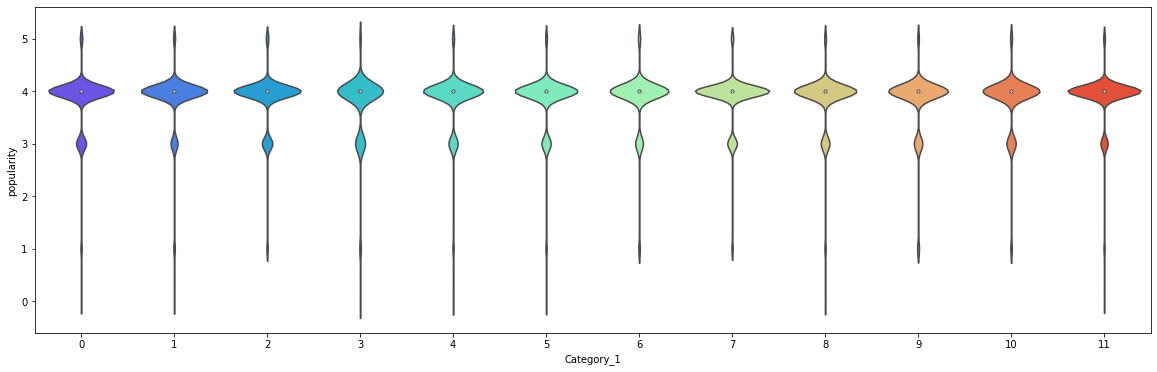

In [ ]:
# perform a violin plot between popularity and category1



there is no relation between  popularity and category1

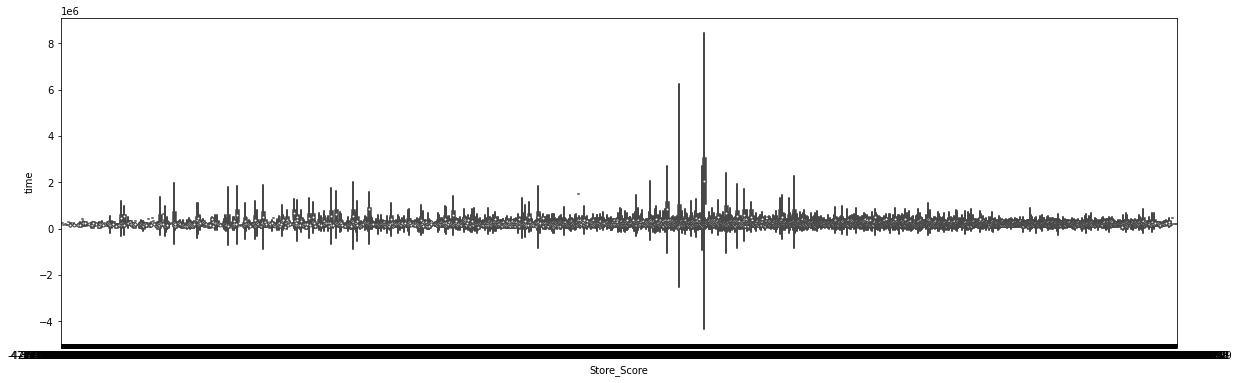

In [ ]:
# perform a violin plot between store score and time



there is no relation between time and store score

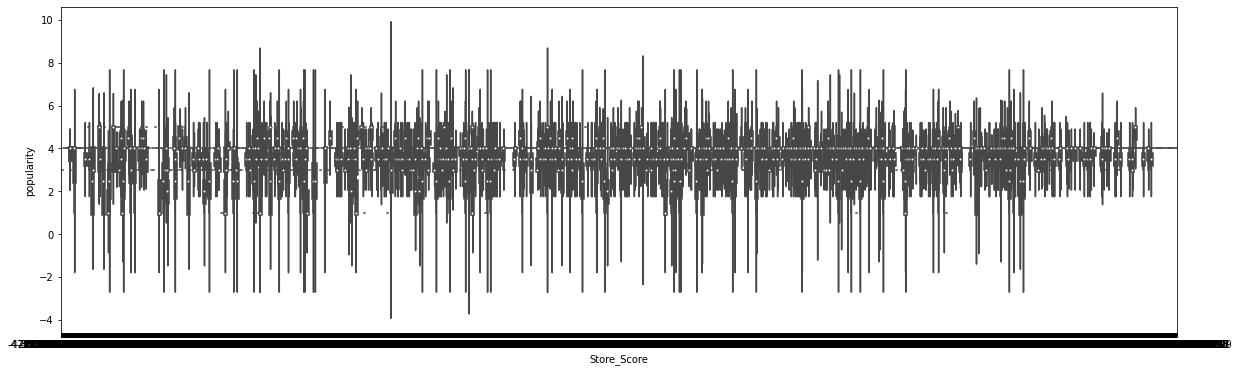

In [ ]:
# perform a violin plot between store score and popularity

there is weak relation between  store score and popularity

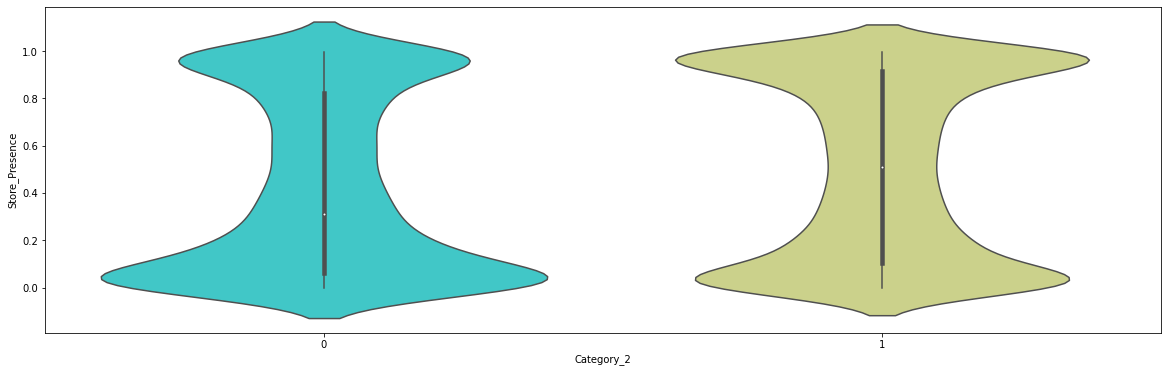

In [ ]:
# perform a violin plot between category2 and store presence 



there is no relation between  category2 and store presence

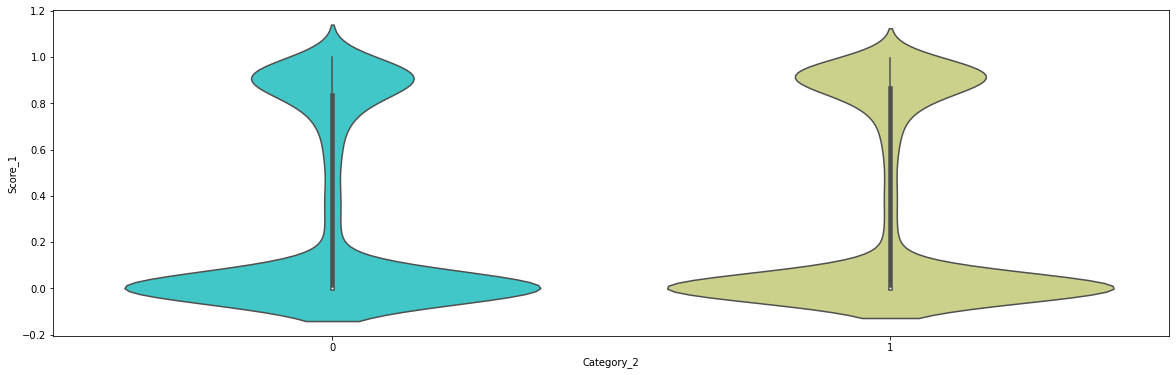

In [ ]:
# perform a violin plot between category2 and score1



there is no relation between  category2 and score1

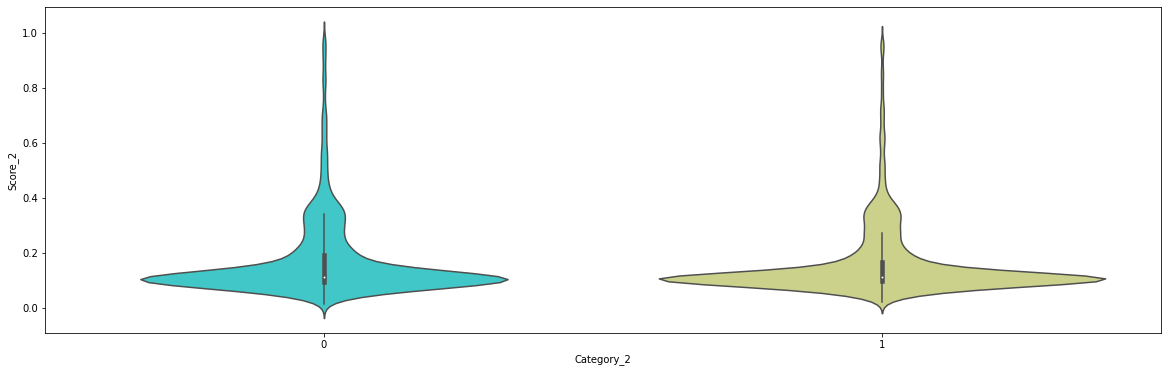

In [ ]:
# perform a violin plot between category2 and score2



there is no relation between  category2 and score2

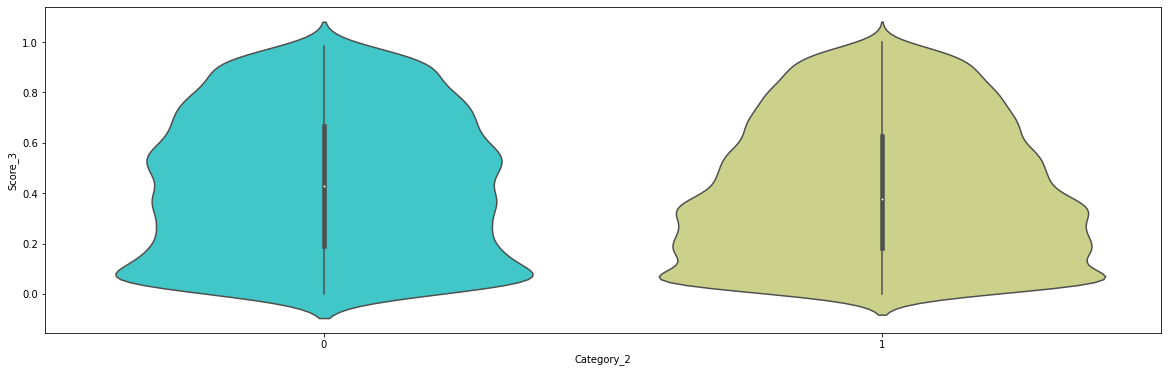

In [ ]:
# perform a violin plot between category2 and score3



there is no relation between  category2 and score3

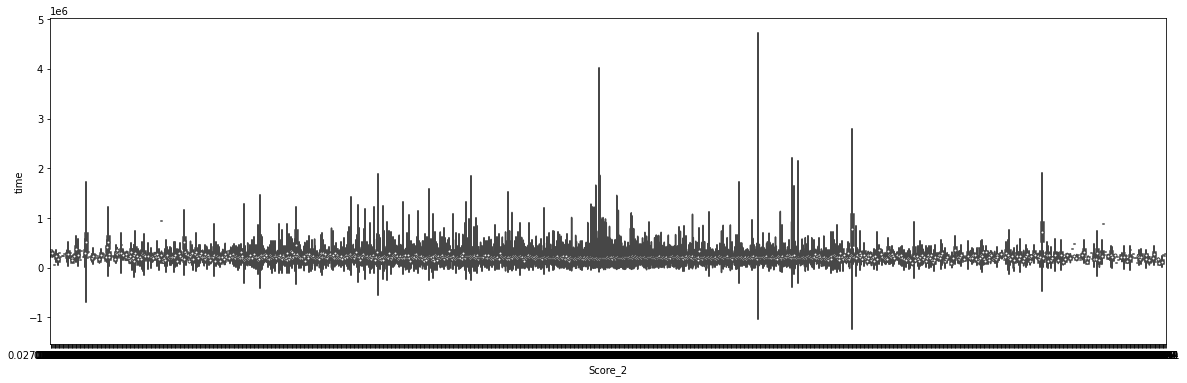

In [ ]:
# perform a violin plot between score2 and time

there is no relation between time and score

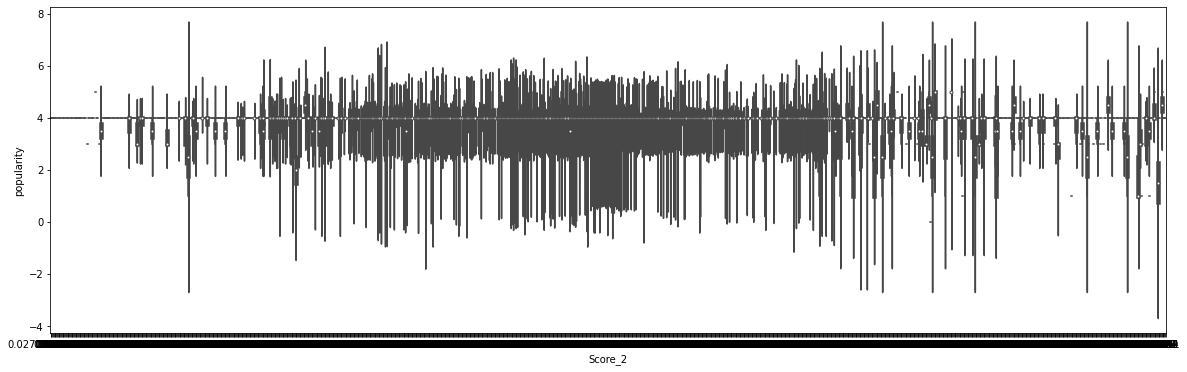

In [ ]:
# perform a violin plot between score2 and popularity



there is no relation between score and popularity

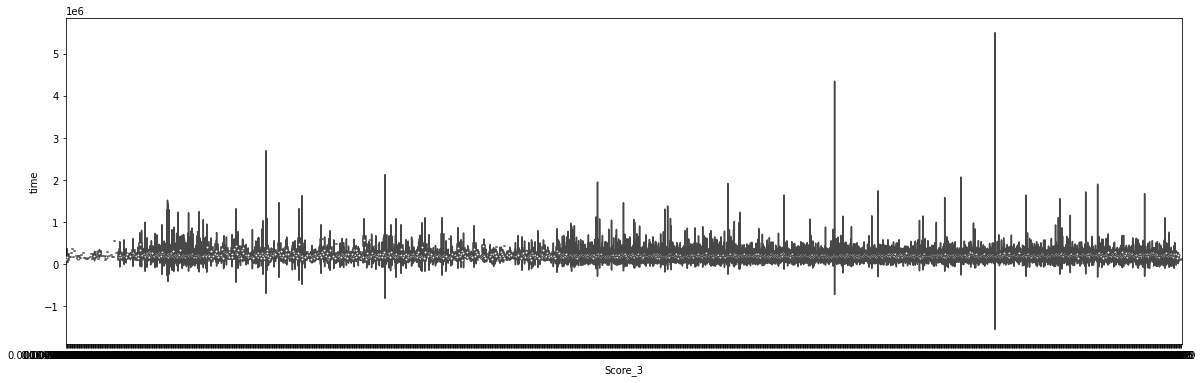

In [ ]:
# perform a violin plot between score3 and time



there is no relation between time and score 3

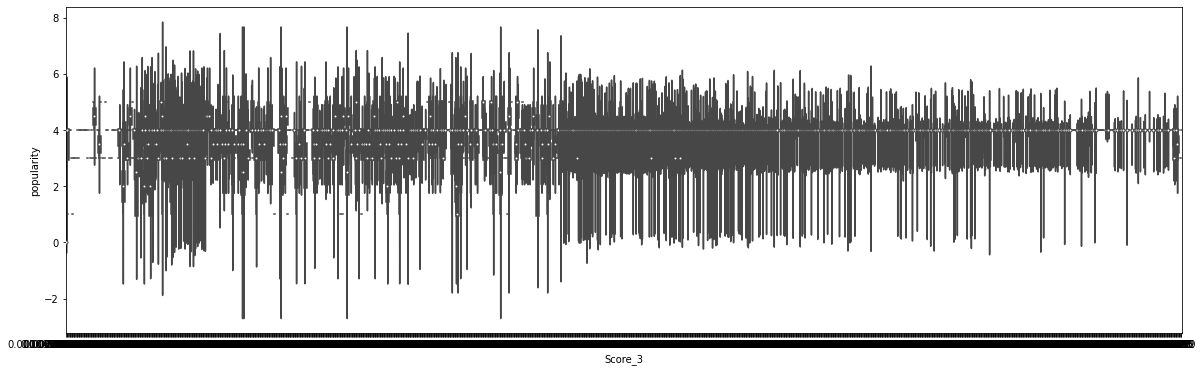

In [ ]:
# perform a violin plot between score3 and popularity



there is weak relation between popularity and score 3



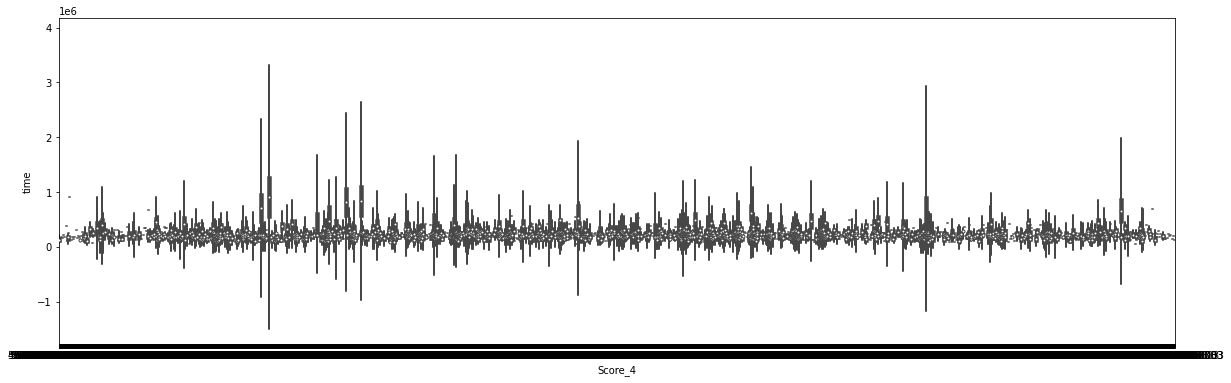

In [ ]:
# perform a violin plot between time and score4



there is no relation between time and score4

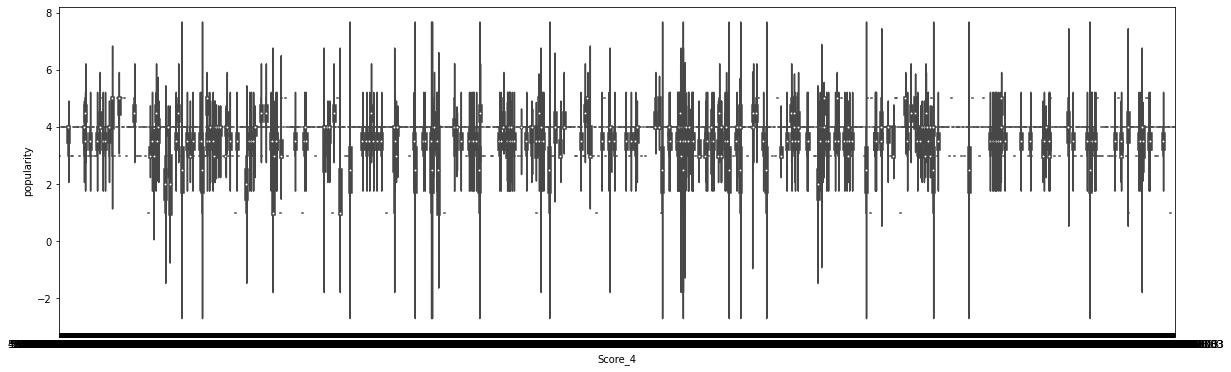

In [ ]:
# perform a violin plot between popularity and score4



there is no relation between popularity and score 4

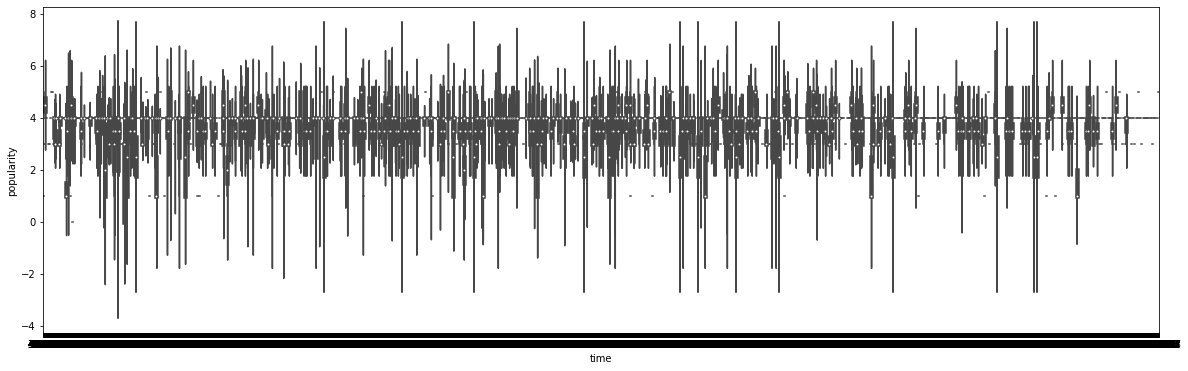

In [ ]:
# perform a violin plot between popularity and time



there is on relation between time and popularity

# Preprocessing

In [ ]:
#convert the time column into more columns like hour, month, day, year , minute


In [ ]:
# drop popularity from train_df and name that variable as y

#drop popularity n time from train dataset


# Scaling

##Why scaling is necessary?

1. Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Euclidean distance between two data points in their computations, this is a problem.
2. If left alone, these algorithms only take in the magnitude of features neglecting the units.
3. The results would vary greatly between different units, 5kg and 5000gms.
4. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.
5. To suppress this effect, we need to bring all features to the same level of magnitudes. This can be achieved by scaling.

#min max scaling


Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

In [ ]:
# Helper function for scaling all the numerical data using MinMaxScalar


In [ ]:
# Making a list of the column names to be scaled 

# passing data and column name for scaling

#Splitting the data into train and test set

In [ ]:
# Import train_test_split from sklearn
# split data into 95% train , 5% test and random state 42


In [ ]:
# check shape of X_train

(17297, 15)

In [ ]:
# check for nan value in X_train

False

# Modelling

In [ ]:
# importing necessary libraries for geting metrics of models



# Function for calculating all the relevant metrics 



In [ ]:
# Helper function for Visualizing importance of all the features in the dataset for the prediction



    # creating dataframe for feature name and feature importance


    # grouping all data and sorting in descending order
    
    
    # ploting feature importance data using boxenplot
    
    # return fig, ax



# Visualize importance of all the features in the dataset for the prediction



# LOGISTIC REGRESSION

1. Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique.

2. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        11
           3       0.00      0.00      0.00       115
           4       0.84      1.00      0.91       761
           5       0.00      0.00      0.00        22

    accuracy                           0.84       911
   macro avg       0.17      0.20      0.18       911
weighted avg       0.70      0.84      0.76       911

CPU times: user 1.64 s, sys: 1.28 s, total: 2.92 s
Wall time: 1.72 s


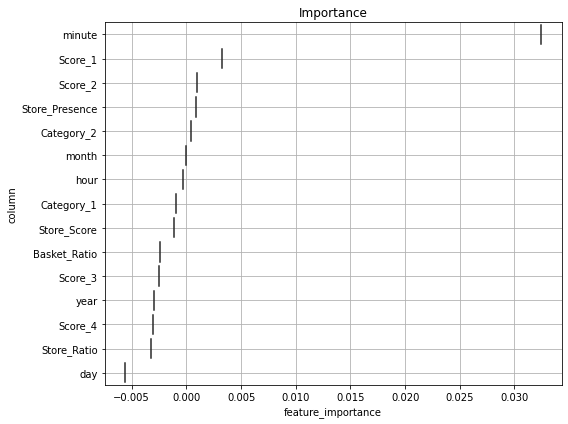

In [ ]:
%%time
# Fit a logistic Regression model to the train dataset

# Import logisticRegressor


# Instantiate the model


# fitting the model on train data

# print score of the model by calling function

# visualizing importance of features




#RANDOM FOREST CLASSIFIER

 random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting. It is an ensemble method which is better than a single decision tree because it reduces the over-fitting by averaging the result.

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.73      0.84        11
           3       0.84      0.33      0.47       115
           4       0.89      0.99      0.94       761
           5       1.00      0.41      0.58        22

    accuracy                           0.89       911
   macro avg       0.95      0.69      0.77       911
weighted avg       0.89      0.89      0.87       911

CPU times: user 8.04 s, sys: 3.13 ms, total: 8.04 s
Wall time: 8.17 s


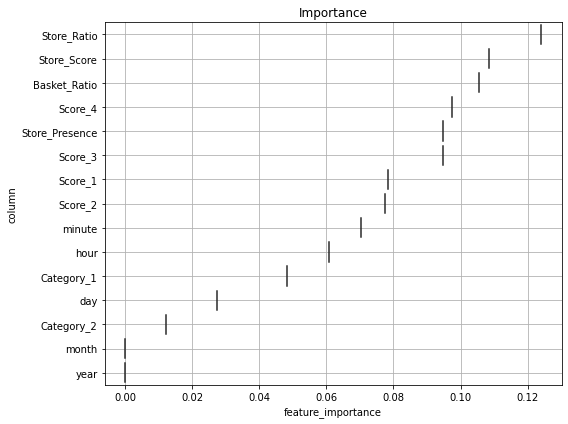

In [ ]:
%%time
# Fit a RandomForestClassifier model to the train dataset

#import RandomForestClassifier

# Instantiate the model

# fitting the model on train data

# print score of the model

# visualizing importance of features



# ADA BOOST CLASSIFIER

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.00      0.09      0.00        11
           3       0.00      0.00      0.00       115
           4       0.70      0.34      0.45       761
           5       0.00      0.00      0.00        22

    accuracy                           0.28       911
   macro avg       0.34      0.29      0.29       911
weighted avg       0.58      0.28      0.38       911

CPU times: user 1.5 s, sys: 1.82 ms, total: 1.5 s
Wall time: 1.51 s


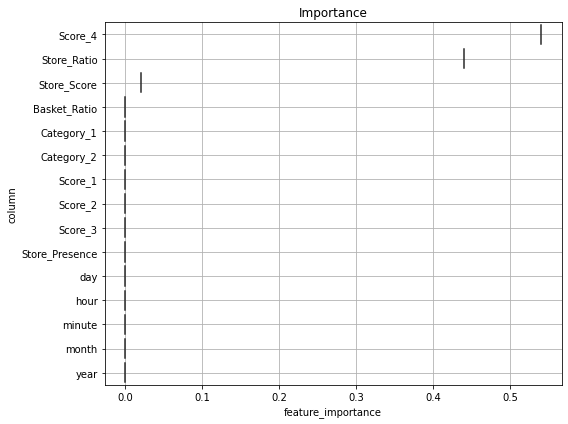

In [ ]:
%%time
# Fit a AdaBoost classifier model to the train dataset

# Import AdaBoostClassifier

# Instantiate the model

# fitting the model on train data

# print score of the model by calling function

# visualizing importance of features




#SUPORT VECTOR CLASSIFIER

1. A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each category, they’re able to categorize new text.



In [ ]:
%%time
# Fit a support vector classifier model to the train dataset

#import SVC

# Instantiate the model

#fit the model on train data

# print score of the model by calling function



Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        11
           3       0.00      0.00      0.00       115
           4       0.84      1.00      0.91       761
           5       0.00      0.00      0.00        22

    accuracy                           0.84       911
   macro avg       0.17      0.20      0.18       911
weighted avg       0.70      0.84      0.76       911

CPU times: user 4.2 s, sys: 139 ms, total: 4.34 s
Wall time: 4.33 s


# DESISION TREE CLASSICIFIER

Decision Tree Classifier is a simple and widely used classification technique. It applies a straitforward idea to solve the classification problem. Decision Tree Classifier poses a series of carefully crafted questions about the attributes of the test record. Each time time it receive an answer, a follow-up question is asked until a conclusion about the calss label of the record is reached.

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.31      0.73      0.43        11
           3       0.47      0.41      0.44       115
           4       0.92      0.90      0.91       761
           5       0.28      0.45      0.34        22

    accuracy                           0.83       911
   macro avg       0.60      0.70      0.63       911
weighted avg       0.84      0.83      0.83       911

CPU times: user 343 ms, sys: 10.6 ms, total: 354 ms
Wall time: 354 ms


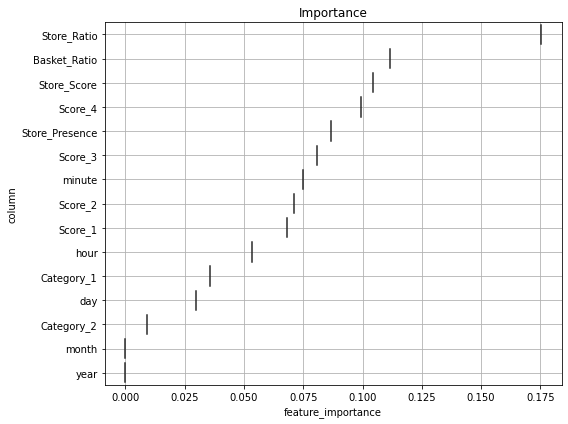

In [ ]:
%%time
# Fit a DecisionTreeClassifier model to the train dataset

#import DecisionTreeClassifier

# Instantiate the model

# fitting the model on train data

# print score of the model by calling function

# visualizing importance of features



# K NEIGHBOUR CLASSIFIER

In [ ]:
%%time
# Fit a K-Neighbour classifier model to the train dataset

# Import KNeighborsClassifier


# Instantiate the model

# fitting the model on train data

# print score of the model by calling function



Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.12      0.09      0.11        11
           3       0.50      0.24      0.33       115
           4       0.87      0.96      0.91       761
           5       0.50      0.14      0.21        22

    accuracy                           0.84       911
   macro avg       0.40      0.29      0.31       911
weighted avg       0.80      0.84      0.81       911

CPU times: user 93.2 ms, sys: 0 ns, total: 93.2 ms
Wall time: 95.9 ms


# GRADIENT BOOSTING CLASSIFIER

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.33      0.09      0.14        11
           3       0.46      0.11      0.18       115
           4       0.86      0.98      0.92       761
           5       0.80      0.18      0.30        22

    accuracy                           0.84       911
   macro avg       0.69      0.47      0.51       911
weighted avg       0.80      0.84      0.80       911

CPU times: user 23.4 s, sys: 621 µs, total: 23.4 s
Wall time: 23.4 s


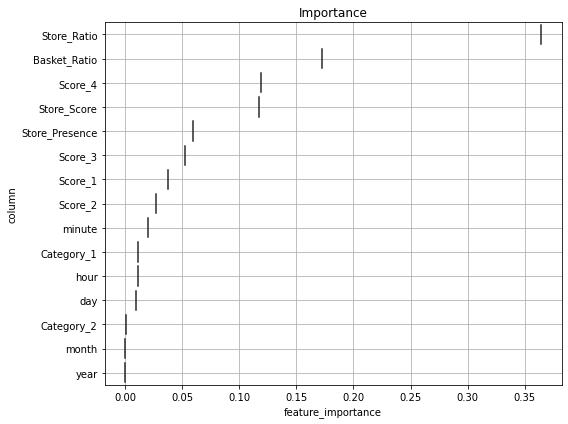

In [ ]:
%%time
# Fit a Gradient Boosting Classifier model to the train dataset

# Import GradientBoostingClassifier

# Instantiate the model

# fitting the model on train data

# print score of the model

# visualizing importance of features





# BAGGING CLASSIFIER

In [ ]:
%%time
# Fit a Bagging Classifier model to the train dataset

# Import BaggingClassifier

# Instantiate the model

# fitting the model on train data

# print score of the model




Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.82      0.82      0.82        11
           3       0.62      0.41      0.49       115
           4       0.90      0.96      0.93       761
           5       0.78      0.32      0.45        22

    accuracy                           0.88       911
   macro avg       0.82      0.70      0.74       911
weighted avg       0.86      0.88      0.86       911

CPU times: user 1.71 s, sys: 1.37 ms, total: 1.71 s
Wall time: 1.72 s


# VOTING CLASSIFIER

In [ ]:
%%time
# Fit a VotingClassifier model to the train dataset

# Import VotingClassifier

# list of classifier objects

# Instantiate the model

# fitting the model on train data

# print score of the model



Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.89      0.73      0.80        11
           3       0.84      0.32      0.47       115
           4       0.89      0.99      0.94       761
           5       1.00      0.23      0.37        22

    accuracy                           0.89       911
   macro avg       0.92      0.65      0.71       911
weighted avg       0.89      0.89      0.86       911

CPU times: user 12 s, sys: 68.4 ms, total: 12.1 s
Wall time: 12.1 s


# EASY ENSEMBLE CLASSIFIER

In [ ]:
%%time
# Fit a EasyEnsembleClassifier model to the train dataset

# Import EasyEnsembleClassifier

# Instantiate the model

# fitting the model on train data

# print score of the model



Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.03      0.45      0.05        11
           3       0.17      0.21      0.19       115
           4       0.94      0.57      0.71       761
           5       0.06      0.36      0.11        22

    accuracy                           0.51       911
   macro avg       0.44      0.52      0.41       911
weighted avg       0.81      0.51      0.62       911

CPU times: user 884 ms, sys: 24 ms, total: 908 ms
Wall time: 1 s


# XGB CLASSIFIER

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.00      0.00      0.00        11
           3       0.58      0.06      0.11       115
           4       0.84      0.99      0.91       761
           5       0.00      0.00      0.00        22

    accuracy                           0.84       911
   macro avg       0.49      0.41      0.40       911
weighted avg       0.78      0.84      0.78       911

CPU times: user 4.62 s, sys: 25.3 ms, total: 4.64 s
Wall time: 4.88 s


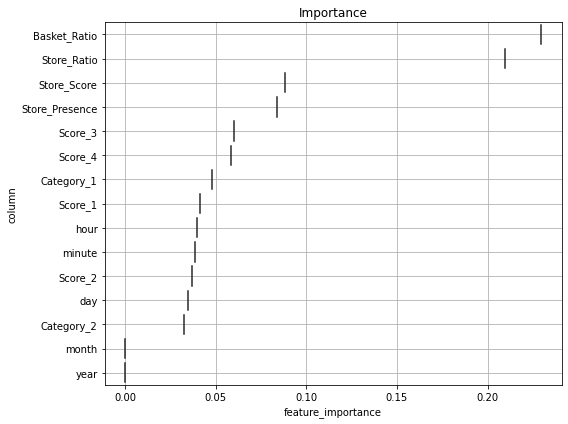

In [ ]:
%%time
# Fit a XGBClassifier model to the train dataset

# Import XGBClassifier

# Instantiate the model

# fitting the model on train data

# print score of the model

# visualizing importance of features



#Comparing all the model based on metric

In [ ]:
# helper function for comparing models matric

    # the libraries we need
    
    # create a dataframe with column matric and metric name as value
    
     # then predict on the test set
    

In [ ]:
# list of model objects

# list of model names

# print the comparison of models


# Hyperparameter tuning

A hyperparameter is a parameter whose value is set before the learning process begins.

Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model.

Every machine learning models will have different hyperparameters that can be set.



# grid search

One traditional and popular way to perform hyperparameter tuning is by using an Exhaustive Grid Search from Scikit learn.

This method tries every possible combination of each set of hyper-parameters.

Using this method, we can find the best set of values in the parameter search space.

This usually uses more computational power and takes a long time to run since this method needs to try every combination in the grid size.

In [ ]:
 # Helper function to perform hyper parameter tunning with GridSearchCV


    # Grid search of parameters, using 5 fold cross validation

    #fit model_cv
    
    # print best parameters

    # print best score

In [ ]:
%%time
# create logistic regressor parameters dict in list for tunning


# passing data for hyper parameter tunning with Gridsearchcv    


0.18232284750190483


In [ ]:
%%time
# create RandomForest parameters dict in list for tunning


# passing data for hyper parameter tunning with Gridsearchcv


In [ ]:
%%time
# create KNNRegressor parameters dict in list for tunning


# passing data for hyper parameter tunning with Gridsearchcv


In [ ]:
%%time
# create GradientBoostRegressor parameters dict in list for tunning


# passing data for hyper parameter tunning with Gridsearchcv


In [ ]:
%%time
# create DecisionTreeRegressor parameters dict in list for tunning



# passing data for hyper parameter tunning with Gridsearchcv


In [ ]:
%%time
# create AdaBoostRegressor parameters dict in list for tunning


# passing data for hyper parameter tunning with Gridsearchcv


In [ ]:
%%time
# create XGBoost parameters dict in list for tunning


# passing data for hyper parameter tunning with Gridsearchcv


# NOTE : you can use any one of RandomizedSearchCv or GridSearchCV, both works fine.

# RamdomizedSearchCV

In [ ]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV


  # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores

  # Fit the random search model
  

In [ ]:
%%time
# create logistic regressor parameters dict for tunning


# passing data for hyper parameter tunning with Randomized search cv


In [ ]:
%%time
# create RandomForest classifier parameters dict for tunning


# passing data for hyper parameter tunning with Randomized search cv


In [ ]:
%%time
# create KNN classifier parameters dict for tunning

# passing data for hyper parameter tunning with Randomized search cv


In [ ]:
%%time
# create GradientBoost classifier parameters dict for tunning


# passing data for hyper parameter tunning with Randomized search cv


In [ ]:
%%time
# create DecisionTree classifier parameters dict for tunning


# passing data for hyper parameter tunning with Randomized search cv


In [ ]:
%%time
# create AdaBoost classifier parameters dict for tunning


# passing data for hyper parameter tunning with Randomized search cv


In [ ]:
%%time
# create XGBoost parameters dict in list for tunning


# passing data for hyper parameter tunning with Gridsearchcv


### Now working with the test dataset provided

In [ ]:
# preparing test data as similarly as done for train data before.

In [ ]:
# check columns of test data


Index(['Store_Ratio', 'Basket_Ratio', 'Category_1', 'Store_Score',
       'Category_2', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3',
       'Score_4', 'hour', 'month', 'day', 'year', 'minute'],
      dtype='object')

In [ ]:
# passing test data for scaling


In [ ]:
# Perforn the prediction on the test dataset


array([4, 4, 4, ..., 4, 4, 4])

In [ ]:
# creating a dataframe of predicted results 


In [ ]:
# predicted values in dataframe

0
0  4
1  4
2  4
3  4
4  4

### CONCLUSION

We have performed EDA, preprocessing, build different models, visualized feature importance, did hyper parameter tunning of each model and did prediction. store ratio is most important data in the dataset. we used voting classifier for prediction

### Congratulation for completing the assignment.

You have learned a lot while doing this assignment.